In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import * # all helper functions


/home/raytracer/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

# Data Dictionary Analysis

Will analyse the data we have available that provides information on the features in the dataset


## Info levels

In [59]:
dias_attr_info = pd.read_excel('DIAS Information Levels - Attributes 2017.xlsx',header =1,index = 0)
dias_attr_info.drop(columns = ['Unnamed: 0'],inplace = True)
pd.set_option('display.max_rows', dias_attr_info.shape[0]+1)
dias_attr_info



Information level                                          Attribute  \
0                   NaN                                           AGER_TYP   
1                Person                               ALTERSKATEGORIE_GROB   
2                   NaN                                          ANREDE_KZ   
3                   NaN                                      CJT_GESAMTTYP   
4                   NaN                                  FINANZ_MINIMALIST   
5                   NaN                                      FINANZ_SPARER   
6                   NaN                                   FINANZ_VORSORGER   
7                   NaN                                     FINANZ_ANLEGER   
8                   NaN                              FINANZ_UNAUFFAELLIGER   
9                   NaN                                   FINANZ_HAUSBAUER   
10                  NaN                                          FINANZTYP   
11                  NaN                                        GEBURTSJAHR   
12                  NaN                                    GFK_URLAUBERTYP   
13                  NaN                                   GREEN_AVANTGARDE   
14                  NaN                                         HEALTH_TYP   
15                  NaN                                LP_LEBENSPHASE_FEIN   
16                  NaN                                LP_LEBENSPHASE_GROB   
17                  NaN                                    LP_FAMILIE_FEIN   
18                  NaN                                    LP_FAMILIE_GROB   
19                  NaN                                     LP_STATUS_FEIN   
20                  NaN                                     LP_STATUS_GROB   
21                  NaN                                   NATIONALITAET_KZ   
22                  NaN                              PRAEGENDE_JUGENDJAHRE   
23                  NaN                                     RETOURTYP_BK_S   
24                  NaN                                          SEMIO_SOZ   
25                  NaN                                          SEMIO_FAM   
26                  NaN                                          SEMIO_REL   
27                  NaN                                          SEMIO_MAT   
28                  NaN                                         SEMIO_VERT   
29                  NaN                                         SEMIO_LUST   
30                  NaN                                          SEMIO_ERL   
31                  NaN                                         SEMIO_KULT   
32                  NaN                                          SEMIO_RAT   
33                  NaN                                         SEMIO_KRIT   
34                  NaN                                          SEMIO_DOM   
35                  NaN                                         SEMIO_KAEM   
36                  NaN                                      SEMIO_PFLICHT   
37                  NaN                                        SEMIO_TRADV   
38                  NaN                                        SHOPPER_TYP   
39                  NaN                                          SOHO_FLAG   
40                  NaN                                           TITEL_KZ   
41                  NaN                                           VERS_TYP   
42                  NaN                                           ZABEOTYP   
43            Household                                           ALTER_HH   
44                  NaN                                       ANZ_PERSONEN   
45                  NaN                                          ANZ_TITEL   
46                  NaN                                  HAUSHALTSSTRUKTUR   
47                  NaN                                 HH_EINKOMMEN_SCORE   
48                  NaN                                   D19_KK_KUNDENTYP   
49                  NaN                                      D19_KONSUMTYP   
50                  NaN  D19

notice some attribute fields with seemingly 2 feature names in one row , need to split the rows into 2 rows 

In [60]:
pd.set_option('max_colwidth', 500)
dias_attr_info.iloc[51:55]


Information level  \
51               NaN   
52               NaN   
53               NaN   
54               NaN   

                                                                    Attribute  \
51                          D19_BANKEN_ ANZ_12             D19_BANKEN_ ANZ_24   
52                       D19_TELKO_ ANZ_12                  D19_TELKO_ ANZ_24   
53  D19_VERSI_ ANZ_12                                       D19_VERSI_ ANZ_24   
54                           D19_VERSAND_ ANZ_12          D19_VERSAND_ ANZ_24   

                                                     Description  \
51       transaction activity BANKS in the last 12 and 24 months   
52       transaction activity TELCO in the last 12 and 24 months   
53   transaction activity INSURANCE in the last 12 and 24 months   
54  transaction activity MAIL-ORDER in the last 12 and 24 months   

   Additional notes  
51              NaN  
52              NaN  
53              NaN  
54              NaN

In [61]:
two_feature_columns = list(map(lambda x: len(x.split()) > 3   ,dias_attr_info.Attribute.tolist()))

while not dias_attr_info.loc[two_feature_columns].empty :
    
    row = next(dias_attr_info.loc[two_feature_columns].iterrows())
    dias_attr_info = insert(dias_attr_info,row)
    two_feature_columns = list(map(lambda x: len(x.split()) > 3   ,dias_attr_info.Attribute.tolist()))
else:
    two_feature_columns = list(map(lambda x: len(x.split()) > 1   ,dias_attr_info.Attribute.tolist()))
    row = next(dias_attr_info.loc[two_feature_columns].iterrows())
    dias_attr_info = insert(dias_attr_info,row)
    
    
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [62]:
len(dias_attr_info)

318


* Udacity_AZDIAS_052018.csv: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
* Udacity_CUSTOMERS_052018.csv: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
* Udacity_MAILOUT_052018_TRAIN.csv: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
* Udacity_MAILOUT_052018_TEST.csv: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).



We have Information for only 318 features

In [63]:
dias_attr_info['Information level'].value_counts()

Community             1
Microcell (RR4_ID)    1
Household             1
Building              1
125m x 125m Grid      1
PLZ8                  1
RR1_ID                1
Postcode              1
Microcell (RR3_ID)    1
Person                1
Name: Information level, dtype: int64

In [64]:
dias_attr_info['Information level'] = dias_attr_info['Information level'].fillna(method ='ffill').fillna(method = 'bfill')
# small correction
dias_attr_info['Information level'].iloc[93:102] ='Microcell (RR3_ID)'

In [65]:
pd.set_option('display.max_rows', dias_attr_info.shape[0]+1)
display(dias_attr_info)

Information level                    Attribute  \
0                Person                     AGER_TYP   
1                Person         ALTERSKATEGORIE_GROB   
2                Person                    ANREDE_KZ   
3                Person                CJT_GESAMTTYP   
4                Person            FINANZ_MINIMALIST   
5                Person                FINANZ_SPARER   
6                Person             FINANZ_VORSORGER   
7                Person               FINANZ_ANLEGER   
8                Person        FINANZ_UNAUFFAELLIGER   
9                Person             FINANZ_HAUSBAUER   
10               Person                    FINANZTYP   
11               Person                  GEBURTSJAHR   
12               Person              GFK_URLAUBERTYP   
13               Person             GREEN_AVANTGARDE   
14               Person                   HEALTH_TYP   
15               Person          LP_LEBENSPHASE_FEIN   
16               Person          LP_LEBENSPHASE_GROB   
17               Person              LP_FAMILIE_FEIN   
18               Person              LP_FAMILIE_GROB   
19               Person               LP_STATUS_FEIN   
20               Person               LP_STATUS_GROB   
21               Person             NATIONALITAET_KZ   
22               Person        PRAEGENDE_JUGENDJAHRE   
23               Person               RETOURTYP_BK_S   
24               Person                    SEMIO_SOZ   
25               Person                    SEMIO_FAM   
26               Person                    SEMIO_REL   
27               Person                    SEMIO_MAT   
28               Person                   SEMIO_VERT   
29               Person                   SEMIO_LUST   
30               Person                    SEMIO_ERL   
31               Person                   SEMIO_KULT   
32               Person                    SEMIO_RAT   
33               Person                   SEMIO_KRIT   
34               Person                    SEMIO_DOM   
35               Person                   SEMIO_KAEM   
36               Person                SEMIO_PFLICHT   
37               Person                  SEMIO_TRADV   
38               Person                  SHOPPER_TYP   
39               Person                    SOHO_FLAG   
40               Person                     TITEL_KZ   
41               Person                     VERS_TYP   
42               Person                     ZABEOTYP   
43            Household                     ALTER_HH   
44            Household                 ANZ_PERSONEN   
45            Household                    ANZ_TITEL   
46            Household            HAUSHALTSSTRUKTUR   
47            Household           HH_EINKOMMEN_SCORE   
48            Household             D19_KK_KUNDENTYP   
49            Household                D19_KONSUMTYP   
50            Household            D19_GESAMT_ANZ_12   
51            Household            D19_GESAMT_ANZ_24   
52            Household            D19_BANKEN_ANZ_12   
53            Household            D19_BANKEN_ANZ_24   
54            Household             D19_TELKO_ANZ_12   
55            Household             D19_TELKO_ANZ_24   
56            Household             D19_VERSI_ANZ_12   
57            Household             D19_VERSI_ANZ_24   
58            Household           D19_VERSAND_ANZ_12   
59            Household           D19_VERSAND_ANZ_24   
60            Household     D19_GESAMT_OFFLINE_DATUM   
61            Household      D19_GESAMT_ONLINE_DATUM   
62            Household             D19_GESAMT_DATUM   
63            Household     D19_BANKEN_OFFLINE_DATUM   
64            Household      D19_BANKEN_ONLINE_DATUM   
65            Household             D19_BANKEN_DATUM   
66            Household      D19_TELKO_OFFLINE_DATUM   
67            Household       D19_TELKO_ONLINE_DATUM   
68            Household              D19_TELKO_DATUM   
69            Household    D19_VERSAND_OFFLINE_DATUM   
70            Household     D1

Lets save our attributes by info level as this may come in handy later on

In [10]:
attr_by_info_lvl = dict()
for key,value in dias_attr_info.groupby(['Information level']):
    attr_by_info_lvl.update({key:list(value.Attribute.values)})

## Attribute Mapping

In [11]:
dias_attr_vals = pd.read_excel('DIAS Attributes - Values 2017.xlsx',header = 1)
dias_attr_vals.drop(columns = 'Unnamed: 0',inplace =True)
pd.set_option('display.max_rows', dias_attr_vals.shape[0]+1)
dias_attr_vals

Attribute  \
0                        AGER_TYP   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   
5            ALTERSKATEGORIE_GROB   
6                             NaN   
7                             NaN   
8                             NaN   
9                             NaN   
10                            NaN   
11                       ALTER_HH   
12                            NaN   
13                            NaN   
14                            NaN   
15                            NaN   
16                            NaN   
17                            NaN   
18                            NaN   
19                            NaN   
20                            NaN   
21                            NaN   
22                            NaN   
23                            NaN   
24                            NaN   
25                            NaN   
26                            NaN   
27                            NaN   
28                            NaN   
29                            NaN   
30                            NaN   
31                            NaN   
32                            NaN   
33                      ANREDE_KZ   
34                            NaN   
35                            NaN   
36            ANZ_HAUSHALTE_AKTIV   
37                   ANZ_HH_TITEL   
38                   ANZ_PERSONEN   
39                      ANZ_TITEL   
40                       BALLRAUM   
41                            NaN   
42                            NaN   
43                            NaN   
44                            NaN   
45                            NaN   
46                            NaN   
47                            NaN   
48                       BIP_FLAG   
49                            NaN   
50                            NaN   
51                CAMEO_DEUG_2015   
52                            NaN   
53                            NaN   
54                            NaN   
55                            NaN   
56                            NaN   
57                            NaN   
58                            NaN   
59                            NaN   
60                            NaN   
61                 CAMEO_DEU_2015   
62                            NaN   
63                            NaN   
64                            NaN   
65                            NaN   
66                            NaN   
67                            NaN   
68                            NaN   
69                            NaN   
70                            NaN   
71                            NaN   
72                            NaN   
73                            NaN   
74                            NaN   
75                            NaN   
76                            NaN   
77                            NaN   
78                            NaN   
79                            NaN   
80                            NaN   
81                            NaN   
82                            NaN   
83                            NaN   
84                            NaN   
85                            NaN   
86                            NaN   
87                            NaN   
88                            NaN   
89                            NaN   
90                            NaN   
91                            NaN   
92                            NaN   
93                            NaN   
94                            NaN   
95                            NaN   
96                            NaN   
97                            NaN   
98                            NaN   
99                            NaN   
100                           NaN   
101                           NaN   
102                           NaN   
103                           NaN   
104                           NaN   
105            CAMEO_DEUINTL_2015   
106                           NaN   
107                         

Need to create a function to be able to look up attributes their mappings and other general information 

In [12]:
dias_attr_mapping = clean_dias_attr(dias_attr_vals)
cleaned_mapping_df = (pd.DataFrame(dias_attr_mapping).T).reset_index().rename(columns={'index':'Attribute'})
cleaned_mapping_df.to_csv('cleaned_mapping_df.csv',index=False)
   

In [13]:
cleaned_mapping_df = pd.read_csv('cleaned_mapping_df.csv')
cleaned_mapping_df

Attribute  \
0                       AGER_TYP   
1           ALTERSKATEGORIE_GROB   
2                       ALTER_HH   
3                      ANREDE_KZ   
4            ANZ_HAUSHALTE_AKTIV   
5                   ANZ_HH_TITEL   
6                   ANZ_PERSONEN   
7                      ANZ_TITEL   
8                       BALLRAUM   
9                       BIP_FLAG   
10               CAMEO_DEUG_2015   
11            CAMEO_DEUINTL_2015   
12                CAMEO_DEU_2015   
13                 CJT_GESAMTTYP   
14             D19_BANKEN_ANZ_12   
15             D19_BANKEN_ANZ_24   
16              D19_BANKEN_DATUM   
17          D19_BANKEN_DIREKT_RZ   
18           D19_BANKEN_GROSS_RZ   
19           D19_BANKEN_LOKAL_RZ   
20      D19_BANKEN_OFFLINE_DATUM   
21       D19_BANKEN_ONLINE_DATUM   
22    D19_BANKEN_ONLINE_QUOTE_12   
23            D19_BANKEN_REST_RZ   
24         D19_BEKLEIDUNG_GEH_RZ   
25        D19_BEKLEIDUNG_REST_RZ   
26                D19_BILDUNG_RZ   
27               D19_BIO_OEKO_RZ   
28                   D19_BUCH_RZ   
29             D19_DIGIT_SERV_RZ   
30        D19_DROGERIEARTIKEL_RZ   
31                D19_ENERGIE_RZ   
32               D19_FREIZEIT_RZ   
33                 D19_GARTEN_RZ   
34             D19_GESAMT_ANZ_12   
35             D19_GESAMT_ANZ_24   
36              D19_GESAMT_DATUM   
37      D19_GESAMT_OFFLINE_DATUM   
38       D19_GESAMT_ONLINE_DATUM   
39    D19_GESAMT_ONLINE_QUOTE_12   
40               D19_HANDWERK_RZ   
41              D19_HAUS_DEKO_RZ   
42          D19_KINDERARTIKEL_RZ   
43              D19_KK_KUNDENTYP   
44                 D19_KONSUMTYP   
45               D19_KOSMETIK_RZ   
46           D19_LEBENSMITTEL_RZ   
47                  D19_LOTTO_RZ   
48     D19_NAHRUNGSERGAENZUNG_RZ   
49               D19_RATGEBER_RZ   
50                 D19_REISEN_RZ   
51          D19_SAMMELARTIKEL_RZ   
52                 D19_SCHUHE_RZ   
53               D19_SONSTIGE_RZ   
54                D19_TECHNIK_RZ   
55              D19_TELKO_ANZ_12   
56              D19_TELKO_ANZ_24   
57               D19_TELKO_DATUM   
58           D19_TELKO_MOBILE_RZ   
59       D19_TELKO_OFFLINE_DATUM   
60        D19_TELKO_ONLINE_DATUM   
61             D19_TELKO_REST_RZ   
62            D19_TIERARTIKEL_RZ   
63            D19_VERSAND_ANZ_12   
64            D19_VERSAND_ANZ_24   
65             D19_VERSAND_DATUM   
66     D19_VERSAND_OFFLINE_DATUM   
67      D19_VERSAND_ONLINE_DATUM   
68   D19_VERSAND_ONLINE_QUOTE_12   
69           D19_VERSAND_REST_RZ   
70         D19_VERSICHERUNGEN_RZ   
71              D19_VERSI_ANZ_12   
72              D19_VERSI_ANZ_24   
73          D19_VOLLSORTIMENT_RZ   
74          D19_WEIN_FEINKOST_RZ   
75                      EWDICHTE   
76                     FINANZTYP   
77                FINANZ_ANLEGER   
78              FINANZ_HAUSBAUER   
79             FINANZ_MINIMALIST   
80                 FINANZ_SPARER   
81         FINANZ_UNAUFFAELLIGER   
82              FINANZ_VORSORGER   
83                   GEBAEUDETYP   
84            GEBAEUDETYP_RASTER   
85                   GEBURTSJAHR   
86                 GEOSCORE_KLS7   
87               GFK_URLAUBERTYP   
88              GREEN_AVANTGARDE   
89             HAUSHALTSSTRUKTUR   
90                    HEALTH_TYP   
91            HH_EINKOMMEN_SCORE   
92                    INNENSTADT   
93                  KBA05_ALTER1   
94                  KBA05_ALTER2   
95                  KBA05_ALTER3   
96                  KBA05_ALTER4   
97                  KBA05_ANHANG   
98                   KBA05_ANTG1   
99                   KBA05_ANTG2   
100                  KBA05_ANTG3   
101                  KBA05_ANTG4   
102               KBA05_AUTOQUOT   
103                 KBA05_BAUMAX   
104                   KBA05_CCM1   
105                   KBA05_CCM2   
106                   KBA05_CCM3   
107                   KBA05_CCM4   
108                 KBA05_DIESEL   
109                   KBA05_FRAU   
110                    KBA0

In [14]:
# columns in the info level file not in the mapping file
missing_from_mapping = set(dias_attr_info.Attribute.tolist())   - set(dias_attr_mapping.keys())
dias_attr_info.loc[dias_attr_info.Attribute.isin(missing_from_mapping)]

Information level                Attribute  \
72          Household  D19_VERSI_OFFLINE_DATUM   
73          Household   D19_VERSI_ONLINE_DATUM   
74          Household          D19_VERSI_DATUM   
193         Postcode                       PLZ   
305              PLZ8                     PLZ8   
313         Community                   ARBEIT   
314         Community                EINWOHNER   
315         Community                      GKZ   

                                                                                      Description  \
72                            actuality of the last transaction for the segment insurance OFFLINE   
73                             actuality of the last transaction for the segment insurance ONLINE   
74                              actuality of the last transaction for the segment insurance TOTAL   
193                                                                                      postcode   
305  sub-postcode (about 8 PLZ8 make up one PLZ) and \nnew macrocell level (about 500 households)   
313                                                   share of unemployed person in the community   
314                                                                                   inhabitants   
315                                                                   standardized community-code   

    Additional notes  
72               NaN  
73               NaN  
74               NaN  
193              NaN  
305              NaN  
313              NaN  
314              NaN  
315              NaN

Need to add these columns to the mapping file , we dont have mappings for these features but we know that the D19 columns follow the same kind of mapping so will look for mappings from other D19_xxx_DATUM columns and copy it over the rest will see if we can infer anything about them  

In [75]:
# functions to add and update features
def add_feature(feature_name,description = '',mapping = dict(),var_type = '',info_level = ''):
    '''
    function to add features to mapping dictionary
    '''
    try:
        record = dias_attr_mapping[feature_name]
        print('Feature EXISTS please update to avoid OVERWRITE')
    except KeyError:
        dias_attr_mapping[feature_name] = {'description':description,'mapping':mapping,'var_type':var_type}
        if info_level:
            attr_by_info_lvl[info_level] += [feature_name]
    
    
def update_feature(feature_name,description = None,mapping = None,var_type = None):
    '''
    function to update features to mapping dictionary
    '''
    try:
        record = dias_attr_mapping[feature_name]
        if description:
            dias_attr_mapping[feature_name]['description'] = description
        if mapping:
            dias_attr_mapping[feature_name]['mapping'] = mapping
        if var_type:
            dias_attr_mapping[feature_name]['var_type'] = var_type
            
    except KeyError:
        print('Feature does not EXIST, please ADD feature')
        
        
        
# functions to look up attributes with some general info
def print_col_summary(df,attr,plot_dist):
    print('Column Summary')
    
    value_counts = getattr(df,attr).value_counts(dropna=False,normalize=True) * 100
    try:
        if plot_dist:
            print('Value distribution plot')
            fig,ax = plt.subplots()
            value_counts.sort_index().plot(kind='bar',ax=ax)
            display(fig)
            plt.close()
        else:
            print('Value Counts Percentage')
            print(value_counts.sort_index())
    except:
        if plot_dist:
            print('Value distribution plot')
            fig,ax = plt.subplots()
            value_counts.plot(kind='bar',ax=ax)
            display(fig)
            plt.close()
        else:
            print('Value Counts Percentage')
            print(value_counts)
    
    print()
    print('Unique Values:')
    print(len(value_counts))
    

def print_attr(df,attr,plot_dist):
    try:
        print('*'*100)
        print("\033[1m" + attr + "\033[0m")
        print()
        print('Description:\n',dias_attr_mapping[attr].get('description', 'No description Available' ))
        print('Mapping:\n',dias_attr_mapping[attr].get('mapping', 'No Mapping Available' ))
        print('Additional Notes:\n' , dias_attr_info.loc[dias_attr_info.Attribute == attr ,'Additional notes'].values)
        print('Info level:\n',dias_attr_info.loc[dias_attr_info.Attribute == attr ,'Information level'].values)
        print()
        print_col_summary(df,attr,plot_dist)
       
    except KeyError:
        print('Feature info does not EXIST in data dictionary')
        if attr in df.columns:
            print_col_summary(df,attr,plot_dist)
        else:
            print('ERROR: Check Column name/column does not exist')
        print()
    except AttributeError:
        print('Feature does not EXIST in dataframe')
        print()
        

def lookUpAttr(df,attributes = None,plot_dist = False,show_all=False):
    '''Displays information about attributes
        
        params:
        attributes: list like , attributes to display
        show_all: bool , overides attributes and shows all attributes
        
        notes : plot dist is over ridden to false when running show all as it may create havoc
    '''
    
    if show_all:
        for attr in df.columns:
            print_attr(df,attr,plot_dist=False)
    else:
        for attr in attributes:
            print_attr(df,attr,plot_dist)

In [16]:
# lets look for D19_xxx_DATUM columns they all have the same mapping so its safe to just copy over the mapping
d19_datum_cols = list(filter(lambda x: ('D19' in x and 'DATUM' in x),dias_attr_mapping.keys()))
cleaned_mapping_df[cleaned_mapping_df.Attribute.isin(d19_datum_cols)]

Attribute  \
16           D19_BANKEN_DATUM   
20   D19_BANKEN_OFFLINE_DATUM   
21    D19_BANKEN_ONLINE_DATUM   
36           D19_GESAMT_DATUM   
37   D19_GESAMT_OFFLINE_DATUM   
38    D19_GESAMT_ONLINE_DATUM   
57            D19_TELKO_DATUM   
59    D19_TELKO_OFFLINE_DATUM   
60     D19_TELKO_ONLINE_DATUM   
65          D19_VERSAND_DATUM   
66  D19_VERSAND_OFFLINE_DATUM   
67   D19_VERSAND_ONLINE_DATUM   

                                                                    description  \
16                actuality of the last transaction for the segment banks TOTAL   
20              actuality of the last transaction for the segment banks OFFLINE   
21               actuality of the last transaction for the segment banks ONLINE   
36               actuality of the last transaction with the complete file TOTAL   
37             actuality of the last transaction with the complete file OFFLINE   
38              actuality of the last transaction with the complete file ONLINE   
57    actuality of the last transaction for the segment telecommunication TOTAL   
59  actuality of the last transaction for the segment telecommunication OFFLINE   
60   actuality of the last transaction for the segment telecommunication ONLINE   
65           actuality of the last transaction for the segment mail-order TOTAL   
66         actuality of the last transaction for the segment mail-order OFFLINE   
67          actuality of the last transaction for the segment mail-order ONLINE   

                                                                                                                                                                                                                                                                                                                                                                                                                                           mapping  \
16         {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder than 1,5 years', 8: 'activity elder than 2 years', 9: 'activity elder than 3 years', 10: 'no transactions known'}   
20  {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 12 months', 7: 'activity elder than 18 months', 8: 'activity elder than 24 months', 9: 'activity elder than 36 months', 10: 'no transactions known'}   
21  {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 12 months', 7: 'activity elder than 18 months', 8: 'activity elder than 24 months', 9: 'activity elder than 36 months', 10: 'no transactions known'}   
36         {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder than 1,5 years', 8: 'activity elder than 2 years', 9: 'activity elder than 3 years', 10: 'no transactions known'}   
37         {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder

In [17]:
# take just the first column and copy the mapping 
d19_mappings = dias_attr_mapping[d19_datum_cols[0]]['mapping']
# cycle through the d19 columns in missing_from_mapping and add them as features
def get_description(feature):
    return dias_attr_info.loc[dias_attr_info.Attribute == feature,'Description'].values[0]

for d19_feature in list(filter(lambda x: ('D19' in x),missing_from_mapping)):
    add_feature(d19_feature,description = get_description(d19_feature) , mapping = d19_mappings ,var_type ='categorical')

# add the rest
for other_feature in list(filter(lambda x: ('D19' not in x),missing_from_mapping)):
    add_feature(other_feature,description = get_description(other_feature) ,var_type ='categorical')



In [18]:
cleaned_mapping_df = (pd.DataFrame(dias_attr_mapping).T).reset_index().rename(columns={'index':'Attribute'})
cleaned_mapping_df.to_csv('cleaned_mapping_df.csv',index=False)

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.


# Load Data

In [19]:
# unoptimized load
# azdias_pre_opt =pd.read_csv('azdias.csv')

Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.


In [35]:
# azdias_pre_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(6)
memory usage: 2.4+ GB


## data memory optimization


since this data set is quite large we need to do some optimizations in order to save [time and space](https://medium.com/bigdatarepublic/advanced-pandas-optimize-speed-and-memory-a654b53be6c2)

In [21]:
# azdias = optimize_dtypes(azdias_pre_opt)

If your interested in displaying cells side by side and other cool stuff check [this](https://towardsdatascience.com/bringing-the-best-out-of-jupyter-notebooks-for-data-science-f0871519ca29)

In [19]:
import pickle
# optimized load
infile = open('column_types_optimized','rb')
column_types_optimized = pickle.load(infile)
infile.close()

azdias = pd.read_csv('azdias.csv',dtype = column_types_optimized )

In [20]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Columns: 366 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float32(267), int16(1), int32(1), int8(91), object(6)
memory usage: 1.0+ GB


Almost 50% decrease in space used by data 

In [21]:
azdias.head()

LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0  910215        -1         NaN       NaN          NaN          NaN   
1  910220        -1         9.0       0.0          NaN          NaN   
2  910225        -1         9.0      17.0          NaN          NaN   
3  910226         2         1.0      13.0          NaN          NaN   
4  910241        -1         1.0      20.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ...  \
0          NaN          NaN                   NaN                  NaN  ...   
1          NaN          NaN                  21.0                 11.0  ...   
2          NaN          NaN                  17.0                 10.0  ...   
3          NaN          NaN                  13.0                  1.0  ...   
4          NaN          NaN                  14.0                  3.0  ...   

   VHN  VK_DHT4A  VK_DISTANZ  VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  \
0  NaN       NaN         NaN      NaN             NaN             NaN   
1  4.0       8.0        11.0     10.0             3.0             9.0   
2  2.0       9.0         9.0      6.0             3.0             9.0   
3  0.0       7.0        10.0     11.0             NaN             9.0   
4  2.0       3.0         5.0      4.0             2.0             9.0   

   WOHNLAGE ZABEOTYP ANREDE_KZ ALTERSKATEGORIE_GROB  
0       NaN        3         1                    2  
1       4.0        5         2                    1  
2       2.0        5         2                    3  
3       7.0        3         2                    4  
4       3.0        4         1                    3  

[5 rows x 366 columns]

In [22]:
# Drop this identifier column
azdias.drop(['LNR'],axis=1,inplace =True)

# Data Exploration and pre-analysis

In [23]:
# load customers DataFrame with the optimized dtypes
customers = pd.read_csv('customers.csv',index_col = 0,dtype = column_types_optimized)

In [24]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191652 entries, 0 to 191651
Columns: 369 entries, LNR to ALTERSKATEGORIE_GROB
dtypes: float32(267), int16(1), int32(1), int64(1), int8(91), object(8)
memory usage: 227.6+ MB


In [25]:
col_diff = list(set(customers) - set(azdias))

customer_ex_cols = customers[col_diff] 
customers.drop(col_diff ,axis =1 ,inplace =True)

Lets see what these extra columns are about

In [26]:
customer_ex_cols.drop(['LNR'],axis=1,inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
print('value counts in percentages')
display(customer_ex_cols.PRODUCT_GROUP.value_counts(normalize=True) * 100)
display(customer_ex_cols.ONLINE_PURCHASE.value_counts(normalize=True)* 100)
display(customer_ex_cols.CUSTOMER_GROUP.value_counts(normalize=True)* 100)


value counts in percentages


COSMETIC_AND_FOOD    52.626636
FOOD                 24.722935
COSMETIC             22.650429
Name: PRODUCT_GROUP, dtype: float64

0    90.975309
1     9.024691
Name: ONLINE_PURCHASE, dtype: float64

MULTI_BUYER     68.999019
SINGLE_BUYER    31.000981
Name: CUSTOMER_GROUP, dtype: float64

so this company sells food and cosmetics , 
Very few customers purchase online , want to see whats bought more online

Using the countplot function without specifying `order` is likely to produce an incorrect plot.


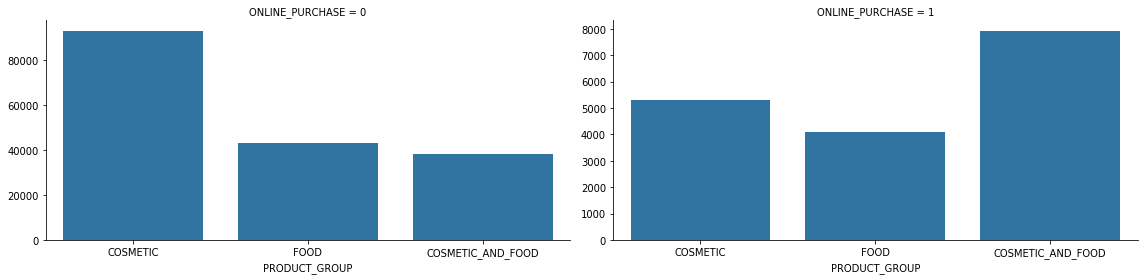

In [28]:
ax= sns.FacetGrid(data = customer_ex_cols,col='ONLINE_PURCHASE',sharey=False,height =4,aspect =2)
ax.map(sns.countplot,'PRODUCT_GROUP');

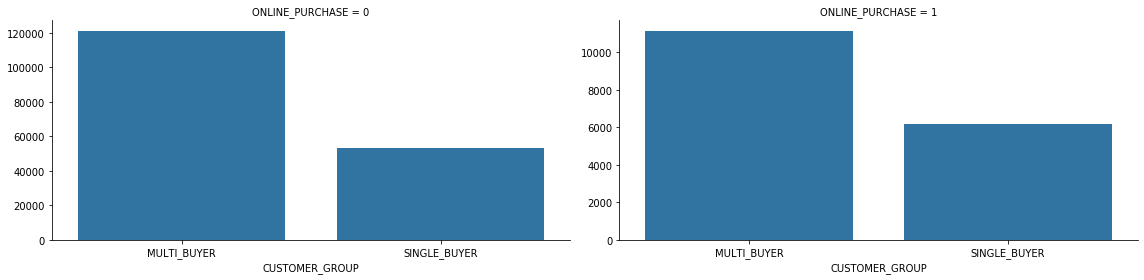

In [29]:
ax= sns.FacetGrid(data = customer_ex_cols,col='ONLINE_PURCHASE',sharey=False,height =4,aspect =2)
ax.map(sns.countplot,'CUSTOMER_GROUP');

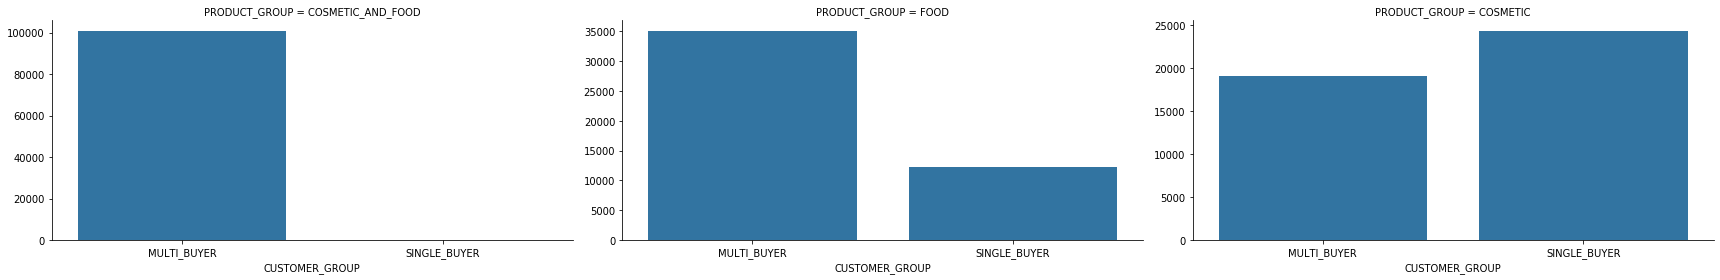

In [30]:
ax= sns.FacetGrid(data = customer_ex_cols,col='PRODUCT_GROUP',sharey=False,height =4,aspect =2)
ax.map(sns.countplot,'CUSTOMER_GROUP');

its clear that customers buy cosmetics and food together buying online , however when single buying cosmetics are bought more online than food

### intuition

Here i will try to develope some kind of domain specific intuition about the things i would expect to see in terms of my real world understanding. Will note down some questions to guide my thought process (these questions may or may not be applicable ):
* what is a mail order company ? 
* who generally uses it according to research ?
* what is it used for ?
* why would you use it as apposed to other sales company types ?

All info presented below was taken from the follwing [website](https://www.referenceforbusiness.com/small/Inc-Mail/Mail-Order-Business.html). I urge the reader to read the webpage to get better context for the analysis that will follow as I believe it provides relavant information that can provide evidence for some of the insights drawn.  

* A mail-order business is one that receives and fulfills orders for merchandise through the mail. Mail-order businesses date back to pre-Revolutionary War days, when gardeners and farmers ordered seeds through catalogs. Indeed, several of America's largest modern-day retailers first established themselves as mail-order enterprises back in the nineteenth century.
* mail-order businesses became successful because they offered a wider variety of goods than could be found in local retail outlets. In addition, goods purchased through the mail were often less expensive than those available locally, in part because mail-order houses, blessed with the capacity to maintain far larger inventories than many of their retail competitors, could afford to offer more sizable discounts.
* Mail-order shopping also offered consumers more convenience than shopping at retail stores. Indeed, for consumers in remote rural sections of the country, their isolation from commercial centers made catalog or mail-order shopping a necessity. Finally, individuals pursuing a hobby or special interest were more likely to locate those hard-to-find items in a specialty catalog than in a store.
* Possibly the single most important factor was the dramatic increase in the number of women working outside the home. This change gave some families more discretionary income, but perhaps more tellingly, the trend also meant that women had less time to make purchases.
* Magazine subscription sales represent the largest segment of mail-order sales, while books and newspapers also account for a significant portion of mail-order business. The fastest growing segment of the mail-order business, however, is that of specialty catalogs.


#### My thoughts:
So mail order companies are old bussiness structures/types, one thing this tells me is older people would have a sort of comfort toward it, we might get a hint of this from noticing that very few of the customers make online purchases .If you are money savvy you would generally lean toward mail order since it means cheaper. People in rural areas would use mail order due to the fact that they dont have access to commercial centers also the fact that it tends to be cheaper. If you are the type to have things delivered to you and not move around much you probably will be more open to the services of a mail order company or some kind of online shopping. If you are part of the younger generation in my opinion you would prefer to go to a shopping mall and browse around, or maybe you are a shopperholic and just buy things you dont need at the first sight of it, having access to a mail order company especially with the ease of making a purchase, you may find yourself leaving a significant dent in your wallet.





## Fit machine learning model to establish baseline and get some quick insights before manual analysis


In [31]:
azdias['customer_identifier'] = 0
customers['customer_identifier'] = 1
azdias_joined = pd.concat([azdias ,customers ],ignore_index=True)



* Interesting [article](https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27) describing the use of SHAP values for a more accurate and interpretable feature importance 
* Using XGBoost on a [GPU](https://medium.com/analytics-vidhya/using-gpu-to-boost-xgboost-training-time-533a114164d7)

In [32]:
# check feature importance when dropping undocumented columns to get some insight into what makes a customer
# drop columns greater than 80 percent missing
missing = azdias_joined.isna().sum()/len(azdias_joined)
cols_to_drop = missing[missing > 0.8].index.tolist()
# drop columns we wont be able to explain at the moment 
cols_to_drop += set(azdias_joined.columns) - set(cleaned_mapping_df.Attribute)
cols_to_drop += ['customer_identifier'] + azdias_joined.dtypes[azdias_joined.dtypes == object].index.tolist()


[0]	validation_0-auc:0.88539
Will train until validation_0-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.88963
[2]	validation_0-auc:0.89202
[3]	validation_0-auc:0.89356
[4]	validation_0-auc:0.89510
[5]	validation_0-auc:0.89616
[6]	validation_0-auc:0.89759
[7]	validation_0-auc:0.89836
[8]	validation_0-auc:0.89909
[9]	validation_0-auc:0.89977
[10]	validation_0-auc:0.90051
[11]	validation_0-auc:0.90110
[12]	validation_0-auc:0.90161
[13]	validation_0-auc:0.90189
[14]	validation_0-auc:0.90231
[15]	validation_0-auc:0.90306
[16]	validation_0-auc:0.90354
[17]	validation_0-auc:0.90383
[18]	validation_0-auc:0.90411
[19]	validation_0-auc:0.90442
[20]	validation_0-auc:0.90462
[21]	validation_0-auc:0.90494
[22]	validation_0-auc:0.90513
[23]	validation_0-auc:0.90531
[24]	validation_0-auc:0.90543
[25]	validation_0-auc:0.90569
[26]	validation_0-auc:0.90582
[27]	validation_0-auc:0.90598
[28]	validation_0-auc:0.90609
[29]	validation_0-auc:0.90622
[30]	validation_0-auc:0.90629
[31]	validation

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


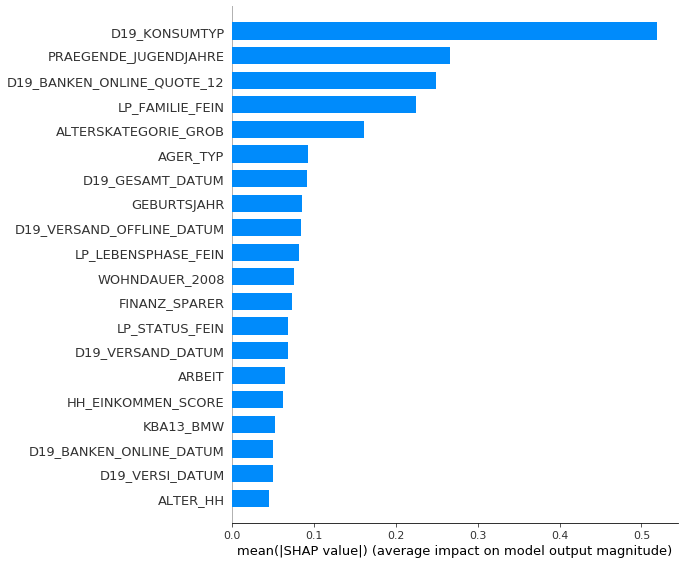

In [33]:
# will use XGBoost since we dont have to deal with NaN values
shap_values,feature_importance,_ = run_xgb_classifier(azdias_joined.drop(cols_to_drop,axis =1),azdias_joined.customer_identifier)

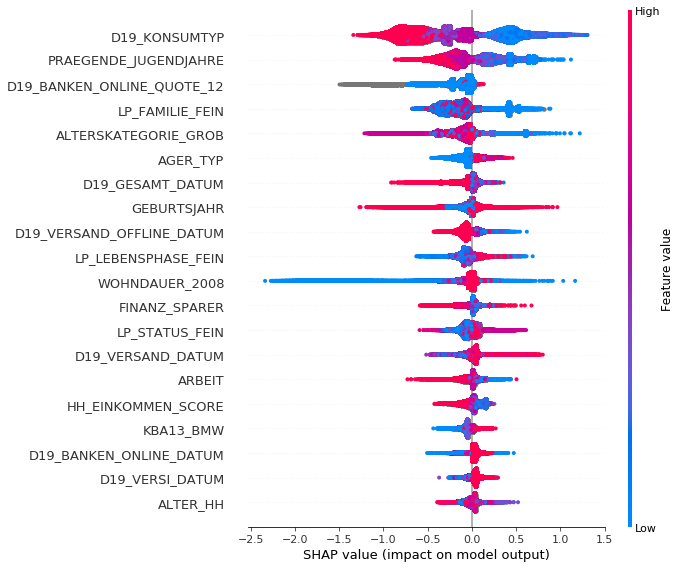

In [34]:
shap.summary_plot(shap_values,azdias_joined.drop(cols_to_drop,axis =1))

The summary plot shows us the affect of an indvidual person on the model output, the x axis is the log probability that an individual is a customer. It is evident that although D19_KONSUMTYP is the shown to be the most important feature, features lower down have large impacts on the model output (the spread across the x axis show the impact on the model output). With certain features it is clear to see from the summary plot why or how the feature impacts the model , other features are not as simple due to the fact that they may have other interacting features, a dependence plot will give us undestanding of these features more clearly, eg WOHNDAUER_2008, Note: if we dont specify what interaction index to use the shap algorithm will auto detect an interaction term to display

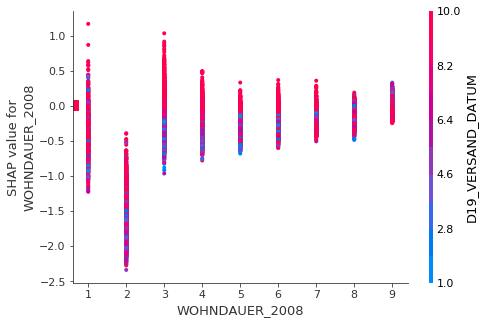

In [35]:
shap.dependence_plot("WOHNDAUER_2008", shap_values, azdias_joined.drop(cols_to_drop,axis =1))

In [37]:
lookUpAttr(azdias_joined,['WOHNDAUER_2008','D19_VERSAND_DATUM'])

****************************************************************************************************
WOHNDAUER_2008

Description:
 length of residence
Mapping:
 {'-1, 0': 'unknown', 1: 'length of residence below 1 year', 2: 'length of residence 1-2 years', 3: 'length of residence 2-3 years', 4: 'length of residence 3-4 years', 5: 'length of residence 4-5 years', 6: 'length of residence 5-6 years', 7: 'length of residence 6-7 years', 8: 'length of residence 7-10 years', 9: 'length of residence more than 10 years'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1.0     0.072123
2.0     0.574675
3.0     3.775327
4.0     4.913965
5.0     3.023716
6.0     3.464949
7.0     2.394741
8.0     8.038062
9.0    62.652038
NaN    11.090405
Name: WOHNDAUER_2008, dtype: float64

Unique Values:
10
****************************************************************************************************
D19_VERSAND_DATUM

Description:
 actuality of the last transac

This gives us a clearer view of how having a length of residence below a year seems to result in a higher log odds of being a customer, but having a resedency of 1-2 years results in a significantly lower log odds,and then an increase in log odds again in being a resident for more than 10 years. This could be because a year after people move they start to try out other avenues of getting their products after which they return 

Lets take a look at another unclear feature GEBURTSJAHR , as from the summary plot we see high values(being born earlier) being on either side of the log odds with some low values(being born later)

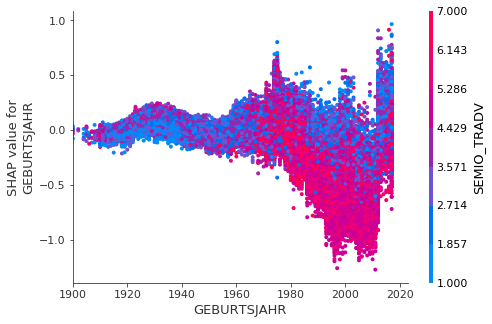

In [40]:
xmin = azdias_joined.drop(cols_to_drop,axis =1).GEBURTSJAHR.value_counts().sort_index().index[1]
shap.dependence_plot("GEBURTSJAHR", shap_values, azdias_joined.drop(cols_to_drop,axis =1),interaction_index='SEMIO_TRADV',xmin=xmin)

In [41]:
lookUpAttr(azdias_joined,['GEBURTSJAHR','SEMIO_TRADV'])

****************************************************************************************************
GEBURTSJAHR

Description:
 year of birth
Mapping:
 {'…': 'numeric value'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0       44.819845
1900     0.000646
1902     0.000185
1904     0.000462
1905     0.000739
1906     0.000646
1907     0.000369
1908     0.000739
1909     0.000739
1910     0.004340
1911     0.003694
1912     0.003232
1913     0.004248
1914     0.006280
1915     0.004340
1916     0.005910
1917     0.007572
1918     0.011728
1919     0.024564
1920     0.035277
1921     0.053654
1922     0.056978
1923     0.079880
1924     0.102690
1925     0.126515
1926     0.153758
1927     0.180169
1928     0.210643
1929     0.225049
1930     0.276025
1931     0.266606
1932     0.292924
1933     0.311302
1934     0.411683
1935     0.477526
1936     0.509478
1937     0.551496
1938     0.612907
1939     0.673856
1940     0.706085
1941     0.90223

This clearly shows younger people are less likely to be customers especially younger adults who have a very low affinity to being traditional minded.However we see very young people have a increased log odds of being customers, this is interesting , could it be because of inacurate data ? there seems to also be an area between 1920 and 1940 that has an increased probalility of being a customer.

The interpretation of this would depend on what exactly does being traditional minded mean according to the data collectors.

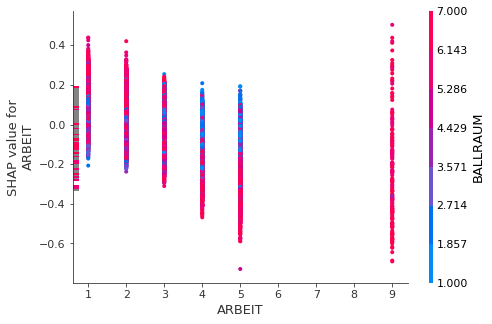

In [44]:
shap.dependence_plot("ARBEIT", shap_values, azdias_joined.drop(cols_to_drop,axis =1),interaction_index='BALLRAUM')

In [43]:
lookUpAttr(azdias_joined,['ARBEIT','BALLRAUM'])

****************************************************************************************************
ARBEIT

Description:
 share of unemployed person in the community
Mapping:
 {}
Additional Notes:
 [nan]
Info level:
 ['Community']

Column Summary
Value Counts Percentage
1.0     6.806708
2.0    15.606262
3.0    28.248280
4.0    32.222985
5.0     3.460055
9.0     0.016807
NaN    13.638903
Name: ARBEIT, dtype: float64

Unique Values:
7
****************************************************************************************************
BALLRAUM

Description:
 distance to next urban centre 
Mapping:
 {-1: 'unknown', 1: 'till 10 km', 2: '10 - 20 km', 3: '20 - 30 km', 4: '30 - 40 km', 5: '40 - 50 km', 6: '50-100 km', 7: 'more than 100 km '}
Additional Notes:
 [nan]
Info level:
 ['Postcode ']

Column Summary
Value Counts Percentage
1.0    15.964845
2.0    11.509937
3.0     7.989580
4.0     6.731722
5.0     5.740655
6.0    27.996635
7.0    10.796465
NaN    13.270162
Name: BALLRAUM, dtype: floa

We can see that if there is a larger share of unemployed people in the community then there likelyhood of being a customer decreases, we also see in communities with larger number of unemployed living further away from urban centers decreases your odds of being a customer

lets look a the most important feature D19_KONSUMTYP

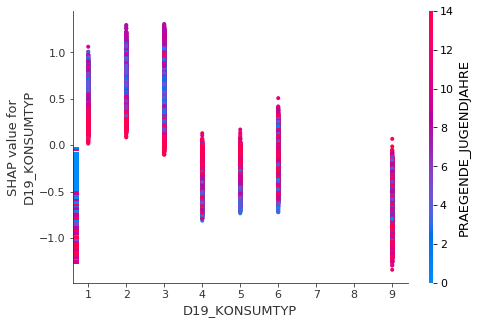

In [45]:
shap.dependence_plot("D19_KONSUMTYP", shap_values, azdias_joined.drop(cols_to_drop,axis =1))

In [46]:
lookUpAttr(azdias_joined,['D19_KONSUMTYP','PRAEGENDE_JUGENDJAHRE'])

****************************************************************************************************
D19_KONSUMTYP

Description:
 consumption type 
Mapping:
 {1: 'Universal', 2: 'Versatile', 3: 'Gourmet', 4: 'Family', 5: 'Informed ', 6: 'Modern', 9: 'Inactive'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1.0    14.194278
2.0     7.288389
3.0     9.756730
4.0     7.670059
5.0     2.394094
6.0     5.908911
9.0    24.639270
NaN    28.148269
Name: D19_KONSUMTYP, dtype: float64

Unique Values:
8
****************************************************************************************************
PRAEGENDE_JUGENDJAHRE

Description:
 dominating movement in the person's youth (avantgarde or mainstream)
Mapping:
 {'-1, 0': 'unknown', 1: '40ies - war years (Mainstream, O+W)', 2: '40ies - reconstruction years (Avantgarde, O+W)', 3: '50ies - economic miracle (Mainstream, O+W)', 4: '50ies - milk bar / Individualisation (Avantgarde, O+W)', 5: '60ies - e

Being a universal,versatile and gourmet type consumer while being of an older generation seems to increase the chances of being a customer, while being family,informed,modern consumption type and part of the younger generation increases the probability of being a customer

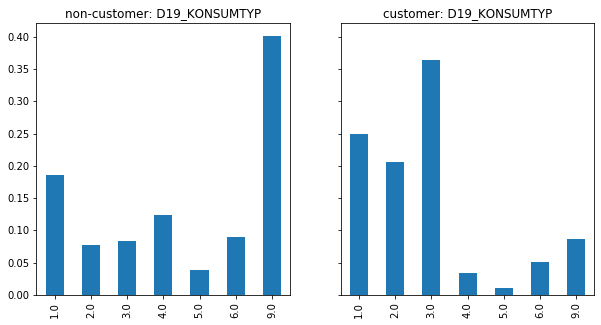

****************************************************************************************************
D19_KONSUMTYP

Description:
 consumption type 
Mapping:
 {1: 'Universal', 2: 'Versatile', 3: 'Gourmet', 4: 'Family', 5: 'Informed ', 6: 'Modern', 9: 'Inactive'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1.0    14.194278
2.0     7.288389
3.0     9.756730
4.0     7.670059
5.0     2.394094
6.0     5.908911
9.0    24.639270
NaN    28.148269
Name: D19_KONSUMTYP, dtype: float64

Unique Values:
8


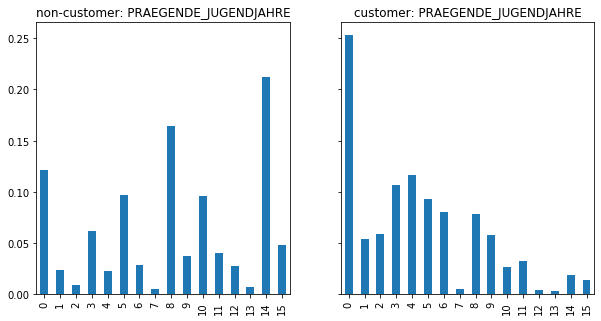

****************************************************************************************************
PRAEGENDE_JUGENDJAHRE

Description:
 dominating movement in the person's youth (avantgarde or mainstream)
Mapping:
 {'-1, 0': 'unknown', 1: '40ies - war years (Mainstream, O+W)', 2: '40ies - reconstruction years (Avantgarde, O+W)', 3: '50ies - economic miracle (Mainstream, O+W)', 4: '50ies - milk bar / Individualisation (Avantgarde, O+W)', 5: '60ies - economic miracle (Mainstream, O+W)', 6: '60ies - generation 68 / student protestors (Avantgarde, W)', 7: '60ies - opponents to the building of the Wall (Avantgarde, O)', 8: '70ies - family orientation (Mainstream, O+W)', 9: '70ies - peace movement (Avantgarde, O+W)', 10: '80ies - Generation Golf (Mainstream, W)', 11: '80ies - ecological awareness (Avantgarde, W)', 12: '80ies - FDJ / communist party youth organisation (Mainstream, O)', 13: '80ies - Swords into ploughshares (Avantgarde, O)', 14: '90ies - digital media kids (Mainstream, O+W)'

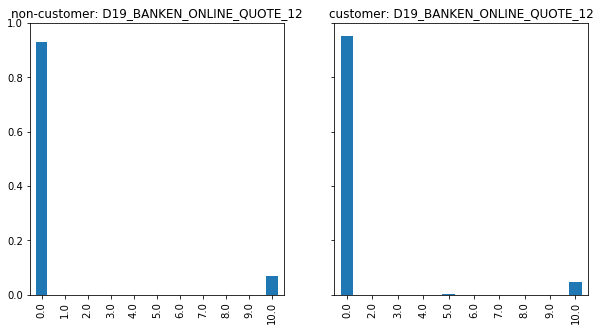

****************************************************************************************************
D19_BANKEN_ONLINE_QUOTE_12

Description:
 amount of online transactions within all transactions in the segment bank 
Mapping:
 {0: 'no Online-transactions within the last 12 months', 1: '10% Online-transactions within the last 12 months', 2: '20% Online-transactions within the last 12 months', 3: '30% Online-transactions within the last 12 months', 4: '40% Online-transactions within the last 12 months', 5: '50% Online-transactions within the last 12 months', 6: '60% Online-transactions within the last 12 months', 7: '70% Online-transactions within the last 12 months', 8: '80% Online-transactions within the last 12 months', 9: '90% Online-transactions within the last 12 months', 10: '100% Online-transactions within the last 12 months'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
0.0     67.047105
1.0      0.000185
2.0      0.003971
3.0     

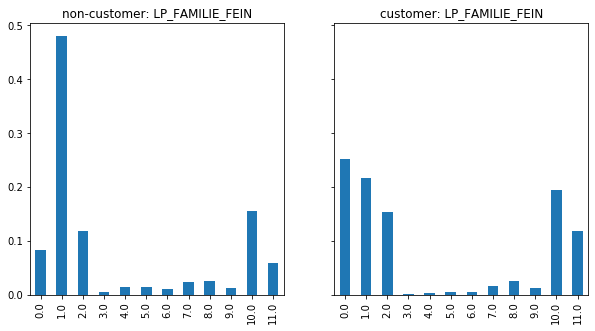

****************************************************************************************************
LP_FAMILIE_FEIN

Description:
 familytyp fine
Mapping:
 {1: 'single ', 2: 'couple', 3: 'young single parent ', 4: 'single parent with teenager', 5: 'single parent with child of full age', 6: 'young family ', 7: 'family with teenager ', 8: 'family with child of full age', 9: 'shared flat', 10: 'two-generational household', 11: 'multi-generational household'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0.0     11.109982
1.0     43.139685
2.0     12.304490
3.0      0.472170
4.0      1.186381
5.0      1.184165
6.0      0.909894
7.0      2.187699
8.0      2.559672
9.0      1.253702
10.0    16.112785
11.0     6.834412
NaN      0.744963
Name: LP_FAMILIE_FEIN, dtype: float64

Unique Values:
13


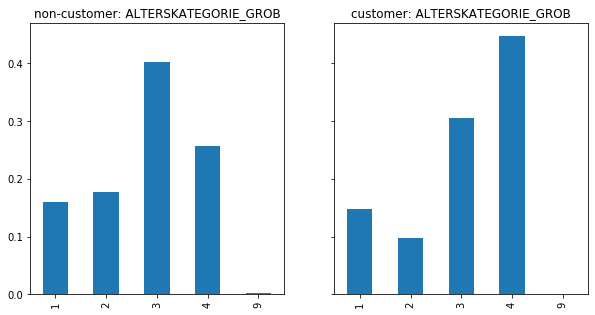

****************************************************************************************************
ALTERSKATEGORIE_GROB

Description:
 age classification through prename analysis 
Mapping:
 {'-1, 0': 'unknown', 1: '< 30 years', 2: '30 - 45 years', 3: '46 - 60 years', 4: '> 60 years', 9: 'uniformly distributed'}
Additional Notes:
 ['modelled on millions of first name-age-reference data  ']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1    15.816629
2    16.367293
3    38.499159
4    29.028704
9     0.288215
Name: ALTERSKATEGORIE_GROB, dtype: float64

Unique Values:
5


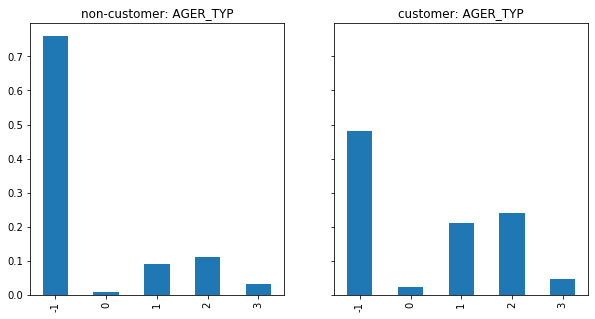

****************************************************************************************************
AGER_TYP

Description:
 best-ager typology
Mapping:
 {-1: 'unknown', 0: 'no classification possible', 1: 'passive elderly', 2: 'cultural elderly', 3: 'experience-driven elderly'}
Additional Notes:
 ['in cooperation with Kantar TNS; the information basis is a consumer survey']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
-1    71.071123
 0     1.197832
 1    11.098624
 2    13.329910
 3     3.302511
Name: AGER_TYP, dtype: float64

Unique Values:
5


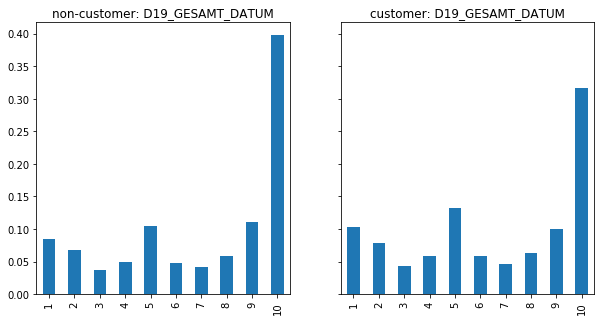

****************************************************************************************************
D19_GESAMT_DATUM

Description:
 actuality of the last transaction with the complete file TOTAL
Mapping:
 {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder than 1,5 years', 8: 'activity elder than 2 years', 9: 'activity elder than 3 years', 10: 'no transactions known'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1      8.831599
2      6.903395
3      3.811435
4      5.097274
5     11.009324
6      4.924031
7      4.289515
8      5.999503
9     10.837097
10    38.296827
Name: D19_GESAMT_DATUM, dtype: float64

Unique Values:
10


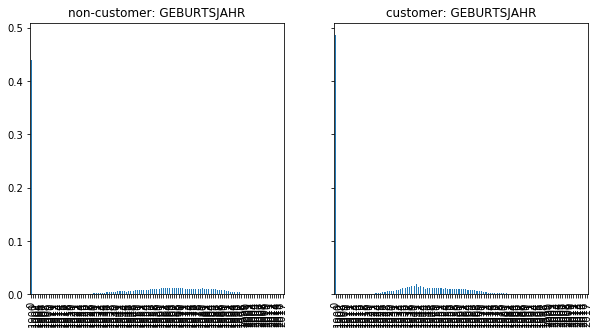

****************************************************************************************************
GEBURTSJAHR

Description:
 year of birth
Mapping:
 {'…': 'numeric value'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0       44.819845
1900     0.000646
1902     0.000185
1904     0.000462
1905     0.000739
1906     0.000646
1907     0.000369
1908     0.000739
1909     0.000739
1910     0.004340
1911     0.003694
1912     0.003232
1913     0.004248
1914     0.006280
1915     0.004340
1916     0.005910
1917     0.007572
1918     0.011728
1919     0.024564
1920     0.035277
1921     0.053654
1922     0.056978
1923     0.079880
1924     0.102690
1925     0.126515
1926     0.153758
1927     0.180169
1928     0.210643
1929     0.225049
1930     0.276025
1931     0.266606
1932     0.292924
1933     0.311302
1934     0.411683
1935     0.477526
1936     0.509478
1937     0.551496
1938     0.612907
1939     0.673856
1940     0.706085
1941     0.90223

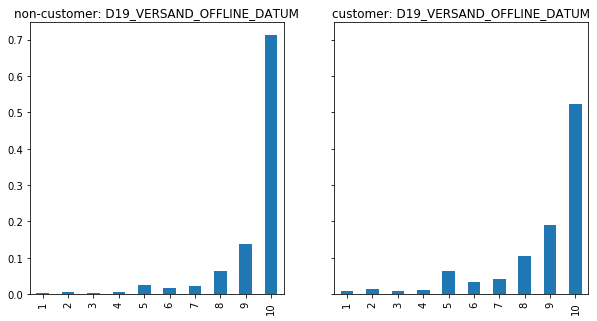

****************************************************************************************************
D19_VERSAND_OFFLINE_DATUM

Description:
 actuality of the last transaction for the segment mail-order OFFLINE
Mapping:
 {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder than 1,5 years', 8: 'activity elder than 2 years', 9: 'activity elder than 3 years', 10: 'no transactions known'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1      0.492486
2      0.694541
3      0.463582
4      0.704607
5      3.215058
6      2.035511
7      2.553670
8      7.196504
9     14.834242
10    67.809799
Name: D19_VERSAND_OFFLINE_DATUM, dtype: float64

Unique Values:
10


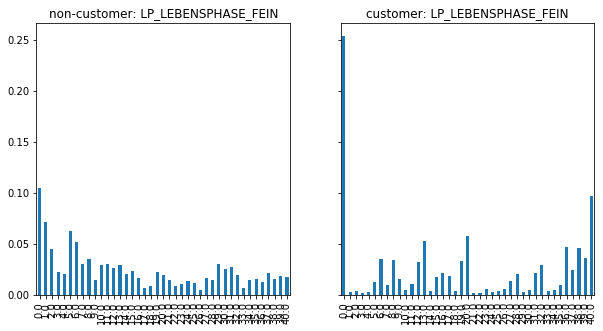

****************************************************************************************************
LP_LEBENSPHASE_FEIN

Description:
 lifestage fine 
Mapping:
 {1: 'single low-income earners of younger age', 2: 'single low-income earners of middle age', 3: 'single average earners of younger age ', 4: 'single average earners of middle age', 5: 'single low-income earners of advanced age', 6: 'single low-income earners at retirement age ', 7: 'single average earners of advanced age', 8: 'single average earners at retirement age', 9: 'single independant persons', 10: 'wealthy single homeowners', 11: 'single homeowners of advanced age', 12: 'single homeowners at retirement age', 13: 'single top earners of higher age ', 14: 'low-income- and average earner-couples of younger age', 15: 'low-income earner-couples of higher age', 16: 'average earner-couples of higher age ', 17: 'independant couples', 18: 'wealthy homeowner-couples of younger age ', 19: 'homeowner-couples of higher age', 20: 't

In [48]:
grouped_df = azdias_joined.groupby('customer_identifier')
non_customer =grouped_df.get_group(0.0)
customer = grouped_df.get_group(1.0)

for col in feature_importance.col_name.tolist()[:10]:
    fig,axes = plt.subplots(ncols=2,figsize = (10,5),sharey =True)oi
    non_customer[col].value_counts(normalize =True).sort_index().plot(kind = 'bar',title = f'non-customer: {col}',ax=axes[0])
    customer[col].value_counts(normalize =True).sort_index().plot(kind = 'bar',title = f'customer: {col}',ax=axes[1])
    display(fig)
    lookUpAttr(azdias_joined,[col])
    plt.close()


non_customer most frequent: 53
customer most frequent: 79


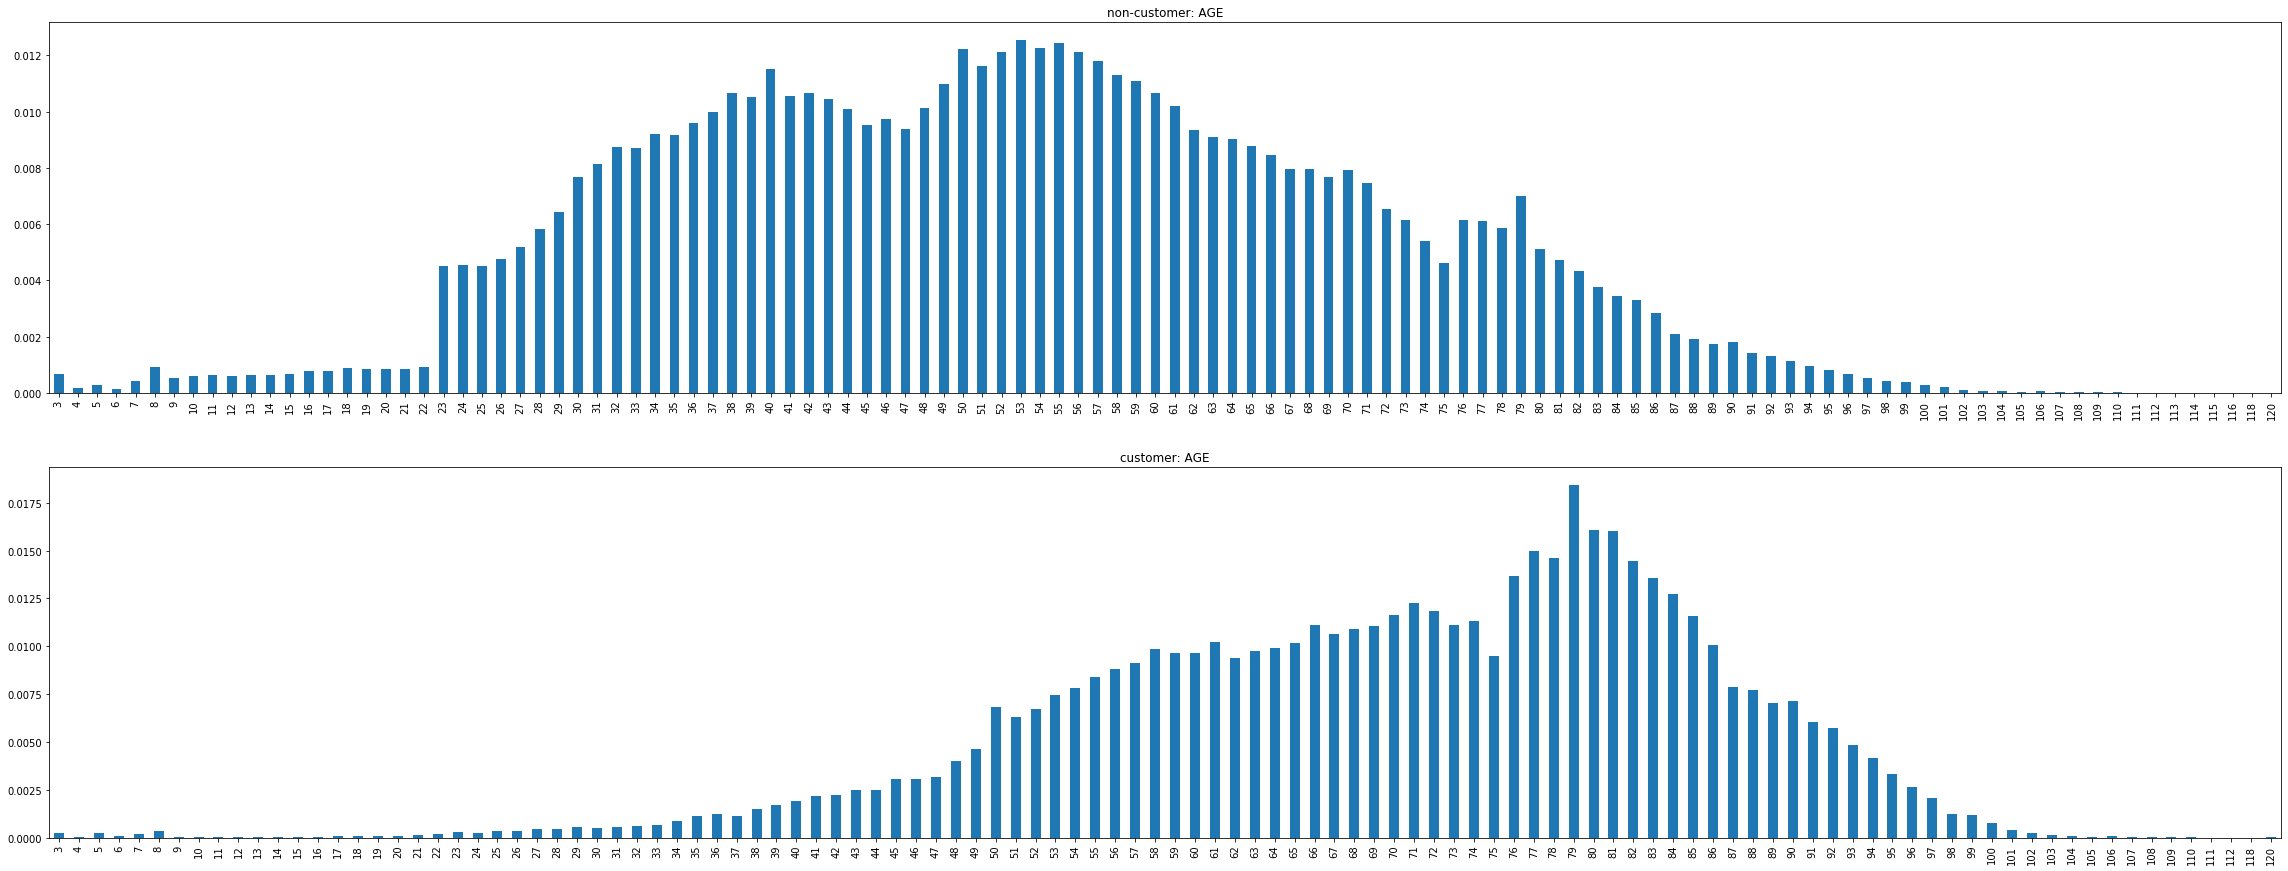

In [49]:
#  GEBURTSJAHR seemed interesting , just to edit it a bit

col = 'GEBURTSJAHR'
fig,axes = plt.subplots(nrows=2,figsize = (40,15))
non_customer[col].apply(lambda x: x if x ==0 else (2020-x)).value_counts(normalize =True).sort_index()[1:].plot(kind = 'bar',title = f'non-customer: AGE',ax=axes[0])
print('non_customer most frequent:',2020-non_customer[col].value_counts().sort_values().index[-2] )
customer[col].apply(lambda x: x if x ==0 else (2020-x)).value_counts(normalize =True).sort_index()[1:].plot(kind = 'bar',title = f'customer: AGE',ax=axes[1])
print('customer most frequent:', 2020 - customer[col].value_counts().sort_values().index[-2] )
display(fig)
plt.close()
# Interesting , why we have customers < 18 years old or more than 100 same with general population 
# will persons below 18 and greater than 100 give us any valuable info ?

#  I find it strange that we have recorded customers that are so young , like imagine a 3 year old saying sorry i only eat organic, hmmm typing this out actually makes it 
# seem less ironic then it seemed in my head

Some interesting takeaways from the above

something to note, where customer data exists in proportion to non customer data not much can be said, however categories that exibit a deviation from the proportion might hold some valuable information to draw some conclusion based on the data

* in terms of consumption type customers seem to me universal , versatile and gourmet consumers
* customers seem to be more on the older side of the population >60 (ALTERSKATEGORIE_GROB)
* (PRAEGENDE_JUGENDJAHRE) re affirms the conclusion above where we see a clustering of categories in terms of generations earlier. especially people from the 50ies who are Avantgarde signifying a conservation driven personality
* (LP_LEBENSPHASE_FEIN) again reflects customers as top earners of higher age and which belong to families indication of stable family oriented people, interesting to note the general polulation shows large amounts of single people in the low income bracket 
* WOHNDAUER_2008 interesting to note customers are residents of the country for longer than 10 years, or less than 1 year
* looking at GEBURTSJAHR again shows us the mean birth year for the customers seem to be earlier then non customers with a peak at around 1941 , this gets me thinking if our customers are more on the older side what are the chances they are comfortable with using technology , email ? online shopping ? also the dependence plot above shows that younger customers also have a high odds of being a customer, and from the plot of GEBURTSJAHR above we see an absence of customers in the 9-50 age group when compared to non customers
* FINANZ_ANLEGER shows deviation in proportion in category 1 telling us customers have a high affinity to investing , this ties up with customers being of an older age. This is also a norm in society , I find this ironic though assuming people think only about themselves we generally see older people have a higher affinity to investing, shouldnt this be the other way around ? 
* SEMIO_TRADV the general population has a high affinity for tradition , asked my dad about this as he has been to germany a few times on bussiness (he works for a german company) he said the german people in general are very meticulous eg keeping to one side of the escalator allowing people in a rush to go past, very dependable , stick to meeting times, so this makes sense. customers show a higher affinity to tradition this also a reflection of age 
* CJT_GESAMTTYP shows that customers are a mix of Advertising-Enthusiast with restricted Cross-Channel-Behaviour  , Advertising- and Consumptiontraditionalist (posible feature engineering here information preferance/channel usage)
* LP_STATUS_FEIN shows customers are 'top earners' and 'minimalistic high-income earners' 
* ANREDE_KZ shows us customers seem to be more male then female 
* The general population of germany seem to be for environmental sustainability

in summary , customers are highly likely to be of an older age group who are traditional,male, are high income earners and are money wise
from the dependance plots above we see that being older doesnt necceserily increase your odds of being a customer but rather being younger decreases your odds of being a customer upto a certian point where the odds of being a customer increase significanlty in seemingly very young individuals


this ties up in someways to our intuition developed above

# Exploratory Data Analysis

In [32]:
azdias = azdias_joined

###  Missing columns 
Columns that exist in the data dictionary and not in the Dataframe 

In [33]:
missing_cols = set(cleaned_mapping_df.Attribute) - set(azdias.columns)
print(missing_cols)


{'D19_KK_KUNDENTYP', 'PLZ', 'D19_SONSTIGE_RZ', 'D19_BANKEN_DIREKT_RZ', 'D19_HAUS_DEKO_RZ', 'D19_BEKLEIDUNG_REST_RZ', 'D19_BANKEN_GROSS_RZ', 'D19_LEBENSMITTEL_RZ', 'WACHSTUMSGEBIET_NB', 'GEOSCORE_KLS7', 'BIP_FLAG', 'D19_RATGEBER_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_DROGERIEARTIKEL_RZ', 'D19_DIGIT_SERV_RZ', 'D19_SCHUHE_RZ', 'D19_VERSAND_REST_RZ', 'SOHO_FLAG', 'D19_KINDERARTIKEL_RZ', 'D19_LOTTO_RZ', 'D19_ENERGIE_RZ', 'D19_TIERARTIKEL_RZ', 'D19_TELKO_MOBILE_RZ', 'D19_BILDUNG_RZ', 'D19_REISEN_RZ', 'D19_BIO_OEKO_RZ', 'D19_VERSICHERUNGEN_RZ', 'D19_WEIN_FEINKOST_RZ', 'CAMEO_DEUINTL_2015', 'D19_GARTEN_RZ', 'D19_TECHNIK_RZ', 'D19_BEKLEIDUNG_GEH_RZ', 'PLZ8', 'KBA13_CCM_1400_2500', 'D19_SAMMELARTIKEL_RZ', 'HAUSHALTSSTRUKTUR', 'D19_TELKO_REST_RZ', 'D19_BANKEN_REST_RZ', 'GKZ', 'D19_KOSMETIK_RZ', 'D19_FREIZEIT_RZ', 'EINWOHNER', 'D19_VOLLSORTIMENT_RZ', 'D19_BUCH_RZ', 'D19_BANKEN_LOKAL_RZ', 'D19_HANDWERK_RZ'}


In [34]:
print(len(missing_cols))

46


### Undocumented columns
columns that do not appear in the data dictionary , we dont have information for these columns 

In [35]:
undoc_cols = set(azdias.columns) - set(cleaned_mapping_df.Attribute)
print(undoc_cols)

{'ALTER_KIND2', 'D19_TELKO_ONLINE_QUOTE_12', 'D19_KINDERARTIKEL', 'D19_KOSMETIK', 'STRUKTURTYP', 'D19_LOTTO', 'D19_SCHUHE', 'SOHO_KZ', 'KBA13_GBZ', 'EINGEFUEGT_AM', 'D19_TIERARTIKEL', 'EINGEZOGENAM_HH_JAHR', 'D19_REISEN', 'CJT_TYP_3', 'KK_KUNDENTYP', 'ALTERSKATEGORIE_FEIN', 'D19_SONSTIGE', 'D19_TELKO_REST', 'D19_BIO_OEKO', 'D19_BANKEN_LOKAL', 'D19_ENERGIE', 'D19_BANKEN_GROSS', 'DSL_FLAG', 'D19_BUCH_CD', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'D19_VERSAND_REST', 'HH_DELTA_FLAG', 'KBA13_BAUMAX', 'KBA13_KMH_210', 'VERDICHTUNGSRAUM', 'D19_BANKEN_REST', 'D19_VERSICHERUNGEN', 'D19_HANDWERK', 'D19_BANKEN_DIREKT', 'D19_BEKLEIDUNG_REST', 'KONSUMZELLE', 'D19_SOZIALES', 'VHA', 'CJT_TYP_6', 'VK_DHT4A', 'D19_TECHNIK', 'FIRMENDICHTE', 'ALTER_KIND3', 'D19_FREIZEIT', 'VHN', 'ANZ_STATISTISCHE_HAUSHALTE', 'KBA13_CCM_1401_2500', 'D19_GARTEN', 'KBA13_ANTG1', 'D19_DIGIT_SERV', 'ANZ_KINDER', 'KBA13_HHZ', 'AKT_DAT_KL', 'CJT_KATALOGNUTZER', 'CJT_TYP_5', 'KBA13_ANTG4', 'CJT_TYP_4', 'RT_UEBERGROESSE', 'UMFELD_JUNG', 

In [36]:
print(len(undoc_cols))

90


Could possibly drop these columns due their unexplainability however from the pre analysis we have seen that some undocumented columns such as D19_KONSUMTYP_MAX prove very important in predicting a customer, will decide later on after further analysis, but another interesting thing i find between the missing columns and so called undocumented columns above is that there are names that are the same just missing a prefix or have an added post fix , i feel that they maybe incorrectly named columns lets look for columns that contain names in each other

In [37]:
# so we see that indeed columns have been incorrectly named in either the
# documentation of the dataframe so lets rename all dataframe columns to 
# match the documentation
def inOneOrAnother(name_1,name_2):
    return (name_1 in name_2) or (name_2 in name_1)
in_doc = 'IN DOC'
in_df = 'IN DF'
print(f'{in_doc:30} {in_df}')
for missing_col in missing_cols:
    for undoc_col in undoc_cols:
        if inOneOrAnother(missing_col,undoc_col):
            print(f'{missing_col:30} {undoc_col}')

IN DOC                         IN DF
D19_KK_KUNDENTYP               KK_KUNDENTYP
D19_SONSTIGE_RZ                D19_SONSTIGE
D19_BANKEN_DIREKT_RZ           D19_BANKEN_DIREKT
D19_HAUS_DEKO_RZ               D19_HAUS_DEKO
D19_BEKLEIDUNG_REST_RZ         D19_BEKLEIDUNG_REST
D19_BANKEN_GROSS_RZ            D19_BANKEN_GROSS
D19_LEBENSMITTEL_RZ            D19_LEBENSMITTEL
D19_RATGEBER_RZ                D19_RATGEBER
D19_NAHRUNGSERGAENZUNG_RZ      D19_NAHRUNGSERGAENZUNG
D19_DROGERIEARTIKEL_RZ         D19_DROGERIEARTIKEL
D19_DIGIT_SERV_RZ              D19_DIGIT_SERV
D19_SCHUHE_RZ                  D19_SCHUHE
D19_VERSAND_REST_RZ            D19_VERSAND_REST
D19_KINDERARTIKEL_RZ           D19_KINDERARTIKEL
D19_LOTTO_RZ                   D19_LOTTO
D19_ENERGIE_RZ                 D19_ENERGIE
D19_TIERARTIKEL_RZ             D19_TIERARTIKEL
D19_TELKO_MOBILE_RZ            D19_TELKO_MOBILE
D19_BILDUNG_RZ                 D19_BILDUNG
D19_REISEN_RZ                  D19_REISEN
D19_BIO_OEKO_RZ                D19_B

In [38]:
rename_dict = dict()
for missing_col in missing_cols:
    for undoc_col in undoc_cols:
        if inOneOrAnother(missing_col,undoc_col):
            rename_dict[undoc_col] = missing_col
azdias.rename(columns = rename_dict,inplace =True)  

In [39]:
# few that seem to have been left 

rename_dict = {'CAMEO_INTL_2015':'CAMEO_DEUINTL_2015',
               'D19_BUCH_CD':'D19_BUCH_RZ',
               'SOHO_KZ':'SOHO_FLAG',
              'KBA13_CCM_1401_2500':'KBA13_CCM_1400_2500'}
azdias.rename(columns = rename_dict,inplace =True)  


In [40]:
# lets see whats left undocumented
undoc_cols = set(azdias.columns) - set(cleaned_mapping_df.Attribute)
print(undoc_cols)

{'DSL_FLAG', 'ALTER_KIND4', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'ALTER_KIND2', 'D19_TELKO_ONLINE_QUOTE_12', 'HH_DELTA_FLAG', 'KBA13_BAUMAX', 'KBA13_KMH_210', 'ANZ_KINDER', 'KOMBIALTER', 'STRUKTURTYP', 'KBA13_HHZ', 'UNGLEICHENN_FLAG', 'VERDICHTUNGSRAUM', 'RT_SCHNAEPPCHEN', 'EXTSEL992', 'D19_KONSUMTYP_MAX', 'AKT_DAT_KL', 'KBA13_GBZ', 'CJT_TYP_1', 'EINGEFUEGT_AM', 'CJT_KATALOGNUTZER', 'CJT_TYP_5', 'EINGEZOGENAM_HH_JAHR', 'customer_identifier', 'CJT_TYP_3', 'KBA13_ANTG4', 'CJT_TYP_4', 'RT_UEBERGROESSE', 'KONSUMZELLE', 'KBA13_ANTG2', 'ALTERSKATEGORIE_FEIN', 'UMFELD_JUNG', 'D19_SOZIALES', 'VHA', 'KBA13_ANTG3', 'CJT_TYP_6', 'VK_DHT4A', 'FIRMENDICHTE', 'VK_DISTANZ', 'CJT_TYP_2', 'ALTER_KIND3', 'D19_VERSI_ONLINE_QUOTE_12', 'VHN', 'D19_LETZTER_KAUF_BRANCHE', 'GEMEINDETYP', 'ANZ_STATISTISCHE_HAUSHALTE', 'ALTER_KIND1', 'UMFELD_ALT', 'VK_ZG11', 'KBA13_ANTG1'}


### Documented Columns
Columns we have descriptions for

In [41]:
doc_cols= set(azdias.columns).intersection(set(cleaned_mapping_df.Attribute))
print(doc_cols)

{'D19_BANKEN_DIREKT_RZ', 'KBA05_SEG4', 'FINANZ_ANLEGER', 'KBA13_KW_90', 'D19_VERSAND_ANZ_12', 'KBA05_ANHANG', 'KBA13_NISSAN', 'KBA13_KW_120', 'D19_VERSI_DATUM', 'D19_VERSAND_ONLINE_QUOTE_12', 'PLZ8_ANTG4', 'D19_FREIZEIT_RZ', 'D19_BANKEN_LOKAL_RZ', 'D19_VERSICHERUNGEN_RZ', 'KBA13_BJ_2008', 'D19_SONSTIGE_RZ', 'D19_BANKEN_ANZ_12', 'VERS_TYP', 'CAMEO_DEU_2015', 'KBA13_HERST_AUDI_VW', 'KBA05_SEG2', 'AGER_TYP', 'KBA05_DIESEL', 'KBA05_KRSHERST3', 'KBA05_SEG3', 'KBA05_ANTG4', 'KBA05_HERST4', 'KBA05_MAXSEG', 'KBA13_VORB_1', 'KBA13_CCM_2000', 'KBA13_SEG_GELAENDEWAGEN', 'KBA13_HALTER_45', 'FINANZ_HAUSBAUER', 'KBA05_HERST1', 'KBA05_SEG6', 'KBA13_AUTOQUOTE', 'D19_SCHUHE_RZ', 'D19_BANKEN_ONLINE_QUOTE_12', 'SOHO_FLAG', 'FINANZ_MINIMALIST', 'KBA05_HERST3', 'SEMIO_VERT', 'D19_GARTEN_RZ', 'KBA13_SEG_KOMPAKTKLASSE', 'CAMEO_DEUG_2015', 'KBA13_KRSAQUOT', 'KBA05_ANTG1', 'FINANZ_UNAUFFAELLIGER', 'KBA05_ALTER2', 'D19_BANKEN_ANZ_24', 'REGIOTYP', 'KBA13_ANZAHL_PKW', 'D19_KK_KUNDENTYP', 'SEMIO_DOM', 'SEMIO_REL',

In [42]:
print(len(doc_cols))

314


In [43]:
# quick look at all columns 
lookUpAttr(azdias,show_all =True)

****************************************************************************************************
AGER_TYP

Description:
 best-ager typology
Mapping:
 {-1: 'unknown', 0: 'no classification possible', 1: 'passive elderly', 2: 'cultural elderly', 3: 'experience-driven elderly'}
Additional Notes:
 ['in cooperation with Kantar TNS; the information basis is a consumer survey']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
-1    71.071123
 0     1.197832
 1    11.098624
 2    13.329910
 3     3.302511
Name: AGER_TYP, dtype: float64

Unique Values:
5
****************************************************************************************************
AKT_DAT_KL

Feature info does not EXIST in data dictionary
Column Summary
Value Counts Percentage
1.0    47.077820
2.0     1.966990
3.0     2.529937
4.0     2.195733
5.0     3.075061
6.0     2.699301
7.0     2.093967
8.0     1.723563
9.0    25.547225
NaN    11.090405
Name: AKT_DAT_KL, dtype: float64

Unique Values:
10

*******

Value Counts Percentage
1A      1.389637
1B      0.482790
1C      0.602379
1D      1.642760
1E      0.775899
2A      1.566573
2B      1.751914
2C      2.262315
2D      4.274001
3A      1.149442
3B      0.824935
3C      3.822886
3D      3.914771
4A      3.755011
4B      1.028745
4C      5.251955
4D      0.987558
4E      0.610229
5A      1.309757
5B      1.112781
5C      1.062821
5D      1.799749
5E      0.406604
5F      0.493317
6A      0.699251
6B      6.123156
6C      1.630108
6D      0.674871
6E      1.772415
6F      0.605796
7A      3.556096
7B      2.578696
7C      0.947387
7D      0.566364
7E      0.523330
8A      5.235148
8B      3.437522
8C      3.120772
8D      1.826807
9A      1.991462
9B      2.640476
9C      2.398619
9D      2.821199
9E      0.728340
XX      0.046081
NaN    13.797278
Name: CAMEO_DEU_2015, dtype: float64

Unique Values:
46
****************************************************************************************************
CAMEO_DEUG_2015

Description:
 CAMEO 

 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
0    89.373454
1     4.968450
2     3.139611
3     1.065130
4     0.921253
5     0.398662
6     0.133441
Name: D19_BANKEN_ANZ_24, dtype: float64

Unique Values:
7
****************************************************************************************************
D19_BANKEN_DATUM

Description:
 actuality of the last transaction for the segment banks TOTAL
Mapping:
 {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder than 1,5 years', 8: 'activity elder than 2 years', 9: 'activity elder than 3 years', 10: 'no transactions known'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1      0.968073
2      0.843774
3      0.5

Value Counts Percentage
1      0.830661
2      1.187674
3      0.721137
4      1.195985
5      4.604326
6      2.831265
7      3.425794
8      8.344007
9     17.031822
10    59.827330
Name: D19_GESAMT_OFFLINE_DATUM, dtype: float64

Unique Values:
10
****************************************************************************************************
D19_GESAMT_ONLINE_DATUM

Description:
 actuality of the last transaction with the complete file ONLINE
Mapping:
 {1: 'highest activity within the last 12 months', 2: 'very high activity within the last 12 months', 3: 'high activity within the last 12 months', 4: 'increased activity within the last 12 months', 5: 'slightly increased activity within the last 12 months', 6: 'activity elder than 1 year', 7: 'activity elder than 1,5 years', 8: 'activity elder than 2 years', 9: 'activity elder than 3 years', 10: 'no transactions known'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1      6.606315
2   

Value Counts Percentage
0    89.238627
1     0.121067
2     1.106039
3     1.334783
4     0.273255
5     0.889855
6     5.596224
7     1.440150
Name: D19_RATGEBER_RZ, dtype: float64

Unique Values:
8
****************************************************************************************************
D19_REISEN_RZ

Description:
 transactional activity based on the product group TRAVEL RELATED PRODUCTS
Mapping:
 {0: 'no transaction known', 1: 'Multibuyer 0-12 months', 2: 'Doublebuyer 0-12 months', 3: 'Singlebuyer 0-12 months', 4: 'Multi-/Doublebuyer 13-24 months', 5: 'Singlebuyer 13-24 months', 6: 'Buyer > 24 months', 7: 'Prospects > 24 months'}
Additional Notes:
 [nan]
Info level:
 ['125m x 125m Grid']

Column Summary
Value Counts Percentage
0    80.503346
1     0.014591
2     0.466629
3     0.714765
4     0.119312
5     0.628144
6    11.854299
7     5.698914
Name: D19_REISEN_RZ, dtype: float64

Unique Values:
8
***************************************************************************

Value Counts Percentage
0    82.709699
1     0.494148
2     0.786057
3     4.322298
4     0.520006
5     2.780658
6     7.705613
7     0.681520
Name: D19_VERSAND_REST_RZ, dtype: float64

Unique Values:
8
****************************************************************************************************
D19_VERSI_ANZ_12

Description:
 transaction activity INSURANCE in the last 12 months
Mapping:
 {0: 'no transactions known', 1: 'very low activity', 2: 'low activity', 3: 'slightly increased activity', 4: 'increased activity', 5: 'high activity', 6: 'very high activity'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
0    92.210721
1     5.085361
2     2.208200
3     0.353781
4     0.124022
5     0.016715
6     0.001201
Name: D19_VERSI_ANZ_12, dtype: float64

Unique Values:
7
****************************************************************************************************
D19_VERSI_ANZ_24

Description:
 transaction activity INSURANCE in the

Value Counts Percentage
1.0     8.857641
2.0    15.203353
3.0     9.112980
4.0    14.580288
5.0    17.886123
6.0    21.089454
NaN    13.270162
Name: EWDICHTE, dtype: float64

Unique Values:
7
****************************************************************************************************
EXTSEL992

Feature info does not EXIST in data dictionary
Column Summary
Value Counts Percentage
1.0      0.164285
2.0      0.297172
3.0      0.335219
4.0      0.162531
5.0      0.157359
6.0      0.536074
7.0      0.060580
8.0      0.070645
9.0      0.107677
10.0     0.110816
11.0     0.079049
12.0     0.106938
13.0     0.159206
14.0     0.327924
15.0     0.312133
16.0     0.122914
17.0     0.326539
18.0     0.457117
19.0     0.485837
20.0     0.452869
21.0     0.571073
22.0     0.289508
23.0     1.729935
24.0     0.256447
25.0     0.435600
26.0     0.574398
27.0     1.613855
28.0     0.012559
29.0     0.538567
30.0     0.185987
31.0     1.965697
32.0     0.363939
33.0     0.536997
34.0     1.26792

Value Counts Percentage
0.0    11.609949
1.0    19.510875
2.0    25.138220
3.0    17.165263
4.0     7.642447
9.0     1.451601
NaN    17.481644
Name: KBA05_ALTER1, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA05_ALTER2

Description:
 share of car owners inbetween 31 and 45 years of age
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0     6.641499
2.0    18.890212
3.0    31.466756
4.0    16.751918
5.0     7.316370
9.0     1.451601
NaN    17.481644
Name: KBA05_ALTER2, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA05_ALTER3

Description:
 share of car owners inbetween 45 and 60 years of age
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 

Value Counts Percentage
1.0    13.625143
2.0    53.733817
3.0    13.707794
9.0     1.451601
NaN    17.481644
Name: KBA05_KRSVAN, dtype: float64

Unique Values:
5
****************************************************************************************************
KBA05_KRSZUL

Description:
 share of newbuilt cars (referred to the county average)
Mapping:
 {'-1, 9': 'unknown', 1: 'below average', 2: 'average', 3: 'above average'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0    21.698297
2.0    42.068183
3.0    17.300274
9.0     1.451601
NaN    17.481644
Name: KBA05_KRSZUL, dtype: float64

Unique Values:
5
****************************************************************************************************
KBA05_KW1

Description:
 share of cars with less than 59 KW engine power
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)

Value Counts Percentage
1.0    16.697803
2.0     8.683105
3.0    28.888614
4.0    24.573888
5.0     6.991586
6.0     0.952466
NaN    13.212537
Name: KBA05_MODTEMP, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA05_MOTOR

Description:
 most common engine size in the microcell
Mapping:
 {'-1, 9': 'unknown', 1: 'very small engine', 2: 'small engine', 3: 'average engine', 4: 'big engine'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0    12.505252
2.0    23.475144
3.0    32.156587
4.0    12.929771
9.0     1.451601
NaN    17.481644
Name: KBA05_MOTOR, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_MOTRAD

Description:
 share of motorcycles per household
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'some', 2: 'some more', 3: 'very many'}
Additional Notes:


Value Counts Percentage
1.0     5.737238
2.0    17.124723
3.0    37.788734
4.0    17.854725
5.0     6.988631
NaN    14.505949
Name: KBA13_AUDI, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_AUTOQUOTE

Description:
 share of cars per household within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
0.0     0.000185
1.0    10.282462
2.0    19.812203
3.0    35.872628
4.0    14.597372
5.0     4.929202
NaN    14.505949
Name: KBA13_AUTOQUOTE, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_BAUMAX

Feature info does not EXIST in data dictionary
Column Summary
Value Counts Percentage
1.0    54.953628
2.0     7.625733
3.0     6.026376
4.0     5.106601
5.0    11.781

Value Counts Percentage
1.0     4.259225
2.0    18.526642
3.0    39.750552
4.0    17.500760
5.0     5.456873
NaN    14.505949
Name: KBA13_CCM_1600, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_CCM_1800

Description:
 share of cars with 1600ccm to 1799ccm within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
0.0    14.998250
1.0     5.576185
2.0    19.587431
3.0    30.207605
4.0     8.881097
5.0     6.243484
NaN    14.505949
Name: KBA13_CCM_1800, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_CCM_2000

Description:
 share of cars with 1800ccm to 1999ccm within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high'

Value Counts Percentage
1.0     6.899239
2.0    16.661326
3.0    34.536091
4.0    17.451262
5.0     9.946134
NaN    14.505949
Name: KBA13_HALTER_40, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_HALTER_45

Description:
 share of car owners between 41 and 45 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     7.232704
2.0    17.099882
3.0    34.987575
4.0    17.631246
5.0     8.542645
NaN    14.505949
Name: KBA13_HALTER_45, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_HALTER_50

Description:
 share of car owners between 46 and 50 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very hi

Value Counts Percentage
1.0    27.099854
2.0    10.371207
3.0    18.200380
4.0    21.896474
5.0     7.926137
NaN    14.505949
Name: KBA13_KMH_140, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_KMH_140_210

Description:
 share of cars with max speed between 140 and 210 km/h within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     8.547909
2.0    19.893376
3.0    39.082422
4.0    14.038396
5.0     3.931948
NaN    14.505949
Name: KBA13_KMH_140_210, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_KMH_180

Description:
 share of cars with max speed between 110 km/h and 180km/h within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 

Value Counts Percentage
0.0     9.436471
1.0    23.914162
2.0     2.642969
3.0    30.667862
4.0    10.506403
5.0     8.326184
NaN    14.505949
Name: KBA13_KW_120, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_KW_121

Description:
 share of cars with an engine power more than 120 KW - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
0.0    10.196302
1.0    11.008493
2.0    14.266955
3.0    30.940932
4.0    10.002373
5.0     9.078996
NaN    14.505949
Name: KBA13_KW_121, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_KW_30

Description:
 share of cars up to 30 KW engine power - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: '

Value Counts Percentage
1.0     6.186506
2.0    17.933590
3.0    36.738934
4.0    17.309324
5.0     7.325697
NaN    14.505949
Name: KBA13_RENAULT, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SEG_GELAENDEWAGEN

Description:
 share of allterrain within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     6.785006
2.0    18.726480
3.0    38.015723
4.0    16.256385
5.0     5.710457
NaN    14.505949
Name: KBA13_SEG_GELAENDEWAGEN, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SEG_GROSSRAUMVANS

Description:
 share of big sized vans within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Addit

Value Counts Percentage
1.0    10.622483
2.0    20.343845
3.0    36.017335
4.0    13.130995
5.0     5.379394
NaN    14.505949
Name: KBA13_SITZE_5, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SITZE_6

Description:
 number of cars with more than 5 seats in the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     5.803174
2.0    15.358680
3.0    36.753987
4.0    18.693605
5.0     8.884606
NaN    14.505949
Name: KBA13_SITZE_6, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_TOYOTA

Description:
 share of TOYOTA within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info 

Value Counts Percentage
0.0     12.692717
1.0     13.075310
2.0     16.164684
3.0     12.685052
4.0      5.752660
5.0      6.532714
6.0      2.842716
7.0      2.184744
8.0      3.472522
9.0      4.638586
10.0     4.662597
11.0     3.337880
12.0    11.212857
NaN      0.744963
Name: LP_LEBENSPHASE_GROB, dtype: float64

Unique Values:
14
****************************************************************************************************
LP_STATUS_FEIN

Description:
 social status fine
Mapping:
 {1: 'typical low-income earners', 2: 'orientationseeking low-income earners', 3: 'aspiring low-income earners ', 4: 'villagers', 5: 'minimalistic high-income earners', 6: 'independant workers', 7: 'title holder-households', 8: 'new houseowners', 9: 'houseowners', 10: 'top earners '}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1.0     22.028991
2.0     11.048387
3.0      8.262188
4.0      7.694439
5.0     10.749645
6.0      3.455253
7.0      1.905394
8.0 

Value Counts Percentage
1    11.896594
2     9.485877
3    16.933472
4    22.656119
5     8.893010
6     5.904109
7    24.230819
Name: SEMIO_REL, dtype: float64

Unique Values:
7
****************************************************************************************************
SEMIO_SOZ

Description:
 affinity indicating in what way the person is social minded
Mapping:
 {'-1, 9': 'unknown', 1: 'highest affinity', 2: 'very high affinity', 3: 'high affinity', 4: 'average affinity', 5: 'low affinity', 6: 'very low affinity', 7: 'lowest affinity'}
Additional Notes:
 ['attributes in cooperation with Kantar TNS; the information basis is a consumer survey']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1     6.246716
2    28.351986
3    13.891841
4    10.748444
5    12.485582
6    16.995529
7    11.279901
Name: SEMIO_SOZ, dtype: float64

Unique Values:
7
****************************************************************************************************
SEMIO_TRADV

Descri

Value Counts Percentage
1.0     0.072123
2.0     0.574675
3.0     3.775327
4.0     4.913965
5.0     3.023716
6.0     3.464949
7.0     2.394741
8.0     8.038062
9.0    62.652038
NaN    11.090405
Name: WOHNDAUER_2008, dtype: float64

Unique Values:
10
****************************************************************************************************
WOHNLAGE

Description:
 residential-area 
Mapping:
 {-1: 'unknown', 0: 'no score calculated', 1: 'very good neighbourhood', 2: 'good neighbourhood', 3: 'average neighbourhood', 4: 'poor neighbourhood', 5: 'very poor neighbourhood', 7: 'rural neighbourhood', 8: 'new building in rural neighbourhood'}
Additional Notes:
 [nan]
Info level:
 ['Building']

Column Summary
Value Counts Percentage
0.0     0.744039
1.0     5.585604
2.0    11.525174
3.0    27.223229
4.0    13.950759
5.0     7.409548
7.0    18.529043
8.0     1.820066
NaN    13.212537
Name: WOHNLAGE, dtype: float64

Unique Values:
9
********************************************************

### Attributes by info level
 Show features by info level that exist in the dataframe

In [44]:
for info_lvl in attr_by_info_lvl.keys():
    print("\033[1m" + info_lvl + "\033[0m")
    print( set(attr_by_info_lvl[info_lvl]).intersection(set(azdias.columns)) )
    

125m x 125m Grid
{'D19_SONSTIGE_RZ', 'D19_BANKEN_DIREKT_RZ', 'D19_BEKLEIDUNG_REST_RZ', 'D19_HAUS_DEKO_RZ', 'D19_BANKEN_GROSS_RZ', 'D19_LEBENSMITTEL_RZ', 'D19_RATGEBER_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_DROGERIEARTIKEL_RZ', 'D19_DIGIT_SERV_RZ', 'D19_SCHUHE_RZ', 'D19_VERSAND_REST_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_ENERGIE_RZ', 'D19_TIERARTIKEL_RZ', 'D19_TELKO_MOBILE_RZ', 'D19_REISEN_RZ', 'D19_BILDUNG_RZ', 'D19_BIO_OEKO_RZ', 'D19_WEIN_FEINKOST_RZ', 'D19_GARTEN_RZ', 'D19_BEKLEIDUNG_GEH_RZ', 'D19_TECHNIK_RZ', 'D19_HANDWERK_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_TELKO_REST_RZ', 'D19_BANKEN_REST_RZ', 'D19_KOSMETIK_RZ', 'D19_FREIZEIT_RZ', 'D19_VOLLSORTIMENT_RZ', 'D19_BUCH_RZ', 'D19_BANKEN_LOKAL_RZ', 'D19_VERSICHERUNGEN_RZ'}
Building
{'KBA05_MODTEMP', 'WOHNLAGE', 'OST_WEST_KZ', 'KONSUMNAEHE', 'ANZ_HH_TITEL', 'ANZ_HAUSHALTE_AKTIV', 'KBA05_HERSTTEMP', 'GEBAEUDETYP', 'MIN_GEBAEUDEJAHR'}
Community
{'ARBEIT', 'ORTSGR_KLS9', 'RELAT_AB'}
Household
{'D19_KK_KUNDENTYP', 'D19_TELKO_OFFLINE_DATUM', 'HH_EINK

In [45]:
list(attr_by_info_lvl.keys())

['125m x 125m Grid',
 'Building',
 'Community',
 'Household',
 'Microcell (RR3_ID)',
 'Microcell (RR4_ID)',
 'PLZ8',
 'Person',
 'Postcode ',
 'RR1_ID']

## Thoughts on info levels

These groupings in my opinion are levels that describe the geographical area zooming out from person to postcode

some research:

text taken from : [Digital Data Services](https://www.ddsgeo.com/products/plz8.html)

**"The division in postcode regions and the corresponding area boundaries are among the most important administrative classifications used for a wide variety of marketing, planning, and structuring purposes,For PLZ8 the approximately 8,200 PLZ5 regions in Germany were coded with an additional 3-digit number. All postcodes were subdivided into areas that on average show 500 households, while the PLZ5 regions on average contain 10,000 inhabitants with a spread of 0 to 50,000. "** This tells us that plz8 area is smaller then post codes , with approx 500 households in a plz8 area.

*"Postleitzahl (plural Postleitzahlen, abbreviated to PLZ; literally "postal routing number")"* ~ WIkipedia

Noticing KBA prefix on columns , google search revels *(Kraftfahrt-Bundesamt (KBA)- Federal Motor Transport Authority)* no wonder theres many kba columns describing car related stuff



lets start with the obvious and in zoom out order
* person: this level of info is based on an individual , we have to be very careful when infering missing values here
* Houshold
* building
* 125m x 125m Grid 
* community
* Microcell 
* PLZ8/macrocell 
* Postcode



### Feature Dtypes

In [46]:
for dtype in azdias.dtypes.unique():
    print("\033[1m" + str(dtype) + "\033[0m")
    print(list(azdias.dtypes[azdias.dtypes == dtype].index))
    print()


int8
['AGER_TYP', 'D19_BANKEN_ANZ_12', 'D19_BANKEN_ANZ_24', 'D19_BANKEN_DATUM', 'D19_BANKEN_DIREKT_RZ', 'D19_BANKEN_GROSS_RZ', 'D19_BANKEN_LOKAL_RZ', 'D19_BANKEN_OFFLINE_DATUM', 'D19_BANKEN_ONLINE_DATUM', 'D19_BANKEN_REST_RZ', 'D19_BEKLEIDUNG_GEH_RZ', 'D19_BEKLEIDUNG_REST_RZ', 'D19_BILDUNG_RZ', 'D19_BIO_OEKO_RZ', 'D19_BUCH_RZ', 'D19_DIGIT_SERV_RZ', 'D19_DROGERIEARTIKEL_RZ', 'D19_ENERGIE_RZ', 'D19_FREIZEIT_RZ', 'D19_GARTEN_RZ', 'D19_GESAMT_ANZ_12', 'D19_GESAMT_ANZ_24', 'D19_GESAMT_DATUM', 'D19_GESAMT_OFFLINE_DATUM', 'D19_GESAMT_ONLINE_DATUM', 'D19_HANDWERK_RZ', 'D19_HAUS_DEKO_RZ', 'D19_KINDERARTIKEL_RZ', 'D19_KONSUMTYP_MAX', 'D19_KOSMETIK_RZ', 'D19_LEBENSMITTEL_RZ', 'D19_NAHRUNGSERGAENZUNG_RZ', 'D19_RATGEBER_RZ', 'D19_REISEN_RZ', 'D19_SAMMELARTIKEL_RZ', 'D19_SCHUHE_RZ', 'D19_SONSTIGE_RZ', 'D19_TECHNIK_RZ', 'D19_TELKO_ANZ_12', 'D19_TELKO_ANZ_24', 'D19_TELKO_DATUM', 'D19_TELKO_MOBILE_RZ', 'D19_TELKO_OFFLINE_DATUM', 'D19_TELKO_ONLINE_DATUM', 'D19_TELKO_REST_RZ', 'D19_TIERARTIKEL_RZ', 'D19_

Document some undocumented features

In [47]:
# documenting some columns from simple google translate


add_feature('GEMEINDETYP','municipal type',dict(),'categorical','Community') 
add_feature('EINGEFUEGT_AM','date inserted',dict(),'categorical')

add_feature('EINGEZOGENAM_HH_JAHR','year moved in',dict(),'Numerical','Household')# figured the info level by noticing groupings of missing values in the info level househodl being exact

add_feature('ANZ_KINDER','number of children',dict(),'Numerical','Household')
add_feature('RT_KEIN_ANREIZ','no incentive',dict(),'categorical','Person')
add_feature('RT_SCHNAEPPCHEN','bargains',dict(),'categorical','Person')
add_feature('CJT_KATALOGNUTZER','catalogue users',dict(),'categorical','Person')


# get mapping from some existing similar feature
d19_quote_mapping = dias_attr_mapping['D19_BANKEN_ONLINE_QUOTE_12']['mapping']
add_feature('D19_TELKO_ONLINE_QUOTE_12','amount of online transactions within all transactions in the segment telecommunications ',d19_quote_mapping,'categorical','Household')
add_feature('D19_VERSI_ONLINE_QUOTE_12','amount of online transactions within all transactions in the segment insurance ',d19_quote_mapping,'categorical','Household')

add_feature('D19_LETZTER_KAUF_BRANCHE','last purchase branch/industry',dict(),'categorical','Household')

add_feature('ALTERSKATEGORIE_FEIN','age through prename analysis fine',dict(),'categorical','Person')




In [48]:
# KONSUMZELLE translates to consumtion cell we can confirm this by looking at place where
# KONSUMNAEHE has a value of 1 which shows a consumtion cell

# places where KONSUMNAEHE tells us this is a consumtion cell 
display(azdias.loc[azdias.KONSUMNAEHE == 1 , 'KONSUMZELLE'].value_counts())
# places where KONSUMNAEHE tells us this might not be a consumtion cell
display(azdias.loc[azdias.KONSUMNAEHE != 1 , 'KONSUMZELLE'].value_counts())

# we can see that where KONSUMNAEHE has a 1 majority of KONSUMZELLE is 1 and where its not 
# majority is not

1.0    213561
0.0         3
Name: KONSUMZELLE, dtype: int64

0.0    726207
1.0        20
Name: KONSUMZELLE, dtype: int64

In [49]:
lookUpAttr(azdias,['KONSUMNAEHE'])

****************************************************************************************************
KONSUMNAEHE

Description:
 distance from a building to PoS (Point of Sale)
Mapping:
 {1: 'building is located in a 125 x 125m-grid cell (RA1), which is a consumption cell', 2: 'building is located in a 250 x 250m-grid cell, which includes at least one RA1-consumption cell', 3: 'building is located in a 500 x 500m-grid cell, which includes at least one RA1-consumption cell', 4: 'building is located in a 1 x 1km-grid cell, which includes at least one RA1-consumption cell', 5: 'building is located in a 2 x 2km-grid cell, which includes at least one RA1-consumption cell', 6: 'building is located in a 10 x 10km-grid cell, which includes at least one RA1-consumption cell', 7: 'building is not located in a 10 x 10km-range to a a consumption cell'}
Additional Notes:
 ['additional costs']
Info level:
 ['Building']

Column Summary
Value Counts Percentage
1.0    20.281603
2.0    14.731367
3.0    1

In [50]:
add_feature('KONSUMZELLE','consumption celll',dict(),'categorical','RR1_ID')

In [51]:
cleaned_mapping_df = (pd.DataFrame(dias_attr_mapping).T).reset_index().rename(columns={'index':'Attribute'})
cleaned_mapping_df.to_csv('cleaned_mapping_df.csv',index=False)

undoc_cols = set(azdias.columns) - set(cleaned_mapping_df.Attribute)
print('undocumented columns')
print(undoc_cols)


undocumented columns
{'DSL_FLAG', 'ALTER_KIND4', 'MOBI_RASTER', 'ALTER_KIND2', 'HH_DELTA_FLAG', 'KBA13_BAUMAX', 'KBA13_KMH_210', 'KOMBIALTER', 'UNGLEICHENN_FLAG', 'STRUKTURTYP', 'KBA13_HHZ', 'VERDICHTUNGSRAUM', 'EXTSEL992', 'D19_KONSUMTYP_MAX', 'AKT_DAT_KL', 'KBA13_GBZ', 'CJT_TYP_1', 'CJT_TYP_5', 'customer_identifier', 'CJT_TYP_3', 'KBA13_ANTG4', 'CJT_TYP_4', 'RT_UEBERGROESSE', 'KBA13_ANTG2', 'UMFELD_JUNG', 'VHA', 'D19_SOZIALES', 'KBA13_ANTG3', 'CJT_TYP_6', 'VK_DHT4A', 'FIRMENDICHTE', 'VK_DISTANZ', 'CJT_TYP_2', 'ALTER_KIND3', 'VHN', 'ANZ_STATISTISCHE_HAUSHALTE', 'ALTER_KIND1', 'UMFELD_ALT', 'VK_ZG11', 'KBA13_ANTG1'}


# Missing Values

Interesting article on how to consider handling [missing values](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)


### Columns

There are columns that have mappings for unknown values , besides NaNs lets check for unknown mappings and convert them to Nans as this will give us a better idea of missing values , this will also allow us to force consistency between the values in the population and customer DFs

In [52]:
# fill all interger values representing unknowns to nans
azdias = fill_unknowns_to_nan(azdias,cleaned_mapping_df)

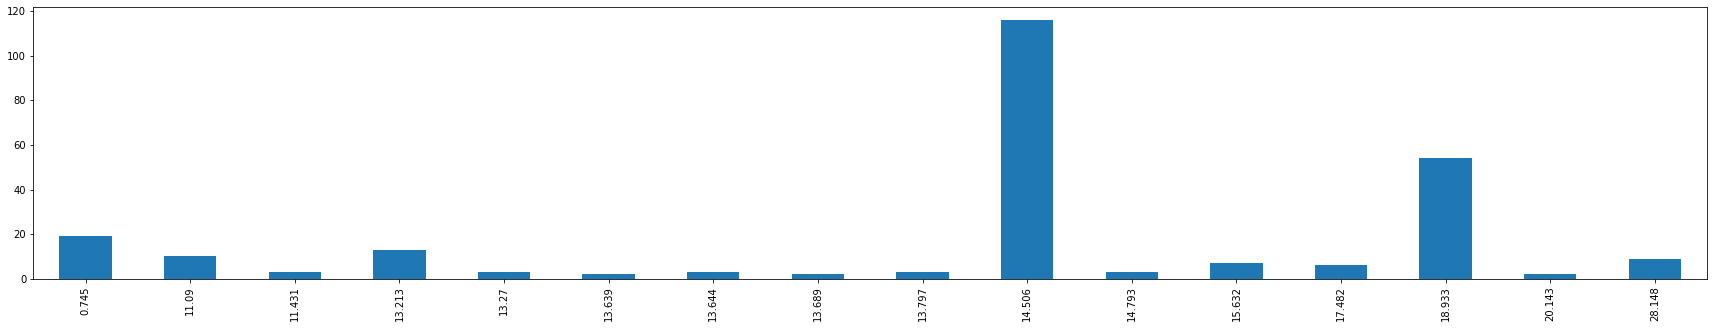

In [53]:
feat_groupedby_missing_pct = get_missing_cols(azdias).round(3).value_counts()#.sort_values()#.plot(kind='bar',figsize = (30,5))
feat_groupedby_missing_pct[feat_groupedby_missing_pct>1].sort_index().plot(kind='bar',figsize = (30,5)

groups of features have similar amount of missing values this means that features are MNAR (missing not at random) so we have to take care when imputing, considering this is demographic data i would ove rule possibility that mising data does not contain some kind of underlying representation of an individual, hence i will try to retain as much of the data as possible

In [54]:
missing_cols = get_missing_cols(azdias,True)


ALTER_KIND4                    99.866928
TITEL_KZ                       99.587025
ALTER_KIND3                    99.312477
ALTER_KIND2                    96.804888
ALTER_KIND1                    91.427988
AGER_TYP                       71.071123
EXTSEL992                      68.284646
D19_KK_KUNDENTYP               64.324164
KBA05_BAUMAX                   54.120751
ALTERSKATEGORIE_FEIN           29.069799
D19_KONSUMTYP                  28.148269
D19_LOTTO_RZ                   28.148269
D19_SOZIALES                   28.148269
D19_TELKO_ONLINE_QUOTE_12      28.148269
D19_VERSAND_ONLINE_QUOTE_12    28.148269
D19_VERSI_ONLINE_QUOTE_12      28.148269
D19_GESAMT_ONLINE_QUOTE_12     28.148269
D19_BANKEN_ONLINE_QUOTE_12     28.148269
D19_LETZTER_KAUF_BRANCHE       28.148269
REGIOTYP                       20.143452
KKK                            20.143452
KBA05_AUTOQUOT                 18.933799
KBA05_VORB0                    18.933245
KBA05_MAXHERST                 18.933245
KBA05_MAXSEG    

279


In [55]:
lookUpAttr(azdias,missing_cols.index.tolist())

****************************************************************************************************
ALTER_KIND4

Feature info does not EXIST in data dictionary
Column Summary
Value Counts Percentage
7.0      0.000092
8.0      0.001570
9.0      0.001385
10.0     0.004248
11.0     0.004894
12.0     0.006926
13.0     0.013390
14.0     0.014868
15.0     0.018931
16.0     0.016899
17.0     0.025026
18.0     0.024841
NaN     99.866928
Name: ALTER_KIND4, dtype: float64

Unique Values:
13

****************************************************************************************************
TITEL_KZ

Description:
 flag whether this person holds an academic title
Mapping:
 {'-1, 0': 'unknown', 1: 'Dr.', 2: 'Dr. Dr.', 3: 'Prof.', 4: 'Prof. Dr.', 5: 'other'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1.0     0.366063
2.0     0.000277
3.0     0.014776
4.0     0.016807
5.0     0.015053
NaN    99.587025
Name: TITEL_KZ, dtype: float64

Unique Values:
6
***

Value Counts Percentage
0.0     44.322280
1.0      0.138151
2.0      0.163177
3.0      0.490362
4.0      0.144061
5.0      1.341524
6.0      0.216554
7.0      0.860212
8.0      1.121461
9.0      0.697035
10.0    22.356915
NaN     28.148269
Name: D19_GESAMT_ONLINE_QUOTE_12, dtype: float64

Unique Values:
12
****************************************************************************************************
D19_BANKEN_ONLINE_QUOTE_12

Description:
 amount of online transactions within all transactions in the segment bank 
Mapping:
 {0: 'no Online-transactions within the last 12 months', 1: '10% Online-transactions within the last 12 months', 2: '20% Online-transactions within the last 12 months', 3: '30% Online-transactions within the last 12 months', 4: '40% Online-transactions within the last 12 months', 5: '50% Online-transactions within the last 12 months', 6: '60% Online-transactions within the last 12 months', 7: '70% Online-transactions within the last 12 months', 8: '80% Online-t

Value Counts Percentage
0.0    38.953414
1.0    20.958321
2.0    15.745060
3.0     5.409960
NaN    18.933245
Name: KBA05_SEG7, dtype: float64

Unique Values:
5
****************************************************************************************************
KBA05_SEG8

Description:
 share of roadster and convertables in the microcell
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'low', 2: 'average', 3: 'high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
0.0    42.353443
1.0    19.934748
2.0    13.723678
3.0     5.054886
NaN    18.933245
Name: KBA05_SEG8, dtype: float64

Unique Values:
5
****************************************************************************************************
KBA05_SEG9

Description:
 share of vans in the microcell
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'low', 2: 'average', 3: 'high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
0.0    26.9

 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0     8.856902
2.0    18.144602
3.0    30.231431
4.0    16.920174
5.0     6.913645
NaN    18.933245
Name: KBA05_KW1, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_ZUL2

Description:
 share of cars built between 1994 and 2000
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0     6.651380
2.0    18.061398
3.0    31.993225
4.0    17.611853
5.0     6.748899
NaN    18.933245
Name: KBA05_ZUL2, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_ZUL4

Description:
 share of cars built from 2003 on
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very hig

Value Counts Percentage
1.0     4.259225
2.0    18.526642
3.0    39.750552
4.0    17.500760
5.0     5.456873
NaN    14.505949
Name: KBA13_CCM_1600, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_BMW

Description:
 share of BMW within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     3.872476
2.0    14.289026
3.0    37.496271
4.0    20.053875
5.0     9.782403
NaN    14.505949
Name: KBA13_BMW, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_BJ_2009

Description:
 share of cars built in 2009 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8'

Value Counts Percentage
1.0     4.196983
2.0    15.785692
3.0    37.547616
4.0    19.261631
5.0     8.702129
NaN    14.505949
Name: KBA13_FIAT, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_BJ_2004

Description:
 share of cars built before 2004 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     5.222958
2.0    17.965911
3.0    39.924257
4.0    17.278203
5.0     5.102722
NaN    14.505949
Name: KBA13_BJ_2004, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_ALTERHALTER_30

Description:
 share of car owners below 31 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Not

Value Counts Percentage
1.0     9.767904
2.0    20.398606
3.0    35.171992
4.0    14.478983
5.0     5.676566
NaN    14.505949
Name: KBA13_ALTERHALTER_60, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_ALTERHALTER_61

Description:
 share of car owners elder than 61 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     6.095821
2.0    14.813649
3.0    35.180765
4.0    19.584937
5.0     9.818880
NaN    14.505949
Name: KBA13_ALTERHALTER_61, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_ANTG1

Feature info does not EXIST in data dictionary
Column Summary
Value Counts Percentage
0.0     0.788643
1.0    20.307460
2.0    32.954926
3.0    24.790257
4.0  

Name: KBA13_KW_70, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_KW_61_120

Description:
 share of cars with an engine power between 61 and 120 KW - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     5.136613
2.0    17.583225
3.0    39.499554
4.0    17.869224
5.0     5.405435
NaN    14.505949
Name: KBA13_KW_61_120, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_KW_60

Description:
 share of cars with an engine power between 51 and 60 KW - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
0.0    14.493205
1.0   

Value Counts Percentage
1.0     7.228733
2.0    19.374848
3.0    37.972782
4.0    14.947182
5.0     5.970506
NaN    14.505949
Name: KBA13_SEG_KOMPAKTKLASSE, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SEG_KLEINWAGEN

Description:
 share of small and very small cars (Ford Fiesta, Ford Ka etc.) in the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     7.769332
2.0    18.707272
3.0    37.363292
4.0    16.108814
5.0     5.545341
NaN    14.505949
Name: KBA13_SEG_KLEINWAGEN, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SEG_KLEINST

Description:
 share of very small cars (Ford Ka etc.) in the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low

Value Counts Percentage
1.0     7.232704
2.0    17.099882
3.0    34.987575
4.0    17.631246
5.0     8.542645
NaN    14.505949
Name: KBA13_HALTER_45, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_HALTER_50

Description:
 share of car owners between 46 and 50 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     9.468885
2.0    19.974919
3.0    35.490588
4.0    14.729243
5.0     5.830416
NaN    14.505949
Name: KBA13_HALTER_50, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_HALTER_55

Description:
 share of car owners between 51 and 55 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very hi

Value Counts Percentage
1.0     7.205369
2.0    19.050988
3.0    38.522338
4.0    16.325830
5.0     4.389527
NaN    14.505949
Name: KBA13_KMH_180, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_KMH_210

Feature info does not EXIST in data dictionary
Column Summary
Value Counts Percentage
1.0     4.455924
2.0    17.141345
3.0    39.471295
4.0    18.302608
5.0     6.122879
NaN    14.505949
Name: KBA13_KMH_210, dtype: float64

Unique Values:
6

****************************************************************************************************
KBA13_KMH_211

Description:
 share of cars with a greater max speed than 210 km/h within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
0.0    14.726565
1.0     4.497757
2.0    17.101728
3.0    30.402642
4.0 

Value Counts Percentage
1A      1.389637
1B      0.482790
1C      0.602379
1D      1.642760
1E      0.775899
2A      1.566573
2B      1.751914
2C      2.262315
2D      4.274001
3A      1.149442
3B      0.824935
3C      3.822886
3D      3.914771
4A      3.755011
4B      1.028745
4C      5.251955
4D      0.987558
4E      0.610229
5A      1.309757
5B      1.112781
5C      1.062821
5D      1.799749
5E      0.406604
5F      0.493317
6A      0.699251
6B      6.123156
6C      1.630108
6D      0.674871
6E      1.772415
6F      0.605796
7A      3.556096
7B      2.578696
7C      0.947387
7D      0.566364
7E      0.523330
8A      5.235148
8B      3.437522
8C      3.120772
8D      1.826807
9A      1.991462
9B      2.640476
9C      2.398619
9D      2.821199
9E      0.728340
XX      0.046081
NaN    13.797278
Name: CAMEO_DEU_2015, dtype: float64

Unique Values:
46
****************************************************************************************************
CAMEO_DEUG_2015

Description:
 CAMEO 

Value Counts Percentage
0.0     0.005356
1.0     4.249806
2.0     7.002668
3.0     9.196646
4.0    12.747755
5.0    16.330355
6.0     8.260525
7.0    11.287473
8.0     7.740243
9.0     9.540269
NaN    13.638903
Name: ORTSGR_KLS9, dtype: float64

Unique Values:
11
****************************************************************************************************
ARBEIT

Description:
 share of unemployed person in the community
Mapping:
 {}
Additional Notes:
 [nan]
Info level:
 ['Community']

Column Summary
Value Counts Percentage
1.0     6.806708
2.0    15.606262
3.0    28.248280
4.0    32.222985
5.0     3.460055
9.0     0.016807
NaN    13.638903
Name: ARBEIT, dtype: float64

Unique Values:
7
****************************************************************************************************
INNENSTADT

Description:
 distance to the city centre
Mapping:
 {-1: 'unknown', 1: 'city centre', 2: 'distance to the city centre 3 km', 3: 'distance to the city centre 3-5 km', 4: 'distance to the

Value Counts Percentage
0.0     23.910375
1.0      0.000092
2.0      0.005541
3.0      0.019855
4.0      0.060487
5.0      0.116172
6.0      0.522407
7.0      1.267554
8.0      1.992293
9.0      3.305374
10.0     4.147024
11.0     3.410649
12.0     3.943399
13.0     4.042579
14.0     4.660473
15.0     5.504247
16.0     5.528626
17.0     5.817580
18.0     6.215133
19.0     5.450870
20.0     4.361084
21.0     4.627782
NaN     11.090405
Name: ALTER_HH, dtype: float64

Unique Values:
23
****************************************************************************************************
SOHO_FLAG

Description:
 small office/home office flag
Mapping:
 {-1: 'unknown', 0: 'no small office/home office', 1: 'small office/home office'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0.0    88.141361
1.0     0.768234
NaN    11.090405
Name: SOHO_FLAG, dtype: float64

Unique Values:
3
***************************************************************************

Value Counts Percentage
1.0    19.177965
2.0    16.322505
3.0    19.283425
4.0    24.486620
5.0    19.984523
NaN     0.744963
Name: RT_KEIN_ANREIZ, dtype: float64

Unique Values:
6
****************************************************************************************************
RT_SCHNAEPPCHEN

Description:
 bargains
Mapping:
 {}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
1.0     5.217232
2.0    11.463209
3.0    13.497982
4.0    18.952084
5.0    50.124530
NaN     0.744963
Name: RT_SCHNAEPPCHEN, dtype: float64

Unique Values:
6
****************************************************************************************************
LP_FAMILIE_GROB

Description:
 familytyp rough
Mapping:
 {1: 'single ', 2: 'couple', 3: 'single parent', 4: 'single parent', 5: 'single parent', 6: 'family', 7: 'family', 8: 'family', 9: 'multiperson household', 10: 'multiperson household', 11: 'multiperson household'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column S

In [56]:
missmatched = get_mismatched_mappings(azdias,dias_attr_mapping)
missmatched # columns that have a value that doesnot appear in the mapping
# some columns that appear here appear so as we have added documentation for them but not a mapping

['ALTERSKATEGORIE_FEIN',
 'ARBEIT',
 'CAMEO_DEU_2015',
 'CJT_KATALOGNUTZER',
 'D19_LETZTER_KAUF_BRANCHE',
 'EINGEFUEGT_AM',
 'GEMEINDETYP',
 'KONSUMZELLE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'RT_KEIN_ANREIZ',
 'RT_SCHNAEPPCHEN']

In [57]:
lookUpAttr(azdias,missmatched)

****************************************************************************************************
ALTERSKATEGORIE_FEIN

Description:
 age through prename analysis fine
Mapping:
 {}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
0.0      4.821156
1.0      0.000092
2.0      0.007018
3.0      0.021240
4.0      0.065105
5.0      0.118758
6.0      0.565994
7.0      1.455665
8.0      2.427986
9.0      4.240294
10.0     5.078250
11.0     4.300504
12.0     5.162840
13.0     5.650247
14.0     6.512860
15.0     6.612225
16.0     5.343286
17.0     4.847198
18.0     4.882844
19.0     3.981446
20.0     2.612218
21.0     1.281683
22.0     0.345378
23.0     0.264297
24.0     0.228282
25.0     0.103336
NaN     29.069799
Name: ALTERSKATEGORIE_FEIN, dtype: float64

Unique Values:
27
****************************************************************************************************
ARBEIT

Description:
 share of unemployed person in the community
Mapping:
 {}
Additional

In [58]:
# these features have no mapping for the values that seemingly represent an unknow class
azdias.ARBEIT = azdias.ARBEIT.replace(9,np.nan)
azdias[['LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB']] = azdias[['LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB']].replace(0,np.nan)

Interesting to note , I see many ANZ columns being numerical initially I thought it was something to do with 'AZ' diaz however looking up number of in german I found that number of->Anzahl von  so thats wheree ANZ comes from and ALTER is AGE seeing as theres only provided 4 places for age of kids lets see how correlated this is with ANZ_KINDER , my theory is that there should be an negative correlation somewhat between the amount of missing values in the age columns with the number of kids 

In [59]:
missing_kids_age = azdias[['ALTER_KIND1','ALTER_KIND2','ALTER_KIND3','ALTER_KIND4' ]].isna().sum(axis=1) 
mising_kids_df = pd.DataFrame({'NumKids':azdias.ANZ_KINDER, 'numMissingKidsAge':missing_kids_age})
mising_kids_df.corr()

NumKids  numMissingKidsAge
NumKids            1.000000          -0.977625
numMissingKidsAge -0.977625           1.000000

My theroy was correct so missing values from ALTER_KIND columns in geenral simply represent a lack of children and not necceserily missing values

In [60]:
# just wanted to see if there are places where we have recorded kids more than 0 or 1 with ages missing signifying that we know the number of kids but not the ages
mising_kids_df.loc[ (mising_kids_df.NumKids > 0) & (mising_kids_df.numMissingKidsAge == 4) , 'NumKids'].value_counts()

1.0    6312
2.0     106
3.0       5
4.0       3
6.0       1
5.0       1
Name: NumKids, dtype: int64

So missing columns here is not so much unknown missing or corrupt data but rather just representing no kids or unwillingness to disclose kids age ?

In [61]:
azdias.drop(['ALTER_KIND1','ALTER_KIND2','ALTER_KIND3','ALTER_KIND4' ],axis=1,inplace=True)

There are many KBA features lets take a look at them

In [62]:
kba13 = list(filter(lambda x:'KBA13' in x,azdias.columns))
azdias[kba13].isna().sum()/len(azdias)

KBA13_ALTERHALTER_30           0.145059
KBA13_ALTERHALTER_45           0.145059
KBA13_ALTERHALTER_60           0.145059
KBA13_ALTERHALTER_61           0.145059
KBA13_ANTG1                    0.145059
KBA13_ANTG2                    0.145059
KBA13_ANTG3                    0.145059
KBA13_ANTG4                    0.145059
KBA13_ANZAHL_PKW               0.145059
KBA13_AUDI                     0.145059
KBA13_AUTOQUOTE                0.145059
KBA13_BAUMAX                   0.145059
KBA13_BJ_1999                  0.145059
KBA13_BJ_2000                  0.145059
KBA13_BJ_2004                  0.145059
KBA13_BJ_2006                  0.145059
KBA13_BJ_2008                  0.145059
KBA13_BJ_2009                  0.145059
KBA13_BMW                      0.145059
KBA13_CCM_0_1400               0.145059
KBA13_CCM_1000                 0.145059
KBA13_CCM_1200                 0.145059
KBA13_CCM_1400                 0.145059
KBA13_CCM_1400_2500            0.145059
KBA13_CCM_1500                 0.145059


In [63]:
lookUpAttr(azdias,kba13)

****************************************************************************************************
KBA13_ALTERHALTER_30

Description:
 share of car owners below 31 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     8.565455
2.0    18.312858
3.0    36.578343
4.0    15.026139
5.0     7.011256
NaN    14.505949
Name: KBA13_ALTERHALTER_30, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_ALTERHALTER_45

Description:
 share of car owners between 31 and 45 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     7.578359
2.0    16.553926
3.0    33.578638
4.0    17.695519
5.0    10.087610

Value Counts Percentage
1.0     5.222958
2.0    17.965911
3.0    39.924257
4.0    17.278203
5.0     5.102722
NaN    14.505949
Name: KBA13_BJ_2004, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_BJ_2006

Description:
 share of cars built between 2005 and 2006 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     5.318260
2.0    17.728672
3.0    39.131828
4.0    17.925001
5.0     5.390290
NaN    14.505949
Name: KBA13_BJ_2006, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_BJ_2008

Description:
 share of cars built in 2008 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additiona

****************************************************************************************************
KBA13_HALTER_65

Description:
 share of car owners between 61 and 65 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     5.273010
2.0    14.696091
3.0    36.318940
4.0    19.608024
5.0     9.597986
NaN    14.505949
Name: KBA13_HALTER_65, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_HALTER_66

Description:
 share of car owners over 66 within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     6.584336
2.0    15.083394
3.0    34.868262
4.0    19.236235
5.0     9.721823
NaN    14.50594

Value Counts Percentage
0.0    14.764520
1.0     4.507454
2.0    17.037178
3.0    30.507086
4.0     9.852033
5.0     8.825781
NaN    14.505949
Name: KBA13_KMH_250, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_KMH_251

Description:
 share of cars with a greater max speed than 250 km/h within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0    72.958232
2.0     1.145656
3.0    11.390163
NaN    14.505949
Name: KBA13_KMH_251, dtype: float64

Unique Values:
4
****************************************************************************************************
KBA13_KRSAQUOT

Description:
 share of cars per household (referred to the county average) - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 've

Value Counts Percentage
0.0    15.922366
1.0     5.446345
2.0    20.141974
3.0    29.587403
4.0     8.564993
5.0     5.830970
NaN    14.505949
Name: KBA13_KW_50, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_KW_60

Description:
 share of cars with an engine power between 51 and 60 KW - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
0.0    14.493205
1.0     8.879527
2.0    19.704804
3.0    28.891107
4.0     8.329693
5.0     5.195715
NaN    14.505949
Name: KBA13_KW_60, dtype: float64

Unique Values:
7
****************************************************************************************************
KBA13_KW_61_120

Description:
 share of cars with an engine power between 61 and 120 KW - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'l

Value Counts Percentage
1.0     7.769332
2.0    18.707272
3.0    37.363292
4.0    16.108814
5.0     5.545341
NaN    14.505949
Name: KBA13_SEG_KLEINWAGEN, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SEG_KOMPAKTKLASSE

Description:
 share of lowe midclass cars (Ford Focus etc.) in the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     7.228733
2.0    19.374848
3.0    37.972782
4.0    14.947182
5.0     5.970506
NaN    14.505949
Name: KBA13_SEG_KOMPAKTKLASSE, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_SEG_MINIVANS

Description:
 share of minivans within the PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 

Value Counts Percentage
1.0     3.602916
2.0    15.905559
3.0    37.923376
4.0    19.617259
5.0     8.444942
NaN    14.505949
Name: KBA13_VORB_0, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_VORB_1

Description:
 share of cars with 1 preowner - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['PLZ8']

Column Summary
Value Counts Percentage
1.0     5.339407
2.0    17.977454
3.0    39.531875
4.0    17.426143
5.0     5.219172
NaN    14.505949
Name: KBA13_VORB_1, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA13_VORB_1_2

Description:
 share of cars with 1 or 2 preowner - PLZ8
Mapping:
 {-1: 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info leve

In [64]:
kba05 = list(filter(lambda x:'KBA05' in x,azdias.columns))
azdias[kba05].isna().sum()/len(azdias)#.value_counts().sort_index().plot(kind='bar')

KBA05_ALTER1       0.189332
KBA05_ALTER2       0.189332
KBA05_ALTER3       0.189332
KBA05_ALTER4       0.189332
KBA05_ANHANG       0.188436
KBA05_ANTG1        0.174816
KBA05_ANTG2        0.174816
KBA05_ANTG3        0.174816
KBA05_ANTG4        0.174816
KBA05_AUTOQUOT     0.189338
KBA05_BAUMAX       0.541208
KBA05_CCM1         0.189332
KBA05_CCM2         0.189332
KBA05_CCM3         0.189332
KBA05_CCM4         0.189332
KBA05_DIESEL       0.189332
KBA05_FRAU         0.189332
KBA05_GBZ          0.174818
KBA05_HERST1       0.189332
KBA05_HERST2       0.189332
KBA05_HERST3       0.189332
KBA05_HERST4       0.189332
KBA05_HERST5       0.189332
KBA05_HERSTTEMP    0.148914
KBA05_KRSAQUOT     0.189332
KBA05_KRSHERST1    0.189332
KBA05_KRSHERST2    0.189332
KBA05_KRSHERST3    0.189332
KBA05_KRSKLEIN     0.189332
KBA05_KRSOBER      0.189332
KBA05_KRSVAN       0.189332
KBA05_KRSZUL       0.189332
KBA05_KW1          0.189332
KBA05_KW2          0.189332
KBA05_KW3          0.189332
KBA05_MAXAH        0

In [65]:
lookUpAttr(azdias,kba05)

****************************************************************************************************
KBA05_ALTER1

Description:
 share of car owners less than 31 years old
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'low', 2: 'average', 3: 'high', 4: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
0.0    11.609949
1.0    19.510875
2.0    25.138220
3.0    17.165263
4.0     7.642447
NaN    18.933245
Name: KBA05_ALTER1, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_ALTER2

Description:
 share of car owners inbetween 31 and 45 years of age
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0     6.641499
2.0    18.890212
3.0    31.466756
4.0    16.751918
5.0     7.316370
NaN    18.9332

Value Counts Percentage
0.0    28.303504
1.0    23.950823
2.0    14.442229
3.0     8.938814
4.0     5.431385
NaN    18.933245
Name: KBA05_CCM4, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_DIESEL

Description:
 share of cars with Diesel-engine in the microcell
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
0.0     6.434365
1.0    16.617461
2.0    32.568732
3.0    18.343702
4.0     7.102495
NaN    18.933245
Name: KBA05_DIESEL, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_FRAU

Description:
 share of female car owners
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Micro

Value Counts Percentage
1.0    15.957919
2.0    50.801063
3.0    14.307772
NaN    18.933245
Name: KBA05_KRSOBER, dtype: float64

Unique Values:
4
****************************************************************************************************
KBA05_KRSVAN

Description:
 share of vans (referred to the county average)
Mapping:
 {'-1, 9': 'unknown', 1: 'below average', 2: 'average', 3: 'above average'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0    13.625143
2.0    53.733817
3.0    13.707794
NaN    18.933245
Name: KBA05_KRSVAN, dtype: float64

Unique Values:
4
****************************************************************************************************
KBA05_KRSZUL

Description:
 share of newbuilt cars (referred to the county average)
Mapping:
 {'-1, 9': 'unknown', 1: 'below average', 2: 'average', 3: 'above average'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage


Value Counts Percentage
1.0    10.574832
2.0    18.143310
3.0    26.839251
4.0    18.709766
5.0     6.799597
NaN    18.933245
Name: KBA05_VORB0, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_VORB1

Description:
 share of cars with one or two preowner
Mapping:
 {'-1, 9': 'unknown', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]
Info level:
 ['Microcell (RR3_ID)']

Column Summary
Value Counts Percentage
1.0     6.907274
2.0    16.802155
3.0    34.212415
4.0    16.224987
5.0     6.919925
NaN    18.933245
Name: KBA05_VORB1, dtype: float64

Unique Values:
6
****************************************************************************************************
KBA05_VORB2

Description:
 share of cars with more than two preowner
Mapping:
 {'-1, 9': 'unknown', 0: 'none', 1: 'very low', 2: 'low', 3: 'average', 4: 'high', 5: 'very high'}
Additional Notes:
 [nan]


In [66]:
# drop plz 8 features in favor of microcell features seems to be many features explaining the same thing
plz8_cols = list(set(attr_by_info_lvl['PLZ8']).intersection(set(azdias.columns))) 
azdias.drop( plz8_cols  ,axis=1,inplace =True)
kba13_remaining = list(filter(lambda x:'KBA13' in x,azdias.columns))
azdias.drop( kba13_remaining  ,axis=1,inplace =True)



# will also drop kba05 features as there seems to me alot of redundent and noisy information as well as many unknown values
kba05_cols = list(set(attr_by_info_lvl['Microcell (RR3_ID)']).intersection(set(azdias.columns))) 
azdias.drop( kba05_cols  ,axis=1,inplace =True)

In [67]:
# will drop all undocumented columns, we may loose predictability however we will not loose explainability, and trying to fill nans in undocumented columns may also introduce unwanted bias in 
# the model, better to be more explainable and a little less predictable than very predictable and not very explainable after all the value for this part is from the insights we can extract and explain
undoc_cols = set(azdias.columns) - set(cleaned_mapping_df.Attribute)
undoc_cols.remove('customer_identifier')
undoc_cols.remove('ANZ_STATISTISCHE_HAUSHALTE')
azdias.drop( undoc_cols  ,axis=1,inplace =True)

Visualize missing values **which info level has most missing values?** info level is a kind of a natural grouping so would like to look at things grouped as such as it might shed some light on patterns present in the way values are missing

In [68]:
def plot_missing_bylvl(df):
    missing_by_info_lvl_dict = dict()

    for info_lvl in attr_by_info_lvl.keys():
        info_levl_columns = list(set(attr_by_info_lvl[info_lvl]).intersection(set(df.columns)))
        missing_by_info_lvl_dict[info_lvl] = df[info_levl_columns].isna().sum().sum()

    missing_by_info_lvl = pd.Series(missing_by_info_lvl_dict)
    missing_by_info_lvl[missing_by_info_lvl>0].plot(kind='bar',figsize = (30,10),title = 'Missing values by info level')
    missing_by_info_lvl_list = missing_by_info_lvl[missing_by_info_lvl>0].index.tolist()

    fig,ax = plt.subplots(nrows =4 , ncols = 2 , sharex=True)
    plt.tight_layout()
    for info_lvl,axes in zip( missing_by_info_lvl_list, ax.ravel()):
        
        cols_in_df = set(attr_by_info_lvl[info_lvl]).intersection(azdias.columns)
        cols_mising = azdias[cols_in_df].isna().sum()
        
        cols_mising[cols_mising>0].plot(kind = 'barh' , ax = axes ,figsize=(30,20) , title = info_lvl)
        
        
def plot_missing_by_percentage(df,axis = 0,title = ''):
    (df.isna().sum(axis=axis)/len(df.columns) * 100).round().value_counts(normalize=True).sort_index()[1:].plot(kind='bar', figsize = (15,5),title = title )
    
    


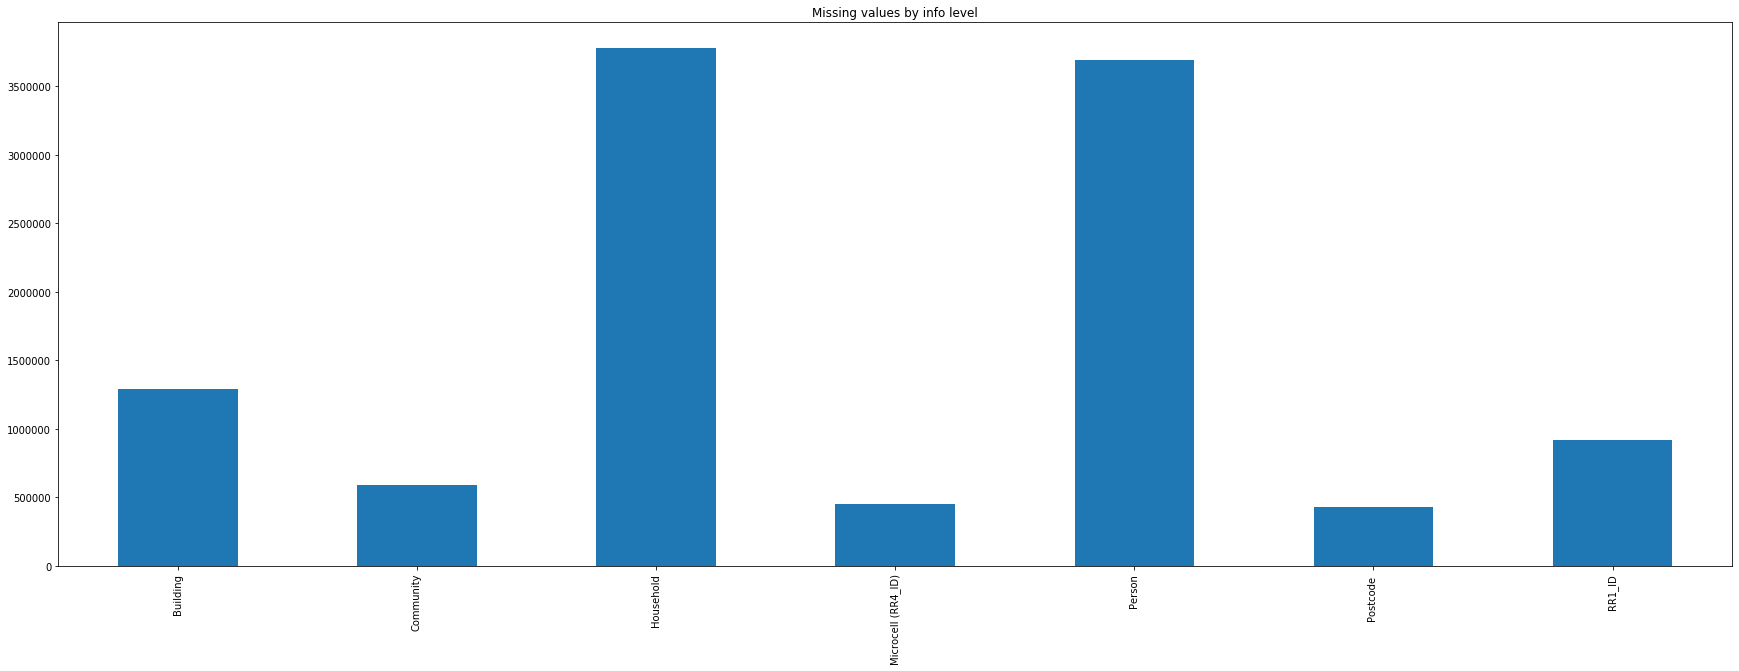

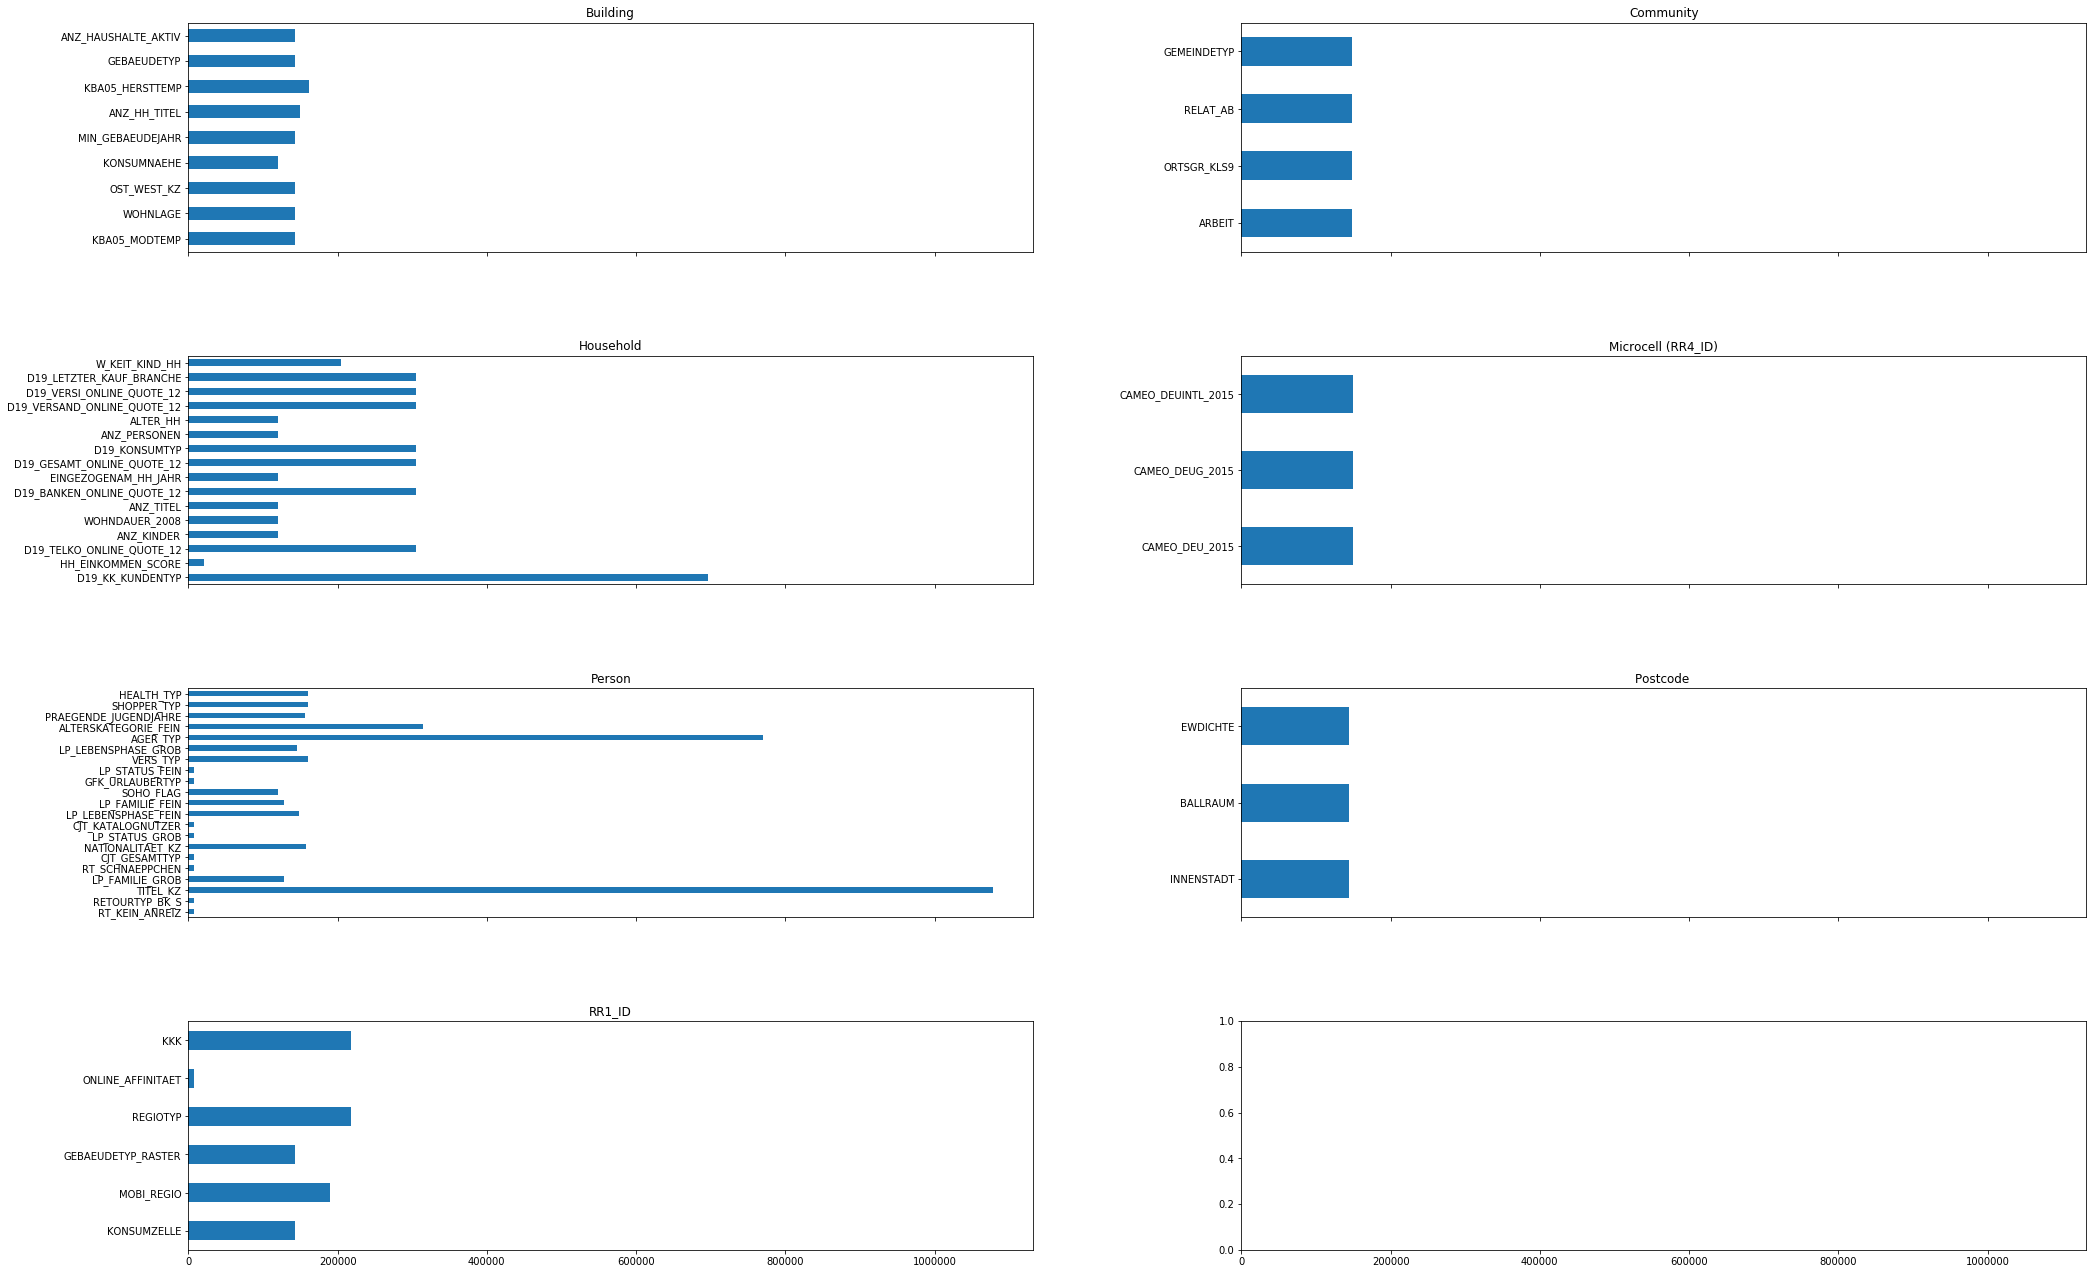

In [69]:
plot_missing_bylvl(azdias)

### Rows

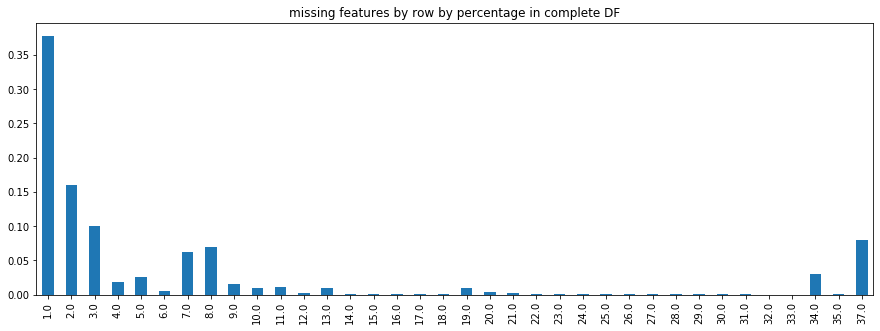

In [70]:
plot_missing_by_percentage(azdias,1,'missing features by row by percentage in complete DF')

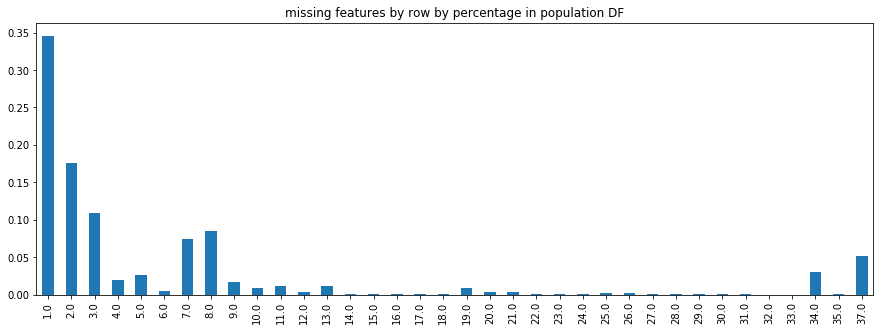

In [71]:
plot_missing_by_percentage(azdias.loc[azdias.customer_identifier == 0] , 1, 'missing features by row by percentage in population DF')

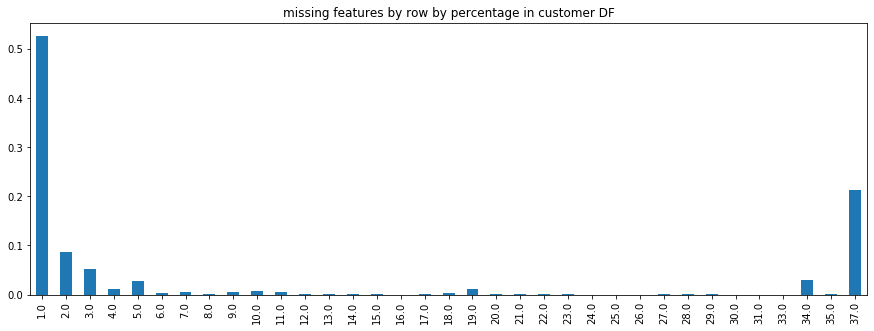

In [72]:
plot_missing_by_percentage(azdias.loc[azdias.customer_identifier == 1] , 1, 'missing features by row by percentage in customer DF')

Will not drop any data as i have mentioned above, it is possible that the missingness of the data carries some information that can define a specific class of person , especially since we see from the row analysis that between the customer and population DF there seems to be similarities in the missing/unknown values 

In [73]:
azdias.shape

(1082873, 150)



# Fill Missing Values

In [74]:
azdias = fill_nan_to_unknowns(azdias,cleaned_mapping_df)

In [75]:
missing_vals_azdias = get_missing_cols(azdias,True)


ALTERSKATEGORIE_FEIN           29.069799
D19_TELKO_ONLINE_QUOTE_12      28.148269
D19_LOTTO_RZ                   28.148269
D19_GESAMT_ONLINE_QUOTE_12     28.148269
D19_KONSUMTYP                  28.148269
D19_BANKEN_ONLINE_QUOTE_12     28.148269
D19_LETZTER_KAUF_BRANCHE       28.148269
D19_VERSI_ONLINE_QUOTE_12      28.148269
D19_VERSAND_ONLINE_QUOTE_12    28.148269
MOBI_REGIO                     17.481644
CAMEO_DEU_2015                 13.797278
ANZ_HH_TITEL                   13.770590
LP_LEBENSPHASE_FEIN            13.730604
ARBEIT                         13.655710
GEMEINDETYP                    13.644259
LP_LEBENSPHASE_GROB            13.437679
GEBAEUDETYP_RASTER             13.213184
KONSUMZELLE                    13.213184
ANZ_STATISTISCHE_HAUSHALTE     13.212537
EINGEFUEGT_AM                  13.212537
ANZ_HAUSHALTE_AKTIV            13.212537
MIN_GEBAEUDEJAHR               13.212537
LP_FAMILIE_GROB                11.854945
LP_FAMILIE_FEIN                11.854945
KONSUMNAEHE     

37


In [76]:
lookUpAttr(azdias,missing_vals_azdias.index.tolist())

****************************************************************************************************
ALTERSKATEGORIE_FEIN

Description:
 age through prename analysis fine
Mapping:
 {}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
0.0      4.821156
1.0      0.000092
2.0      0.007018
3.0      0.021240
4.0      0.065105
5.0      0.118758
6.0      0.565994
7.0      1.455665
8.0      2.427986
9.0      4.240294
10.0     5.078250
11.0     4.300504
12.0     5.162840
13.0     5.650247
14.0     6.512860
15.0     6.612225
16.0     5.343286
17.0     4.847198
18.0     4.882844
19.0     3.981446
20.0     2.612218
21.0     1.281683
22.0     0.345378
23.0     0.264297
24.0     0.228282
25.0     0.103336
NaN     29.069799
Name: ALTERSKATEGORIE_FEIN, dtype: float64

Unique Values:
27
****************************************************************************************************
D19_TELKO_ONLINE_QUOTE_12

Description:
 amount of online transactions within all transac

Value Counts Percentage
1.0    16.363599
2.0    14.728135
3.0    16.413282
4.0    17.301844
5.0    17.671878
6.0     0.039617
NaN    17.481644
Name: MOBI_REGIO, dtype: float64

Unique Values:
7
****************************************************************************************************
CAMEO_DEU_2015

Description:
 CAMEO classification 2015 - detailled classification
Mapping:
 {'1A': 'Work-Life-Balance', '1B': 'Wealthy Best Ager', '1C': 'Successful Songwriter', '1D': 'Old Nobility', '1E': 'City Nobility', '2A': 'Cottage Chic', '2B': 'Noble Jogger', '2C': 'Established gourmet', '2D': 'Fine Management', '3A': 'Career & Family', '3B': 'Powershopping Families', '3C': 'Rural Neighborhood', '3D': 'Secure Retirement', '4A': 'Family Starter', '4B': 'Family Life', '4C': 'String Trimmer', '4D': 'Empty Nest', '4E': 'Golden Ager', '5A': 'Younger Employees', '5B': 'Suddenly Family', '5C': 'Family First', '5D': 'Stock Market Junkies', '5E': 'Coffee Rider', '5F': 'Active Retirement', '6A': 'J

Value Counts Percentage
1991-06-17 00:00:00     0.000092
1991-08-30 00:00:00     0.000185
1992-02-10 00:00:00    41.415937
1992-02-12 00:00:00    21.789259
1992-02-19 00:00:00     0.036015
                         ...    
2016-04-20 00:00:00     0.001478
2016-05-02 00:00:00     0.001385
2016-05-09 00:00:00     0.000092
2016-07-05 00:00:00     0.000092
NaN                    13.212537
Name: EINGEFUEGT_AM, Length: 5255, dtype: float64

Unique Values:
5255
****************************************************************************************************
ANZ_HAUSHALTE_AKTIV

Description:
 number of households in the building
Mapping:
 {'…': 'numeric value (typically coded from 1-10)'}
Additional Notes:
 [nan]
Info level:
 ['Building']

Column Summary
Value Counts Percentage
0.0       0.823088
1.0      24.812420
2.0      13.228790
3.0       6.496514
4.0       4.415107
5.0       3.827965
6.0       3.640870
7.0       3.478247
8.0       3.242485
9.0       2.901818
10.0      2.529475
11.0    

Value Counts Percentage
0.0     6.448217
1.0    16.177520
2.0    25.329840
3.0    17.756284
4.0    18.821044
5.0    14.722133
NaN     0.744963
Name: ONLINE_AFFINITAET, dtype: float64

Unique Values:
7
****************************************************************************************************
LP_STATUS_FEIN

Description:
 social status fine
Mapping:
 {1: 'typical low-income earners', 2: 'orientationseeking low-income earners', 3: 'aspiring low-income earners ', 4: 'villagers', 5: 'minimalistic high-income earners', 6: 'independant workers', 7: 'title holder-households', 8: 'new houseowners', 9: 'houseowners', 10: 'top earners '}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1.0     22.028991
2.0     11.048387
3.0      8.262188
4.0      7.694439
5.0     10.749645
6.0      3.455253
7.0      1.905394
8.0      1.897452
9.0     16.267282
10.0    15.946007
NaN      0.744963
Name: LP_STATUS_FEIN, dtype: float64

Unique Values:
11


In [77]:
cameo_columns = list(filter(lambda x:'CAMEO' in x , azdias.columns))
lookUpAttr(azdias,cameo_columns)

****************************************************************************************************
CAMEO_DEU_2015

Description:
 CAMEO classification 2015 - detailled classification
Mapping:
 {'1A': 'Work-Life-Balance', '1B': 'Wealthy Best Ager', '1C': 'Successful Songwriter', '1D': 'Old Nobility', '1E': 'City Nobility', '2A': 'Cottage Chic', '2B': 'Noble Jogger', '2C': 'Established gourmet', '2D': 'Fine Management', '3A': 'Career & Family', '3B': 'Powershopping Families', '3C': 'Rural Neighborhood', '3D': 'Secure Retirement', '4A': 'Family Starter', '4B': 'Family Life', '4C': 'String Trimmer', '4D': 'Empty Nest', '4E': 'Golden Ager', '5A': 'Younger Employees', '5B': 'Suddenly Family', '5C': 'Family First', '5D': 'Stock Market Junkies', '5E': 'Coffee Rider', '5F': 'Active Retirement', '6A': 'Jobstarter', '6B': 'Petty Bourgeois', '6C': 'Long-established', '6D': 'Sportgardener', '6E': 'Urban Parents', '6F': 'Frugal Aging', '7A': 'Journeymen', '7B': 'Mantaplatte', '7C': 'Factory Worker'

In [78]:
# SORT CAMEO COLUMNS OUT
azdias.drop(['CAMEO_DEU_2015'],axis =1,inplace =True) 
# redundant high cardinality column 

azdias.CAMEO_DEUG_2015.replace('X',-1,inplace= True)
azdias.CAMEO_DEUG_2015.fillna(-1,inplace= True)
azdias.CAMEO_DEUG_2015 = azdias.CAMEO_DEUG_2015.apply(lambda x: int(float(x)))


azdias.CAMEO_DEUINTL_2015.replace('XX',-1,inplace= True)
azdias.CAMEO_DEUINTL_2015.fillna(-1,inplace= True)
azdias.CAMEO_DEUINTL_2015 = azdias.CAMEO_DEUINTL_2015.apply(lambda x: int(float(x)))


Notes on columns with missing values

D19_LETZTER_KAUF_BRANCHE has a category D19_UNBEKANNT which is unknown in german
ALTERSKATEGORIE_FEIN has a cat mapping to 0 possible unknown cat can fill nans with 0 ?
ALTERSKATEGORIE_FEIN comparing to the ALTERSKATEGORIE_GROB we have a -1,0 unknown column from looking at the other FEIN GROB columns it seems reasonable to encode unknowns as 0 here,  ALTERSKATEGORIE_FEIN has more unknown values then ALTERSKATEGORIE_GROB so will drop the FEIN column. 

INTERESTING FIND!!!
given that LETZTER_KAUF_BRANCHE stands for last purchase branch which we have found to have an unknown column as well as the fact that the same missing values exist in all D19 columns we can 
assume that its all unknown so fill LETZTER_KAUF_BRANCHE nans with D19_UNBEKANNT and the rest of the D19 cols with 0 for no transactions

a value of 1 for KONSUMNAEHE signifys a consumtion cell, so i can fill the KONSUMZELLE flag with a 1 in those places

will look for intelligent ways to fill the missing values before imputation


possibly impute the rest of the values  


In [79]:
azdias.D19_LETZTER_KAUF_BRANCHE = azdias.D19_LETZTER_KAUF_BRANCHE.fillna('D19_UNBEKANNT')

cats = azdias.D19_LETZTER_KAUF_BRANCHE.value_counts().index.tolist()
mapper = {cat:cat_code for cat_code,cat in enumerate(cats)}
azdias.D19_LETZTER_KAUF_BRANCHE = azdias.D19_LETZTER_KAUF_BRANCHE.map(mapper)
update_feature('D19_LETZTER_KAUF_BRANCHE',mapping = {cat_code:cat for cat_code,cat in enumerate(cats)})

D19_columns = list(filter(lambda x:'D19' in x ,missing_vals_azdias.index.tolist()))
# D19_columns.remove('D19_KONSUMTYP')
azdias.D19_KONSUMTYP = azdias.D19_KONSUMTYP.fillna(9)
azdias[D19_columns] = azdias[D19_columns].fillna(0)

azdias.ANZ_KINDER = azdias.ANZ_KINDER.fillna(0)
# ARBEIT has unknown value of 9 
azdias.ARBEIT = azdias.ARBEIT.fillna(-1)
#  where KONSUMNAEHE tells us that that record is a consumtion cell we can fill consumption cell flag as 1
# from consumption cell 1: 'building is located in a 125 x 125m-grid cell (RA1), which is a consumption cell'
azdias.loc[azdias.KONSUMZELLE.isna() & (azdias.KONSUMNAEHE == 1), 'KONSUMZELLE' ] = 1
azdias.loc[azdias.KONSUMZELLE.isna() & (azdias.KONSUMNAEHE > 1), 'KONSUMZELLE' ] = 0

azdias.OST_WEST_KZ = azdias.OST_WEST_KZ.map({-1:-1,'W':1,'O':0})
update_feature('OST_WEST_KZ',mapping = {-1:'unknown',1:'West',0:'East'})


titel_mapping = {-1:'unknown', 1:'Dr' , 2:'Prof' , 3:'Other'  }
update_feature('TITEL_KZ',mapping = titel_mapping )
azdias.TITEL_KZ = azdias.TITEL_KZ.map({-1:-1, 1:1,2:1,3:2,4:2,5:3})




In [80]:
#  map categories to numbers

# droping these columns either due to high cardinality , other columns containing same or similar info that are more complete 
azdias.drop([values ],axis=1,inplace=True)
# will drop this in favor of ANZ_STATISTISCHE_HAUSHALTE as it seems more calculated and correct
azdias.drop(['ANZ_HAUSHALTE_AKTIV'],axis=1,inplace=True)

# bin feature into quantiles
series,_ = pd.qcut(azdias.ANZ_STATISTISCHE_HAUSHALTE,4,False,retbins=True)
anz_hh_map = {1:'1 household' , 2:'2 to 3 households' , 3:'4 to 8 households',4:'more than 8'}
azdias.ANZ_STATISTISCHE_HAUSHALTE = series.apply(lambda x:x+1)
add_feature('ANZ_STATISTISCHE_HAUSHALTE','statistical calculation of known households in building',anz_hh_map,'categorical','Household')

# bin feature into quantiles
series,_ = pd.qcut(azdias.ANZ_PERSONEN,3,False,retbins=True)
personen_map = {1:'1 person',2:'2 persons',3:'greater than 2 people'}
azdias.ANZ_PERSONEN = series.apply(lambda x:x+1)
update_feature('ANZ_PERSONEN',mapping =personen_map )

anz_hh_titel_func = lambda x: 0 if x==0 else 1 if x==1 else 2 if x==2 else 3 if x>2 else np.nan 
azdias.ANZ_HH_TITEL = azdias.ANZ_HH_TITEL.apply(anz_hh_titel_func)
update_feature('ANZ_HH_TITEL',mapping={0:'None/unknown',1:'1 person',2:'2 people',3:'greater than 3 people'})


ANZ_PERSONEN
0.09999999999999999


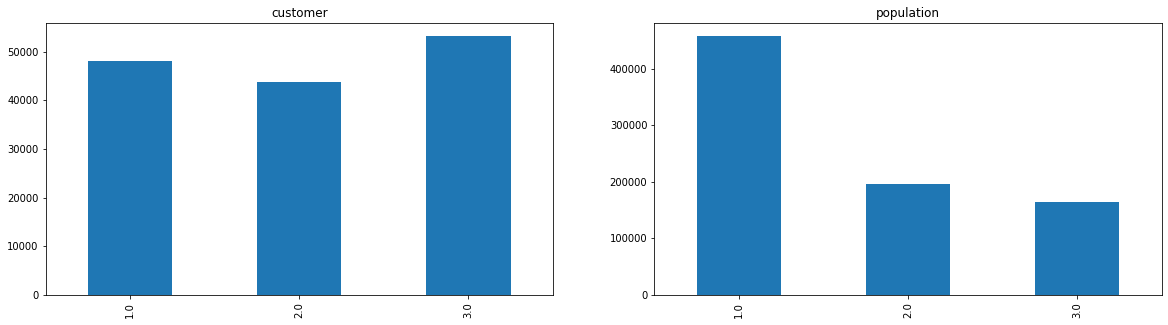

In [81]:
# interesting to note the effect of binning the feature
show_diff(azdias,'ANZ_PERSONEN')

ANZ_STATISTISCHE_HAUSHALTE
0.028571428571428577


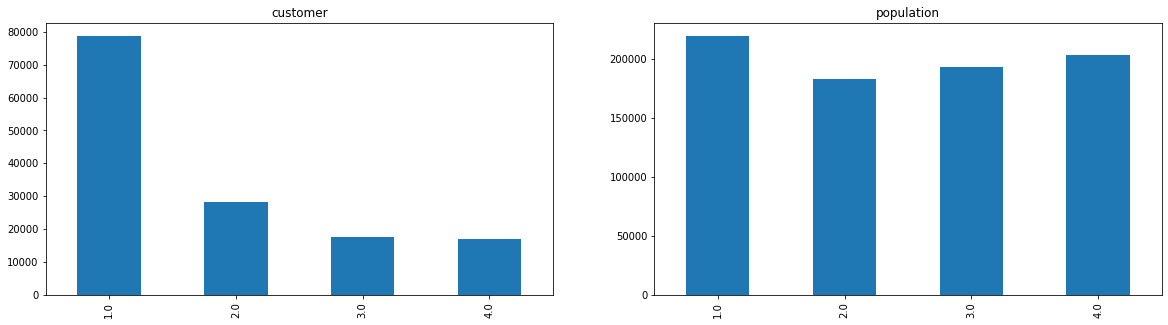

In [82]:
# interesting to note the effect of binning the feature
show_diff(azdias,'ANZ_STATISTISCHE_HAUSHALTE')

In [83]:
missing_vals_azdias = get_missing_cols(azdias,True)


MOBI_REGIO                    17.481644
ANZ_HH_TITEL                  13.770590
LP_LEBENSPHASE_FEIN           13.730604
GEMEINDETYP                   13.644259
LP_LEBENSPHASE_GROB           13.437679
GEBAEUDETYP_RASTER            13.213184
ANZ_STATISTISCHE_HAUSHALTE    13.212537
LP_FAMILIE_FEIN               11.854945
LP_FAMILIE_GROB               11.854945
KONSUMNAEHE                   11.138887
KONSUMZELLE                   11.132330
ALTER_HH                      11.090405
ANZ_TITEL                     11.090405
ANZ_PERSONEN                  11.090405
GFK_URLAUBERTYP                0.744963
RT_KEIN_ANREIZ                 0.744963
RT_SCHNAEPPCHEN                0.744963
ONLINE_AFFINITAET              0.744963
LP_STATUS_GROB                 0.744963
LP_STATUS_FEIN                 0.744963
CJT_KATALOGNUTZER              0.744963
dtype: float64

21


In [84]:
lookUpAttr(azdias,missing_vals_azdias.index.tolist())

****************************************************************************************************
MOBI_REGIO

Description:
 moving patterns
Mapping:
 {1: 'very high mobility', 2: 'high mobility', 3: 'middle mobility', 4: 'low mobility', 5: 'very low mobility ', 6: 'none'}
Additional Notes:
 [nan]
Info level:
 ['RR1_ID']

Column Summary
Value Counts Percentage
1.0    16.363599
2.0    14.728135
3.0    16.413282
4.0    17.301844
5.0    17.671878
6.0     0.039617
NaN    17.481644
Name: MOBI_REGIO, dtype: float64

Unique Values:
7
****************************************************************************************************
ANZ_HH_TITEL

Description:
 number of academic title holder in building
Mapping:
 {0: 'None/unknown', 1: '1 person', 2: '2 people', 3: 'greater than 3 people'}
Additional Notes:
 [nan]
Info level:
 ['Building']

Column Summary
Value Counts Percentage
0.0    83.453738
1.0     2.340348
2.0     0.269468
3.0     0.165855
NaN    13.770590
Name: ANZ_HH_TITEL, dtype: f

Value Counts Percentage
1.0     5.217232
2.0    11.463209
3.0    13.497982
4.0    18.952084
5.0    50.124530
NaN     0.744963
Name: RT_SCHNAEPPCHEN, dtype: float64

Unique Values:
6
****************************************************************************************************
ONLINE_AFFINITAET

Description:
 online affinity
Mapping:
 {0: 'none', 1: 'low', 2: 'middle', 3: 'high', 4: 'very high', 5: 'highest  '}
Additional Notes:
 [nan]
Info level:
 ['RR1_ID']

Column Summary
Value Counts Percentage
0.0     6.448217
1.0    16.177520
2.0    25.329840
3.0    17.756284
4.0    18.821044
5.0    14.722133
NaN     0.744963
Name: ONLINE_AFFINITAET, dtype: float64

Unique Values:
7
****************************************************************************************************
LP_STATUS_GROB

Description:
 social status rough
Mapping:
 {1: 'low-income earners', 2: 'low-income earners', 3: 'average earners', 4: 'average earners', 5: 'average earners', 6: 'independants', 7: 'independants'

In [85]:
high_card_cols = list()
for col in missing_vals_azdias.index:
    if getattr(azdias,col).nunique() > 10:
        high_card_cols.append(col)
        print(col ,  getattr(azdias,col).nunique())

LP_LEBENSPHASE_FEIN 40
LP_LEBENSPHASE_GROB 12
LP_FAMILIE_FEIN 11
ALTER_HH 22
GFK_URLAUBERTYP 12


In [86]:
corr_matrix = azdias.corr().unstack().sort_values(kind='quicksort').drop_duplicates()

In [87]:
corr_matrix[corr_matrix > 0.8]

ARBEIT                      ORTSGR_KLS9                    0.804683
D19_VERSI_ANZ_12            D19_VERSI_ANZ_24               0.804756
D19_BANKEN_ANZ_12           D19_BANKEN_ANZ_24              0.816339
SOHO_FLAG                   WOHNDAUER_2008                 0.821942
HEALTH_TYP                  VERS_TYP                       0.822618
D19_GESAMT_OFFLINE_DATUM    D19_VERSAND_OFFLINE_DATUM      0.826716
D19_GESAMT_DATUM            D19_VERSAND_ONLINE_DATUM       0.833357
D19_VERSAND_ANZ_12          D19_GESAMT_ANZ_24              0.835814
ANZ_PERSONEN                LP_FAMILIE_FEIN                0.840761
LP_LEBENSPHASE_GROB         ANZ_PERSONEN                   0.845814
LP_LEBENSPHASE_FEIN         ANZ_PERSONEN                   0.847323
ANZ_PERSONEN                LP_FAMILIE_GROB                0.855845
D19_VERSAND_ANZ_24          D19_GESAMT_ANZ_12              0.860649
ARBEIT                      RELAT_AB                       0.865737
D19_BANKEN_DATUM            D19_BANKEN_ONLINE_DA

In [99]:
# will drop all these houshold transaction features as I cannot interpret them and they seem to be highly correlated

household_transactions = list(filter(lambda x: 'D19_' in x , attr_by_info_lvl['Household']))
# except for these 
household_transactions.remove('D19_KK_KUNDENTYP')
household_transactions.remove('D19_KONSUMTYP')
household_transactions.remove('D19_LETZTER_KAUF_BRANCHE')
azdias.drop(household_transactions,axis=1,inplace=True)

FEIN (Fine) and GROB (Rough) columns seem to have info that describe each other sometimes redundantly 


In [100]:
fein_cols = list(filter(lambda x:'_FEIN' in x ,azdias.columns)) 
lookUpAttr(azdias,fein_cols)

****************************************************************************************************
D19_WEIN_FEINKOST_RZ

Description:
 transactional activity based on the product group WINE AND GOURMET FOOD  - on grid level -
Mapping:
 {0: 'no transaction known', 1: 'Multibuyer 0-12 months', 2: 'Doublebuyer 0-12 months', 3: 'Singlebuyer 0-12 months', 4: 'Multi-/Doublebuyer 13-24 months', 5: 'Singlebuyer 13-24 months', 6: 'Buyer > 24 months', 7: 'Prospects > 24 months'}
Additional Notes:
 [nan]
Info level:
 ['125m x 125m Grid']

Column Summary
Value Counts Percentage
0    92.584541
1     0.004617
2     0.029736
3     0.514095
4     0.035184
5     0.404203
6     3.742821
7     2.684802
Name: D19_WEIN_FEINKOST_RZ, dtype: float64

Unique Values:
8
****************************************************************************************************
LP_FAMILIE_FEIN

Description:
 familytyp fine
Mapping:
 {1: 'single ', 2: 'couple', 3: 'young single parent ', 4: 'single parent with teenager'

In [101]:
grob_cols = list(filter(lambda x:'_GROB' in x ,azdias.columns)) 
lookUpAttr(azdias,grob_cols)

****************************************************************************************************
LP_FAMILIE_GROB

Description:
 familytyp rough
Mapping:
 {1: 'single ', 2: 'couple', 3: 'single parent', 4: 'single parent', 5: 'single parent', 6: 'family', 7: 'family', 8: 'family', 9: 'multiperson household', 10: 'multiperson household', 11: 'multiperson household'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1.0    43.139685
2.0    12.304490
3.0     2.842716
4.0     5.657265
5.0    24.200899
NaN    11.854945
Name: LP_FAMILIE_GROB, dtype: float64

Unique Values:
6
****************************************************************************************************
LP_LEBENSPHASE_GROB

Description:
 lifestage rough
Mapping:
 {1: 'single low-income- and average earners of younger age ', 2: 'single low-income- and average earners of higher age ', 3: 'single high-income earners', 4: 'single low-income- and average earner-couples ', 5: 'single h

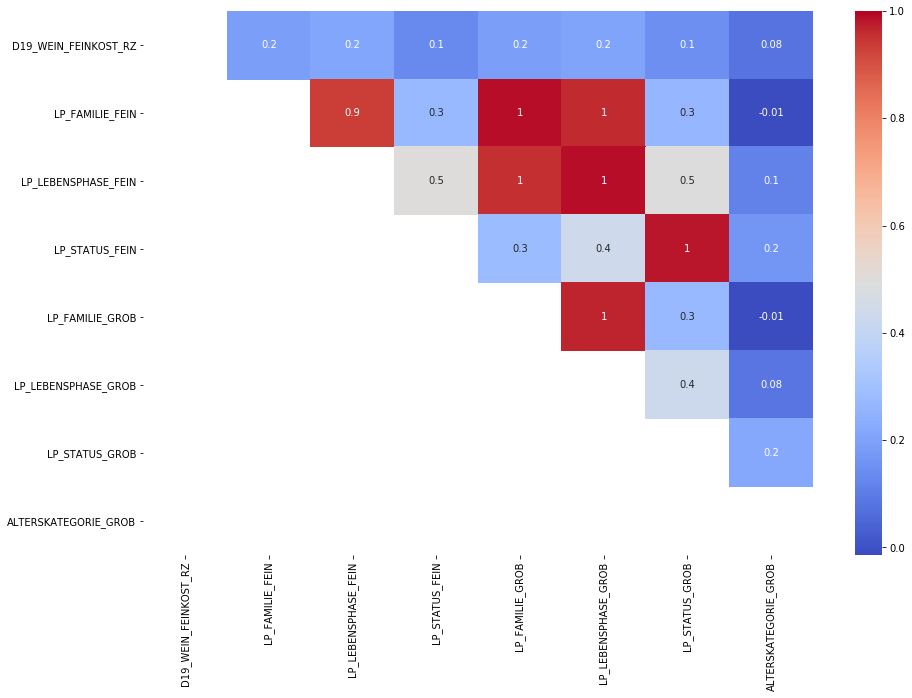

In [102]:
display_corr(azdias[fein_cols+grob_cols].corr())


In [103]:

azdias.drop(fein_cols+['LP_LEBENSPHASE_GROB'],axis=1,inplace=True)

In [104]:
missing_vals_azdias = get_missing_cols(azdias,True)

MOBI_REGIO                    17.481644
ANZ_HH_TITEL                  13.770590
GEMEINDETYP                   13.644259
GEBAEUDETYP_RASTER            13.213184
ANZ_STATISTISCHE_HAUSHALTE    13.212537
LP_FAMILIE_GROB               11.854945
KONSUMNAEHE                   11.138887
KONSUMZELLE                   11.132330
ALTER_HH                      11.090405
ANZ_PERSONEN                  11.090405
ANZ_TITEL                     11.090405
LP_STATUS_GROB                 0.744963
RT_KEIN_ANREIZ                 0.744963
RT_SCHNAEPPCHEN                0.744963
GFK_URLAUBERTYP                0.744963
ONLINE_AFFINITAET              0.744963
CJT_KATALOGNUTZER              0.744963
dtype: float64

17


In [105]:
display(azdias.info())
print('optimizing...')
non_na_cols = list(set(azdias.columns) -  set(missing_vals_azdias.index.tolist()))
azdias[non_na_cols] = optimize(azdias[non_na_cols],'',False)
display(azdias.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082873 entries, 0 to 1082872
Columns: 109 entries, AGER_TYP to customer_identifier
dtypes: float32(36), float64(9), int16(1), int64(6), int8(57)
memory usage: 333.6 MB


None

optimizing...



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082873 entries, 0 to 1082872
Columns: 109 entries, AGER_TYP to customer_identifier
dtypes: float32(20), float64(3), int16(1), int8(85)
memory usage: 197.2 MB


None

In [106]:
# check point
pd.to_pickle(azdias,'azdias_pre_impute.pkl')

In [107]:
azdias = pd.read_pickle('azdias_pre_impute.pkl')

## Imputation

In [108]:
azdias = xgb_imputer(azdias,1)

MOBI_REGIO                    17.481644
ANZ_HH_TITEL                  13.770590
GEMEINDETYP                   13.644259
GEBAEUDETYP_RASTER            13.213184
ANZ_STATISTISCHE_HAUSHALTE    13.212537
LP_FAMILIE_GROB               11.854945
KONSUMNAEHE                   11.138887
KONSUMZELLE                   11.132330
ALTER_HH                      11.090405
ANZ_PERSONEN                  11.090405
ANZ_TITEL                     11.090405
LP_STATUS_GROB                 0.744963
RT_KEIN_ANREIZ                 0.744963
RT_SCHNAEPPCHEN                0.744963
GFK_URLAUBERTYP                0.744963
ONLINE_AFFINITAET              0.744963
CJT_KATALOGNUTZER              0.744963
dtype: float64

17
imputing MOBI_REGIO...
Multiclass classification


5.0    21.415694
4.0    20.967267
3.0    19.890462
1.0    19.830254
2.0    17.848314
6.0     0.048010
Name: MOBI_REGIO, dtype: float64

[0]	validation_0-mlogloss:1.59275	validation_0-merror:0.50953
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.47380	validation_0-merror:0.50561
[2]	validation_0-mlogloss:1.39227	validation_0-merror:0.50510
[3]	validation_0-mlogloss:1.33044	validation_0-merror:0.50056
[4]	validation_0-mlogloss:1.28451	validation_0-merror:0.49937
[5]	validation_0-mlogloss:1.24663	validation_0-merror:0.49443
[6]	validation_0-mlogloss:1.21819	validation_0-merror:0.49119
[7]	validation_0-mlogloss:1.19446	validation_0-merror:0.48828
[8]	validation_0-mlogloss:1.17431	validation_0-merror:0.48645
[9]	validation_0-mlogloss:1.15791	validation_0-merror:0.48379
[10]	validation_0-mlogloss:1.14435	validation_0-merror:0.48207
[11]	validation_0-mlogloss:1.13315	validation_0-merror:0.48044
[12]	validation_0-mlogloss:1.12258	validation_0-merror:0.47916
[13]	validation_0-mlogloss:1

[128]	validation_0-mlogloss:0.90994	validation_0-merror:0.40691
[129]	validation_0-mlogloss:0.90943	validation_0-merror:0.40675
[130]	validation_0-mlogloss:0.90894	validation_0-merror:0.40654
[131]	validation_0-mlogloss:0.90833	validation_0-merror:0.40631
[132]	validation_0-mlogloss:0.90776	validation_0-merror:0.40597
[133]	validation_0-mlogloss:0.90725	validation_0-merror:0.40564
[134]	validation_0-mlogloss:0.90659	validation_0-merror:0.40538
[135]	validation_0-mlogloss:0.90596	validation_0-merror:0.40510
[136]	validation_0-mlogloss:0.90551	validation_0-merror:0.40485
[137]	validation_0-mlogloss:0.90497	validation_0-merror:0.40465
[138]	validation_0-mlogloss:0.90445	validation_0-merror:0.40433
[139]	validation_0-mlogloss:0.90394	validation_0-merror:0.40406
[140]	validation_0-mlogloss:0.90344	validation_0-merror:0.40376
[141]	validation_0-mlogloss:0.90285	validation_0-merror:0.40349
[142]	validation_0-mlogloss:0.90243	validation_0-merror:0.40321
[143]	validation_0-mlogloss:0.90195	vali

5.0    162725
4.0     12556
3.0      9914
2.0      2636
1.0      1190
6.0       283
dtype: int64

done MOBI_REGIO
imputing ANZ_HH_TITEL...
Multiclass classification


0.0    96.781061
1.0     2.714095
2.0     0.312502
3.0     0.192342
Name: ANZ_HH_TITEL, dtype: float64

[0]	validation_0-mlogloss:1.09522	validation_0-merror:0.21699
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.93477	validation_0-merror:0.20801
[2]	validation_0-mlogloss:0.82850	validation_0-merror:0.20470
[3]	validation_0-mlogloss:0.75686	validation_0-merror:0.20411
[4]	validation_0-mlogloss:0.70623	validation_0-merror:0.20009
[5]	validation_0-mlogloss:0.66917	validation_0-merror:0.19987
[6]	validation_0-mlogloss:0.64312	validation_0-merror:0.20216
[7]	validation_0-mlogloss:0.62304	validation_0-merror:0.20210
[8]	validation_0-mlogloss:0.60763	validation_0-merror:0.20242
[9]	validation_0-mlogloss:0.59683	validation_0-merror:0.20450
[10]	validation_0-mlogloss:0.58844	validation_0-merror:0.20555
[11]	validation_0-mlogloss:0.58112	validation_0-merror:0.20716
[12]	validation_0-mlogloss:0.57607	validation_0-merror:0.20767
[13]	validation_0-mlogloss:0

1.0    117214
0.0     31902
2.0         2
dtype: int64

done ANZ_HH_TITEL
imputing GEMEINDETYP...
Multiclass classification


22.0    19.368040
11.0    18.255032
40.0    15.752687
30.0    15.736326
12.0    15.253501
21.0     9.182108
50.0     6.452306
Name: GEMEINDETYP, dtype: float64

[0]	validation_0-mlogloss:1.11995	validation_0-merror:0.07184
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.81566	validation_0-merror:0.07144
[2]	validation_0-mlogloss:0.62941	validation_0-merror:0.07268
[3]	validation_0-mlogloss:0.50393	validation_0-merror:0.07123
[4]	validation_0-mlogloss:0.41597	validation_0-merror:0.07134
[5]	validation_0-mlogloss:0.35220	validation_0-merror:0.07091
[6]	validation_0-mlogloss:0.30573	validation_0-merror:0.07081
[7]	validation_0-mlogloss:0.27146	validation_0-merror:0.07038
[8]	validation_0-mlogloss:0.24512	validation_0-merror:0.06879
[9]	validation_0-mlogloss:0.22543	validation_0-merror:0.06771
[10]	validation_0-mlogloss:0.21056	validation_0-merror:0.06759
[11]	validation_0-mlogloss:0.19922	validation_0-merror:0.06656
[12]	validation_0-mlogloss:0.18988	validation_0-merror:0.06592
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.10717	validation_0-merror:0.04477
[129]	validation_0-mlogloss:0.10697	validation_0-merror:0.04472
[130]	validation_0-mlogloss:0.10657	validation_0-merror:0.04457
[131]	validation_0-mlogloss:0.10628	validation_0-merror:0.04442
[132]	validation_0-mlogloss:0.10606	validation_0-merror:0.04429
[133]	validation_0-mlogloss:0.10571	validation_0-merror:0.04417
[134]	validation_0-mlogloss:0.10539	validation_0-merror:0.04405
[135]	validation_0-mlogloss:0.10520	validation_0-merror:0.04400
[136]	validation_0-mlogloss:0.10490	validation_0-merror:0.04390
[137]	validation_0-mlogloss:0.10454	validation_0-merror:0.04378
[138]	validation_0-mlogloss:0.10434	validation_0-merror:0.04371
[139]	validation_0-mlogloss:0.10419	validation_0-merror:0.04367
[140]	validation_0-mlogloss:0.10397	validation_0-merror:0.04361
[141]	validation_0-mlogloss:0.10372	validation_0-merror:0.04352
[142]	validation_0-mlogloss:0.10358	validation_0-merror:0.04345
[143]	validation_0-mlogloss:0.10339	vali

50.0    144723
40.0      2945
30.0        82
dtype: int64

done GEMEINDETYP
imputing GEBAEUDETYP_RASTER...
Multiclass classification


4.0    46.166541
3.0    25.133780
5.0    19.951138
2.0     6.981339
1.0     1.767201
Name: GEBAEUDETYP_RASTER, dtype: float64

[0]	validation_0-mlogloss:1.47528	validation_0-merror:0.55067
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.39195	validation_0-merror:0.55874
[2]	validation_0-mlogloss:1.33538	validation_0-merror:0.55623
[3]	validation_0-mlogloss:1.29528	validation_0-merror:0.55484
[4]	validation_0-mlogloss:1.26535	validation_0-merror:0.55312
[5]	validation_0-mlogloss:1.24232	validation_0-merror:0.55509
[6]	validation_0-mlogloss:1.22431	validation_0-merror:0.55363
[7]	validation_0-mlogloss:1.21024	validation_0-merror:0.55207
[8]	validation_0-mlogloss:1.19887	validation_0-merror:0.55113
[9]	validation_0-mlogloss:1.18987	validation_0-merror:0.55021
[10]	validation_0-mlogloss:1.18201	validation_0-merror:0.54934
[11]	validation_0-mlogloss:1.17524	validation_0-merror:0.54844
[12]	validation_0-mlogloss:1.16914	validation_0-merror:0.54714
[13]	validation_0-mlogloss:1

[128]	validation_0-mlogloss:1.07511	validation_0-merror:0.49963
[129]	validation_0-mlogloss:1.07474	validation_0-merror:0.49939
[130]	validation_0-mlogloss:1.07435	validation_0-merror:0.49913
[131]	validation_0-mlogloss:1.07389	validation_0-merror:0.49878
[132]	validation_0-mlogloss:1.07348	validation_0-merror:0.49850
[133]	validation_0-mlogloss:1.07312	validation_0-merror:0.49823
[134]	validation_0-mlogloss:1.07269	validation_0-merror:0.49803
[135]	validation_0-mlogloss:1.07231	validation_0-merror:0.49777
[136]	validation_0-mlogloss:1.07192	validation_0-merror:0.49765
[137]	validation_0-mlogloss:1.07150	validation_0-merror:0.49730
[138]	validation_0-mlogloss:1.07106	validation_0-merror:0.49715
[139]	validation_0-mlogloss:1.07065	validation_0-merror:0.49681
[140]	validation_0-mlogloss:1.07032	validation_0-merror:0.49649
[141]	validation_0-mlogloss:1.06988	validation_0-merror:0.49633
[142]	validation_0-mlogloss:1.06949	validation_0-merror:0.49607
[143]	validation_0-mlogloss:1.06905	vali

4.0    127102
3.0      9818
5.0      6105
2.0        51
1.0         6
dtype: int64

done GEBAEUDETYP_RASTER
imputing ANZ_STATISTISCHE_HAUSHALTE...
Multiclass classification


1.0    31.695535
4.0    23.417479
2.0    22.478128
3.0    22.408858
Name: ANZ_STATISTISCHE_HAUSHALTE, dtype: float64

[0]	validation_0-mlogloss:1.13277	validation_0-merror:0.28205
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.98475	validation_0-merror:0.27688
[2]	validation_0-mlogloss:0.88634	validation_0-merror:0.27270
[3]	validation_0-mlogloss:0.81842	validation_0-merror:0.27027
[4]	validation_0-mlogloss:0.76873	validation_0-merror:0.26885
[5]	validation_0-mlogloss:0.73242	validation_0-merror:0.26712
[6]	validation_0-mlogloss:0.70447	validation_0-merror:0.26546
[7]	validation_0-mlogloss:0.68216	validation_0-merror:0.26327
[8]	validation_0-mlogloss:0.66493	validation_0-merror:0.26174
[9]	validation_0-mlogloss:0.65133	validation_0-merror:0.26005
[10]	validation_0-mlogloss:0.63989	validation_0-merror:0.25854
[11]	validation_0-mlogloss:0.63031	validation_0-merror:0.25715
[12]	validation_0-mlogloss:0.62216	validation_0-merror:0.25550
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.49548	validation_0-merror:0.20484
[129]	validation_0-mlogloss:0.49517	validation_0-merror:0.20475
[130]	validation_0-mlogloss:0.49484	validation_0-merror:0.20455
[131]	validation_0-mlogloss:0.49448	validation_0-merror:0.20439
[132]	validation_0-mlogloss:0.49417	validation_0-merror:0.20419
[133]	validation_0-mlogloss:0.49386	validation_0-merror:0.20408
[134]	validation_0-mlogloss:0.49356	validation_0-merror:0.20388
[135]	validation_0-mlogloss:0.49328	validation_0-merror:0.20378
[136]	validation_0-mlogloss:0.49297	validation_0-merror:0.20358
[137]	validation_0-mlogloss:0.49250	validation_0-merror:0.20333
[138]	validation_0-mlogloss:0.49221	validation_0-merror:0.20316
[139]	validation_0-mlogloss:0.49187	validation_0-merror:0.20301
[140]	validation_0-mlogloss:0.49158	validation_0-merror:0.20293
[141]	validation_0-mlogloss:0.49134	validation_0-merror:0.20279
[142]	validation_0-mlogloss:0.49099	validation_0-merror:0.20262
[143]	validation_0-mlogloss:0.49060	vali

1.0    139815
2.0      3248
3.0         7
4.0         5
dtype: int64

done ANZ_STATISTISCHE_HAUSHALTE
imputing LP_FAMILIE_GROB...
Multiclass classification


1.0    48.941696
5.0    27.455765
2.0    13.959365
4.0     6.418131
3.0     3.225043
Name: LP_FAMILIE_GROB, dtype: float64

[0]	validation_0-mlogloss:1.13586	validation_0-merror:0.15964
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.90412	validation_0-merror:0.15331
[2]	validation_0-mlogloss:0.76119	validation_0-merror:0.15270
[3]	validation_0-mlogloss:0.66540	validation_0-merror:0.15211
[4]	validation_0-mlogloss:0.59918	validation_0-merror:0.14932
[5]	validation_0-mlogloss:0.55274	validation_0-merror:0.14918
[6]	validation_0-mlogloss:0.51936	validation_0-merror:0.14850
[7]	validation_0-mlogloss:0.49530	validation_0-merror:0.14782
[8]	validation_0-mlogloss:0.47752	validation_0-merror:0.14619
[9]	validation_0-mlogloss:0.46447	validation_0-merror:0.14546
[10]	validation_0-mlogloss:0.45422	validation_0-merror:0.14475
[11]	validation_0-mlogloss:0.44614	validation_0-merror:0.14373
[12]	validation_0-mlogloss:0.43958	validation_0-merror:0.14349
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.34931	validation_0-merror:0.12449
[129]	validation_0-mlogloss:0.34895	validation_0-merror:0.12435
[130]	validation_0-mlogloss:0.34868	validation_0-merror:0.12431
[131]	validation_0-mlogloss:0.34846	validation_0-merror:0.12425
[132]	validation_0-mlogloss:0.34802	validation_0-merror:0.12404
[133]	validation_0-mlogloss:0.34762	validation_0-merror:0.12399
[134]	validation_0-mlogloss:0.34728	validation_0-merror:0.12384
[135]	validation_0-mlogloss:0.34676	validation_0-merror:0.12376
[136]	validation_0-mlogloss:0.34650	validation_0-merror:0.12365
[137]	validation_0-mlogloss:0.34628	validation_0-merror:0.12357
[138]	validation_0-mlogloss:0.34602	validation_0-merror:0.12347
[139]	validation_0-mlogloss:0.34575	validation_0-merror:0.12344
[140]	validation_0-mlogloss:0.34532	validation_0-merror:0.12338
[141]	validation_0-mlogloss:0.34498	validation_0-merror:0.12327
[142]	validation_0-mlogloss:0.34451	validation_0-merror:0.12319
[143]	validation_0-mlogloss:0.34415	vali

1.0    111872
5.0     12475
2.0      1660
3.0      1623
4.0       744
dtype: int64

done LP_FAMILIE_GROB
imputing KONSUMNAEHE...
Multiclass classification


1.0    22.823935
3.0    21.357169
5.0    18.907709
4.0    16.764718
2.0    16.577969
6.0     3.102510
7.0     0.465990
Name: KONSUMNAEHE, dtype: float64

[0]	validation_0-mlogloss:1.63653	validation_0-merror:0.53449
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.49728	validation_0-merror:0.52180
[2]	validation_0-mlogloss:1.40573	validation_0-merror:0.52530
[3]	validation_0-mlogloss:1.34102	validation_0-merror:0.52490
[4]	validation_0-mlogloss:1.29337	validation_0-merror:0.52372
[5]	validation_0-mlogloss:1.25731	validation_0-merror:0.52395
[6]	validation_0-mlogloss:1.22939	validation_0-merror:0.52290
[7]	validation_0-mlogloss:1.20807	validation_0-merror:0.52195
[8]	validation_0-mlogloss:1.19122	validation_0-merror:0.52268
[9]	validation_0-mlogloss:1.17769	validation_0-merror:0.52332
[10]	validation_0-mlogloss:1.16647	validation_0-merror:0.52116
[11]	validation_0-mlogloss:1.15711	validation_0-merror:0.52047
[12]	validation_0-mlogloss:1.14931	validation_0-merror:0.51977
[13]	validation_0-mlogloss:1

[128]	validation_0-mlogloss:1.03448	validation_0-merror:0.46467
[129]	validation_0-mlogloss:1.03388	validation_0-merror:0.46429
[130]	validation_0-mlogloss:1.03330	validation_0-merror:0.46400
[131]	validation_0-mlogloss:1.03269	validation_0-merror:0.46374
[132]	validation_0-mlogloss:1.03222	validation_0-merror:0.46347
[133]	validation_0-mlogloss:1.03175	validation_0-merror:0.46307
[134]	validation_0-mlogloss:1.03117	validation_0-merror:0.46268
[135]	validation_0-mlogloss:1.03069	validation_0-merror:0.46228
[136]	validation_0-mlogloss:1.03017	validation_0-merror:0.46185
[137]	validation_0-mlogloss:1.02975	validation_0-merror:0.46160
[138]	validation_0-mlogloss:1.02929	validation_0-merror:0.46136
[139]	validation_0-mlogloss:1.02884	validation_0-merror:0.46103
[140]	validation_0-mlogloss:1.02838	validation_0-merror:0.46083
[141]	validation_0-mlogloss:1.02792	validation_0-merror:0.46065
[142]	validation_0-mlogloss:1.02748	validation_0-merror:0.46036
[143]	validation_0-mlogloss:1.02710	vali

2.0    62057
3.0    58390
7.0      114
6.0       23
5.0       17
4.0       17
1.0        2
dtype: int64

done KONSUMNAEHE
imputing KONSUMZELLE...
Binary classification


0.0    77.175982
1.0    22.824018
Name: KONSUMZELLE, dtype: float64

[0]	validation_0-auc:0.99996	validation_0-error:0.00002
Multiple eval metrics have been passed: 'validation_0-error' will be used for early stopping.

Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-auc:0.99996	validation_0-error:0.00002
[2]	validation_0-auc:0.99996	validation_0-error:0.00002
[3]	validation_0-auc:0.99996	validation_0-error:0.00002
[4]	validation_0-auc:0.99996	validation_0-error:0.00002
[5]	validation_0-auc:0.99996	validation_0-error:0.00002
[6]	validation_0-auc:0.99996	validation_0-error:0.00002
[7]	validation_0-auc:0.99996	validation_0-error:0.00002
[8]	validation_0-auc:0.99996	validation_0-error:0.00002
[9]	validation_0-auc:0.99998	validation_0-error:0.00002
[10]	validation_0-auc:1.00000	validation_0-error:0.00002
Stopping. Best iteration:
[0]	validation_0-auc:0.99996	validation_0-error:0.00002

predictions:


0.0    120549
dtype: int64

done KONSUMZELLE
imputing ALTER_HH...
Multiclass classification


0.0     26.892908
18.0     6.990397
17.0     6.543253
16.0     6.218256
15.0     6.190835
19.0     6.130801
14.0     5.241811
21.0     5.205042
20.0     4.905077
10.0     4.664315
13.0     4.546843
12.0     4.435290
11.0     3.836087
9.0      3.717679
8.0      2.240807
7.0      1.425666
6.0      0.587571
5.0      0.130664
4.0      0.068032
3.0      0.022331
2.0      0.006232
1.0      0.000104
Name: ALTER_HH, dtype: float64

[0]	validation_0-mlogloss:1.76326	validation_0-merror:0.34359
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.57443	validation_0-merror:0.33506
[2]	validation_0-mlogloss:1.45009	validation_0-merror:0.33012
[3]	validation_0-mlogloss:1.36269	validation_0-merror:0.32802
[4]	validation_0-mlogloss:1.29646	validation_0-merror:0.32288
[5]	validation_0-mlogloss:1.24773	validation_0-merror:0.32179
[6]	validation_0-mlogloss:1.21033	validation_0-merror:0.32074
[7]	validation_0-mlogloss:1.17863	validation_0-merror:0.31878
[8]	validation_0-mlogloss:1.15383	validation_0-merror:0.31828
[9]	validation_0-mlogloss:1.13362	validation_0-merror:0.31699
[10]	validation_0-mlogloss:1.11587	validation_0-merror:0.31638
[11]	validation_0-mlogloss:1.10089	validation_0-merror:0.31541
[12]	validation_0-mlogloss:1.08636	validation_0-merror:0.31431
[13]	validation_0-mlogloss:1

[128]	validation_0-mlogloss:0.81389	validation_0-merror:0.25152
[129]	validation_0-mlogloss:0.81278	validation_0-merror:0.25107
[130]	validation_0-mlogloss:0.81168	validation_0-merror:0.25067
[131]	validation_0-mlogloss:0.81067	validation_0-merror:0.25031
[132]	validation_0-mlogloss:0.80962	validation_0-merror:0.24983
[133]	validation_0-mlogloss:0.80877	validation_0-merror:0.24947
[134]	validation_0-mlogloss:0.80758	validation_0-merror:0.24904
[135]	validation_0-mlogloss:0.80637	validation_0-merror:0.24867
[136]	validation_0-mlogloss:0.80534	validation_0-merror:0.24827
[137]	validation_0-mlogloss:0.80432	validation_0-merror:0.24788
[138]	validation_0-mlogloss:0.80328	validation_0-merror:0.24755
[139]	validation_0-mlogloss:0.80216	validation_0-merror:0.24717
[140]	validation_0-mlogloss:0.80116	validation_0-merror:0.24690
[141]	validation_0-mlogloss:0.80015	validation_0-merror:0.24657
[142]	validation_0-mlogloss:0.79928	validation_0-merror:0.24623
[143]	validation_0-mlogloss:0.79834	vali

0.0     117687
14.0       653
10.0       494
9.0        486
15.0       485
12.0       273
11.0        11
7.0          6
dtype: int64

done ALTER_HH
imputing ANZ_PERSONEN...
Multiclass classification


1.0    52.510651
2.0    24.849965
3.0    22.639383
Name: ANZ_PERSONEN, dtype: float64

[0]	validation_0-mlogloss:0.78440	validation_0-merror:0.07614
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.59880	validation_0-merror:0.07208
[2]	validation_0-mlogloss:0.48315	validation_0-merror:0.07168
[3]	validation_0-mlogloss:0.40405	validation_0-merror:0.07222
[4]	validation_0-mlogloss:0.34682	validation_0-merror:0.06928
[5]	validation_0-mlogloss:0.30845	validation_0-merror:0.06869
[6]	validation_0-mlogloss:0.27935	validation_0-merror:0.06686
[7]	validation_0-mlogloss:0.25904	validation_0-merror:0.06471
[8]	validation_0-mlogloss:0.24284	validation_0-merror:0.06355
[9]	validation_0-mlogloss:0.23130	validation_0-merror:0.06298
[10]	validation_0-mlogloss:0.22232	validation_0-merror:0.06236
[11]	validation_0-mlogloss:0.21637	validation_0-merror:0.06188
[12]	validation_0-mlogloss:0.21172	validation_0-merror:0.06137
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.14482	validation_0-merror:0.04556
[129]	validation_0-mlogloss:0.14463	validation_0-merror:0.04554
[130]	validation_0-mlogloss:0.14441	validation_0-merror:0.04545
[131]	validation_0-mlogloss:0.14418	validation_0-merror:0.04540
[132]	validation_0-mlogloss:0.14402	validation_0-merror:0.04537
[133]	validation_0-mlogloss:0.14385	validation_0-merror:0.04530
[134]	validation_0-mlogloss:0.14373	validation_0-merror:0.04525
[135]	validation_0-mlogloss:0.14357	validation_0-merror:0.04520
[136]	validation_0-mlogloss:0.14344	validation_0-merror:0.04517
[137]	validation_0-mlogloss:0.14328	validation_0-merror:0.04513
[138]	validation_0-mlogloss:0.14306	validation_0-merror:0.04510
[139]	validation_0-mlogloss:0.14290	validation_0-merror:0.04503
[140]	validation_0-mlogloss:0.14277	validation_0-merror:0.04496
[141]	validation_0-mlogloss:0.14264	validation_0-merror:0.04491
[142]	validation_0-mlogloss:0.14247	validation_0-merror:0.04490
[143]	validation_0-mlogloss:0.14229	vali

1.0    93558
3.0    23043
2.0     3494
dtype: int64

done ANZ_PERSONEN
imputing ANZ_TITEL...
Multiclass classification


0.0    99.385113
1.0     0.571575
2.0     0.041546
3.0     0.001350
4.0     0.000208
6.0     0.000104
5.0     0.000104
Name: ANZ_TITEL, dtype: float64

[0]	validation_0-mlogloss:1.02596	validation_0-merror:0.00547
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.69925	validation_0-merror:0.00543
[2]	validation_0-mlogloss:0.49878	validation_0-merror:0.00538
[3]	validation_0-mlogloss:0.36346	validation_0-merror:0.00524
[4]	validation_0-mlogloss:0.26928	validation_0-merror:0.00510
[5]	validation_0-mlogloss:0.20108	validation_0-merror:0.00505
[6]	validation_0-mlogloss:0.15160	validation_0-merror:0.00486
[7]	validation_0-mlogloss:0.11540	validation_0-merror:0.00473
[8]	validation_0-mlogloss:0.08947	validation_0-merror:0.00458
[9]	validation_0-mlogloss:0.06947	validation_0-merror:0.00447
[10]	validation_0-mlogloss:0.05488	validation_0-merror:0.00437
[11]	validation_0-mlogloss:0.04394	validation_0-merror:0.00418
[12]	validation_0-mlogloss:0.03540	validation_0-merror:0.00407
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.00146	validation_0-merror:0.00052
[129]	validation_0-mlogloss:0.00143	validation_0-merror:0.00052
[130]	validation_0-mlogloss:0.00141	validation_0-merror:0.00052
[131]	validation_0-mlogloss:0.00138	validation_0-merror:0.00052
[132]	validation_0-mlogloss:0.00136	validation_0-merror:0.00051
[133]	validation_0-mlogloss:0.00134	validation_0-merror:0.00051
[134]	validation_0-mlogloss:0.00132	validation_0-merror:0.00050
[135]	validation_0-mlogloss:0.00130	validation_0-merror:0.00049
[136]	validation_0-mlogloss:0.00128	validation_0-merror:0.00049
[137]	validation_0-mlogloss:0.00127	validation_0-merror:0.00048
[138]	validation_0-mlogloss:0.00124	validation_0-merror:0.00047
[139]	validation_0-mlogloss:0.00121	validation_0-merror:0.00046
[140]	validation_0-mlogloss:0.00119	validation_0-merror:0.00045
[141]	validation_0-mlogloss:0.00116	validation_0-merror:0.00044
[142]	validation_0-mlogloss:0.00114	validation_0-merror:0.00044
[143]	validation_0-mlogloss:0.00112	vali

0.0    99726
1.0    20369
dtype: int64

done ANZ_TITEL
imputing LP_STATUS_GROB...
Multiclass classification


1.0    33.325642
2.0    26.906716
4.0    18.301070
5.0    16.065690
3.0     5.400882
Name: LP_STATUS_GROB, dtype: float64

[0]	validation_0-mlogloss:1.21583	validation_0-merror:0.19865
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:0.99693	validation_0-merror:0.18612
[2]	validation_0-mlogloss:0.86469	validation_0-merror:0.18596
[3]	validation_0-mlogloss:0.76964	validation_0-merror:0.18391
[4]	validation_0-mlogloss:0.70046	validation_0-merror:0.18127
[5]	validation_0-mlogloss:0.65106	validation_0-merror:0.18030
[6]	validation_0-mlogloss:0.61206	validation_0-merror:0.17765
[7]	validation_0-mlogloss:0.58344	validation_0-merror:0.17642
[8]	validation_0-mlogloss:0.56115	validation_0-merror:0.17551
[9]	validation_0-mlogloss:0.54150	validation_0-merror:0.17354
[10]	validation_0-mlogloss:0.52789	validation_0-merror:0.17273
[11]	validation_0-mlogloss:0.51653	validation_0-merror:0.17175
[12]	validation_0-mlogloss:0.50673	validation_0-merror:0.17071
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.37419	validation_0-merror:0.13899
[129]	validation_0-mlogloss:0.37375	validation_0-merror:0.13882
[130]	validation_0-mlogloss:0.37341	validation_0-merror:0.13870
[131]	validation_0-mlogloss:0.37319	validation_0-merror:0.13866
[132]	validation_0-mlogloss:0.37285	validation_0-merror:0.13856
[133]	validation_0-mlogloss:0.37250	validation_0-merror:0.13846
[134]	validation_0-mlogloss:0.37208	validation_0-merror:0.13831
[135]	validation_0-mlogloss:0.37168	validation_0-merror:0.13818
[136]	validation_0-mlogloss:0.37136	validation_0-merror:0.13803
[137]	validation_0-mlogloss:0.37098	validation_0-merror:0.13794
[138]	validation_0-mlogloss:0.37054	validation_0-merror:0.13777
[139]	validation_0-mlogloss:0.37012	validation_0-merror:0.13757
[140]	validation_0-mlogloss:0.36974	validation_0-merror:0.13749
[141]	validation_0-mlogloss:0.36938	validation_0-merror:0.13737
[142]	validation_0-mlogloss:0.36900	validation_0-merror:0.13723
[143]	validation_0-mlogloss:0.36866	vali

1.0    1922
3.0    1649
4.0    1627
5.0    1608
2.0    1261
dtype: int64

done LP_STATUS_GROB
imputing RT_KEIN_ANREIZ...
Multiclass classification


4.0    24.670406
5.0    20.134517
3.0    19.428157
1.0    19.321906
2.0    16.445014
Name: RT_KEIN_ANREIZ, dtype: float64

[0]	validation_0-mlogloss:1.33914	validation_0-merror:0.34330
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.19175	validation_0-merror:0.33179
[2]	validation_0-mlogloss:1.08889	validation_0-merror:0.33010
[3]	validation_0-mlogloss:1.01220	validation_0-merror:0.32604
[4]	validation_0-mlogloss:0.95616	validation_0-merror:0.31961
[5]	validation_0-mlogloss:0.91483	validation_0-merror:0.31840
[6]	validation_0-mlogloss:0.88019	validation_0-merror:0.31384
[7]	validation_0-mlogloss:0.85209	validation_0-merror:0.31058
[8]	validation_0-mlogloss:0.83098	validation_0-merror:0.30751
[9]	validation_0-mlogloss:0.81225	validation_0-merror:0.30405
[10]	validation_0-mlogloss:0.79588	validation_0-merror:0.30165
[11]	validation_0-mlogloss:0.78348	validation_0-merror:0.29913
[12]	validation_0-mlogloss:0.76980	validation_0-merror:0.29629
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.54575	validation_0-merror:0.21499
[129]	validation_0-mlogloss:0.54526	validation_0-merror:0.21482
[130]	validation_0-mlogloss:0.54477	validation_0-merror:0.21455
[131]	validation_0-mlogloss:0.54416	validation_0-merror:0.21424
[132]	validation_0-mlogloss:0.54377	validation_0-merror:0.21421
[133]	validation_0-mlogloss:0.54338	validation_0-merror:0.21399
[134]	validation_0-mlogloss:0.54282	validation_0-merror:0.21372
[135]	validation_0-mlogloss:0.54249	validation_0-merror:0.21355
[136]	validation_0-mlogloss:0.54192	validation_0-merror:0.21329
[137]	validation_0-mlogloss:0.54158	validation_0-merror:0.21314
[138]	validation_0-mlogloss:0.54102	validation_0-merror:0.21291
[139]	validation_0-mlogloss:0.54031	validation_0-merror:0.21263
[140]	validation_0-mlogloss:0.53989	validation_0-merror:0.21241
[141]	validation_0-mlogloss:0.53943	validation_0-merror:0.21221
[142]	validation_0-mlogloss:0.53896	validation_0-merror:0.21197
[143]	validation_0-mlogloss:0.53830	vali

1.0    2367
3.0    2103
2.0    1726
4.0    1254
5.0     617
dtype: int64

done RT_KEIN_ANREIZ
imputing RT_SCHNAEPPCHEN...
Multiclass classification


5.0    50.500742
4.0    19.094330
3.0    13.599291
2.0    11.549247
1.0     5.256390
Name: RT_SCHNAEPPCHEN, dtype: float64

[0]	validation_0-mlogloss:1.47556	validation_0-merror:0.51455
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.39632	validation_0-merror:0.50662
[2]	validation_0-mlogloss:1.33806	validation_0-merror:0.49124
[3]	validation_0-mlogloss:1.29225	validation_0-merror:0.48746
[4]	validation_0-mlogloss:1.26161	validation_0-merror:0.48251
[5]	validation_0-mlogloss:1.23491	validation_0-merror:0.47550
[6]	validation_0-mlogloss:1.21236	validation_0-merror:0.47333
[7]	validation_0-mlogloss:1.19223	validation_0-merror:0.46912
[8]	validation_0-mlogloss:1.17546	validation_0-merror:0.46580
[9]	validation_0-mlogloss:1.16016	validation_0-merror:0.46185
[10]	validation_0-mlogloss:1.14362	validation_0-merror:0.45620
[11]	validation_0-mlogloss:1.13328	validation_0-merror:0.45376
[12]	validation_0-mlogloss:1.11955	validation_0-merror:0.44982
[13]	validation_0-mlogloss:1

[128]	validation_0-mlogloss:0.85930	validation_0-merror:0.35512
[129]	validation_0-mlogloss:0.85872	validation_0-merror:0.35483
[130]	validation_0-mlogloss:0.85801	validation_0-merror:0.35445
[131]	validation_0-mlogloss:0.85708	validation_0-merror:0.35397
[132]	validation_0-mlogloss:0.85643	validation_0-merror:0.35359
[133]	validation_0-mlogloss:0.85570	validation_0-merror:0.35320
[134]	validation_0-mlogloss:0.85492	validation_0-merror:0.35289
[135]	validation_0-mlogloss:0.85427	validation_0-merror:0.35254
[136]	validation_0-mlogloss:0.85327	validation_0-merror:0.35189
[137]	validation_0-mlogloss:0.85262	validation_0-merror:0.35173
[138]	validation_0-mlogloss:0.85185	validation_0-merror:0.35123
[139]	validation_0-mlogloss:0.85118	validation_0-merror:0.35094
[140]	validation_0-mlogloss:0.85034	validation_0-merror:0.35045
[141]	validation_0-mlogloss:0.84968	validation_0-merror:0.35011
[142]	validation_0-mlogloss:0.84891	validation_0-merror:0.34966
[143]	validation_0-mlogloss:0.84820	vali

5.0    5028
4.0    1489
3.0    1218
2.0     329
1.0       3
dtype: int64

done RT_SCHNAEPPCHEN
imputing GFK_URLAUBERTYP...
Multiclass classification


5.0     16.583365
12.0    13.569705
10.0    12.692337
8.0      9.831821
11.0     8.115511
4.0      7.455392
3.0      6.577094
9.0      6.152738
1.0      5.804024
7.0      5.283000
2.0      4.817148
6.0      3.117865
Name: GFK_URLAUBERTYP, dtype: float64

[0]	validation_0-mlogloss:2.22584	validation_0-merror:0.66542
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:2.12760	validation_0-merror:0.65827
[2]	validation_0-mlogloss:2.05997	validation_0-merror:0.65394
[3]	validation_0-mlogloss:2.01048	validation_0-merror:0.65029
[4]	validation_0-mlogloss:1.97276	validation_0-merror:0.64787
[5]	validation_0-mlogloss:1.94355	validation_0-merror:0.64510
[6]	validation_0-mlogloss:1.92012	validation_0-merror:0.64342
[7]	validation_0-mlogloss:1.90024	validation_0-merror:0.64156
[8]	validation_0-mlogloss:1.88438	validation_0-merror:0.63970
[9]	validation_0-mlogloss:1.87111	validation_0-merror:0.63831
[10]	validation_0-mlogloss:1.85973	validation_0-merror:0.63674
[11]	validation_0-mlogloss:1.84953	validation_0-merror:0.63526
[12]	validation_0-mlogloss:1.84049	validation_0-merror:0.63405
[13]	validation_0-mlogloss:1

[128]	validation_0-mlogloss:1.63892	validation_0-merror:0.57535
[129]	validation_0-mlogloss:1.63807	validation_0-merror:0.57503
[130]	validation_0-mlogloss:1.63731	validation_0-merror:0.57480
[131]	validation_0-mlogloss:1.63649	validation_0-merror:0.57444
[132]	validation_0-mlogloss:1.63573	validation_0-merror:0.57415
[133]	validation_0-mlogloss:1.63500	validation_0-merror:0.57386
[134]	validation_0-mlogloss:1.63425	validation_0-merror:0.57364
[135]	validation_0-mlogloss:1.63336	validation_0-merror:0.57327
[136]	validation_0-mlogloss:1.63263	validation_0-merror:0.57302
[137]	validation_0-mlogloss:1.63180	validation_0-merror:0.57271
[138]	validation_0-mlogloss:1.63106	validation_0-merror:0.57240
[139]	validation_0-mlogloss:1.63034	validation_0-merror:0.57221
[140]	validation_0-mlogloss:1.62956	validation_0-merror:0.57202
[141]	validation_0-mlogloss:1.62878	validation_0-merror:0.57160
[142]	validation_0-mlogloss:1.62801	validation_0-merror:0.57125
[143]	validation_0-mlogloss:1.62722	vali

4.0     1024
10.0     877
8.0      839
3.0      785
7.0      780
9.0      759
6.0      731
2.0      566
1.0      535
11.0     496
12.0     466
5.0      209
dtype: int64

done GFK_URLAUBERTYP
imputing ONLINE_AFFINITAET...
Multiclass classification


2.0    25.519954
4.0    18.962306
3.0    17.889554
1.0    16.298941
5.0    14.832630
0.0     6.496614
Name: ONLINE_AFFINITAET, dtype: float64

[0]	validation_0-mlogloss:1.44289	validation_0-merror:0.35372
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.25966	validation_0-merror:0.34261
[2]	validation_0-mlogloss:1.13829	validation_0-merror:0.34382
[3]	validation_0-mlogloss:1.05677	validation_0-merror:0.34021
[4]	validation_0-mlogloss:0.98823	validation_0-merror:0.32933
[5]	validation_0-mlogloss:0.94064	validation_0-merror:0.32562
[6]	validation_0-mlogloss:0.89902	validation_0-merror:0.32166
[7]	validation_0-mlogloss:0.86618	validation_0-merror:0.31512
[8]	validation_0-mlogloss:0.83743	validation_0-merror:0.30978
[9]	validation_0-mlogloss:0.81261	validation_0-merror:0.30334
[10]	validation_0-mlogloss:0.79236	validation_0-merror:0.29934
[11]	validation_0-mlogloss:0.77161	validation_0-merror:0.29480
[12]	validation_0-mlogloss:0.75642	validation_0-merror:0.29065
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.46849	validation_0-merror:0.18487
[129]	validation_0-mlogloss:0.46783	validation_0-merror:0.18458
[130]	validation_0-mlogloss:0.46721	validation_0-merror:0.18421
[131]	validation_0-mlogloss:0.46654	validation_0-merror:0.18394
[132]	validation_0-mlogloss:0.46583	validation_0-merror:0.18368
[133]	validation_0-mlogloss:0.46499	validation_0-merror:0.18341
[134]	validation_0-mlogloss:0.46445	validation_0-merror:0.18322
[135]	validation_0-mlogloss:0.46363	validation_0-merror:0.18296
[136]	validation_0-mlogloss:0.46292	validation_0-merror:0.18256
[137]	validation_0-mlogloss:0.46223	validation_0-merror:0.18230
[138]	validation_0-mlogloss:0.46165	validation_0-merror:0.18202
[139]	validation_0-mlogloss:0.46078	validation_0-merror:0.18175
[140]	validation_0-mlogloss:0.46027	validation_0-merror:0.18150
[141]	validation_0-mlogloss:0.45969	validation_0-merror:0.18121
[142]	validation_0-mlogloss:0.45925	validation_0-merror:0.18111
[143]	validation_0-mlogloss:0.45870	vali

4.0    2389
1.0    1412
2.0    1371
3.0    1206
5.0     969
0.0     720
dtype: int64

done ONLINE_AFFINITAET
imputing CJT_KATALOGNUTZER...
Multiclass classification


5.0    36.224956
4.0    18.751849
1.0    17.485574
3.0    16.662077
2.0    10.875544
Name: CJT_KATALOGNUTZER, dtype: float64

[0]	validation_0-mlogloss:1.33313	validation_0-merror:0.34759
Multiple eval metrics have been passed: 'validation_0-merror' will be used for early stopping.

Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:1.18661	validation_0-merror:0.34324
[2]	validation_0-mlogloss:1.08586	validation_0-merror:0.33652
[3]	validation_0-mlogloss:1.01594	validation_0-merror:0.33731
[4]	validation_0-mlogloss:0.96559	validation_0-merror:0.33599
[5]	validation_0-mlogloss:0.92664	validation_0-merror:0.33437
[6]	validation_0-mlogloss:0.89680	validation_0-merror:0.33282
[7]	validation_0-mlogloss:0.87454	validation_0-merror:0.33035
[8]	validation_0-mlogloss:0.85651	validation_0-merror:0.32933
[9]	validation_0-mlogloss:0.84227	validation_0-merror:0.32811
[10]	validation_0-mlogloss:0.82975	validation_0-merror:0.32692
[11]	validation_0-mlogloss:0.82103	validation_0-merror:0.32611
[12]	validation_0-mlogloss:0.81206	validation_0-merror:0.32469
[13]	validation_0-mlogloss:0

[128]	validation_0-mlogloss:0.67393	validation_0-merror:0.27762
[129]	validation_0-mlogloss:0.67358	validation_0-merror:0.27744
[130]	validation_0-mlogloss:0.67321	validation_0-merror:0.27723
[131]	validation_0-mlogloss:0.67278	validation_0-merror:0.27709
[132]	validation_0-mlogloss:0.67241	validation_0-merror:0.27693
[133]	validation_0-mlogloss:0.67192	validation_0-merror:0.27663
[134]	validation_0-mlogloss:0.67152	validation_0-merror:0.27635
[135]	validation_0-mlogloss:0.67114	validation_0-merror:0.27620
[136]	validation_0-mlogloss:0.67064	validation_0-merror:0.27599
[137]	validation_0-mlogloss:0.67023	validation_0-merror:0.27577
[138]	validation_0-mlogloss:0.66982	validation_0-merror:0.27554
[139]	validation_0-mlogloss:0.66949	validation_0-merror:0.27536
[140]	validation_0-mlogloss:0.66903	validation_0-merror:0.27521
[141]	validation_0-mlogloss:0.66861	validation_0-merror:0.27493
[142]	validation_0-mlogloss:0.66819	validation_0-merror:0.27465
[143]	validation_0-mlogloss:0.66780	vali

5.0    2533
4.0    2119
1.0    1328
3.0    1126
2.0     961
dtype: int64

done CJT_KATALOGNUTZER


In [109]:
get_missing_cols(azdias,True)

Series([], dtype: float64)

0


Series([], dtype: float64)

# Feature Engineering


from earlier we noticed the birth year column showing us data for individuals of weird ages such as 3 or 120,it worth doing a small investigation into these groups

In [110]:
azdias['age'] = azdias.GEBURTSJAHR.apply(lambda x:x if x==0 else (2020-x))

In [111]:
azdias.drop(['GEBURTSJAHR'],axis=1,inplace=True)

Intersting to note that there are idividuals who are below the age of 10, depending on how the information is collected, it might be due to the fact that parents fill details of the child when purchasing items for them

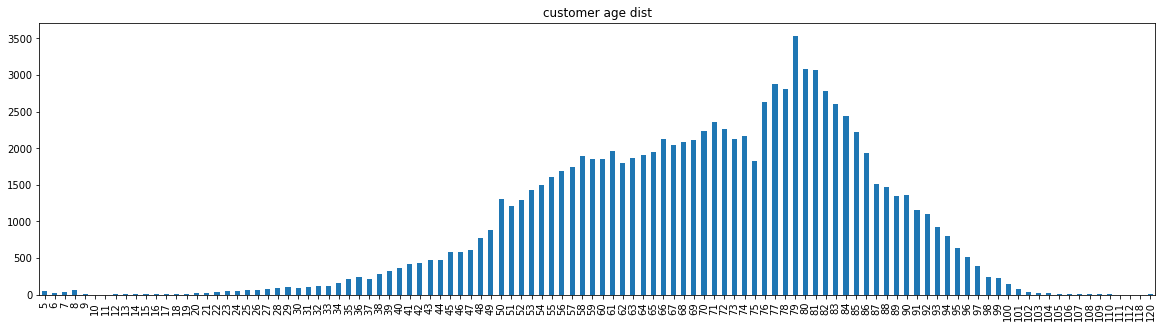

In [112]:
ax = azdias.loc[azdias.customer_identifier == 1].age.value_counts().sort_index()[3:].plot(kind='bar',figsize = (20,5),title = 'customer age dist')

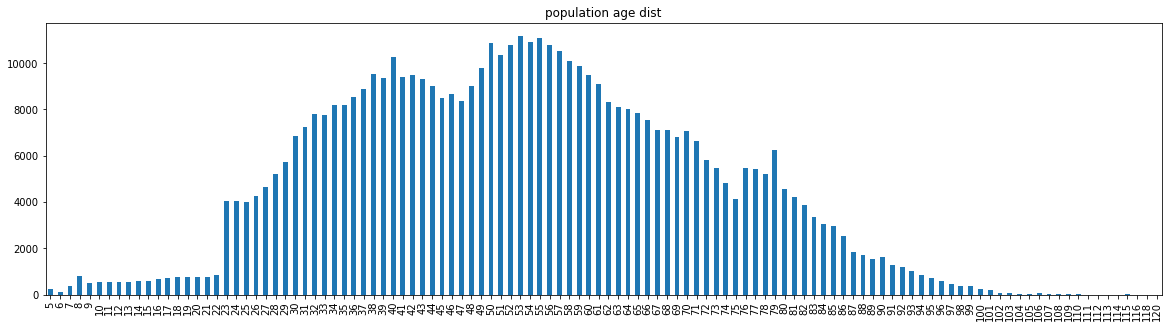

In [113]:
ax = azdias.loc[azdias.customer_identifier == 0].age.value_counts().sort_index()[3:].plot(kind='bar',figsize = (20,5),title = 'population age dist')

In [114]:
lookUpAttr(azdias,['ALTER_HH'])

****************************************************************************************************
ALTER_HH

Description:
 main age within the household
Mapping:
 {0: 'unknown / no main age detectable', 1: '01.01.1895 bis 31.12.1899', 2: '01.01.1900 bis 31.12.1904', 3: '01.01.1905 bis 31.12.1909', 4: '01.01.1910 bis 31.12.1914', 5: '01.01.1915 bis 31.12.1919', 6: '01.01.1920 bis 31.12.1924', 7: '01.01.1925 bis 31.12.1929', 8: '01.01.1930 bis 31.12.1934', 9: '01.01.1935 bis 31.12.1939', 10: '01.01.1940 bis 31.12.1944', 11: '01.01.1945 bis 31.12.1949', 12: '01.01.1950 bis 31.12.1954', 13: '01.01.1955 bis 31.12.1959', 14: '01.01.1960 bis 31.12.1964', 15: '01.01.1965 bis 31.12.1969', 16: '01.01.1970 bis 31.12.1974', 17: '01.01.1975 bis 31.12.1979', 18: '01.01.1980 bis 31.12.1984', 19: '01.01.1985 bis 31.12.1989', 20: '01.01.1990 bis 31.12.1994', 21: '01.01.1995 bis 31.12.1999'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
0.0     34.778409
1

In [115]:
from datetime import datetime
# need to sort our ALTER_HH for my own sanity
mapping = dias_attr_mapping['ALTER_HH']['mapping']
def get_age_bucket(date_range):
    
    date_1,date_2 = date_range.split('bis')
    
    year_lower = datetime.strptime(date_1.strip(), '%d.%m.%Y').year
    year_higher = datetime.strptime(date_2.strip(), '%d.%m.%Y').year
    this_year = datetime.now().year 
    return f'{this_year - year_lower} to {this_year - year_higher}'
    
for i in range(1,len(mapping)):
    mapping[i] = get_age_bucket(mapping[i])
     

In [116]:
f'{len(azdias.loc[(azdias.age < 23) & (azdias.age != 0)])} individuals less than 16 years'

'11824 individuals less than 16 years'

In [117]:
f'{len(azdias.loc[(azdias.age > 100) & (azdias.age != 0) ])} individuals greater than 100 years'

'871 individuals greater than 100 years'

In [118]:
lookUpAttr(azdias,['PRAEGENDE_JUGENDJAHRE'])

****************************************************************************************************
PRAEGENDE_JUGENDJAHRE

Description:
 dominating movement in the person's youth (avantgarde or mainstream)
Mapping:
 {'-1, 0': 'unknown', 1: '40ies - war years (Mainstream, O+W)', 2: '40ies - reconstruction years (Avantgarde, O+W)', 3: '50ies - economic miracle (Mainstream, O+W)', 4: '50ies - milk bar / Individualisation (Avantgarde, O+W)', 5: '60ies - economic miracle (Mainstream, O+W)', 6: '60ies - generation 68 / student protestors (Avantgarde, W)', 7: '60ies - opponents to the building of the Wall (Avantgarde, O)', 8: '70ies - family orientation (Mainstream, O+W)', 9: '70ies - peace movement (Avantgarde, O+W)', 10: '80ies - Generation Golf (Mainstream, W)', 11: '80ies - ecological awareness (Avantgarde, W)', 12: '80ies - FDJ / communist party youth organisation (Mainstream, O)', 13: '80ies - Swords into ploughshares (Avantgarde, O)', 14: '90ies - digital media kids (Mainstream, O+W)'

In [119]:
generation_map = {-1:-1 , 1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6}
azdias['generation'] = azdias.PRAEGENDE_JUGENDJAHRE.map(generation_map)

add_feature('generation','generation group',{-1:'unknown',1:'40ies',2:'50ies',3:'60ies',4:'70ies',5:'80ies',6:'90ies'} ,'categorical','Person')

In [ ]:
azdias.drop(['PRAEGENDE_JUGENDJAHRE'],axis = 1 , inplace = True)

Since PRAEGENDE_JUGENDJAHRE is made up of generation and movement also which area east or west will extract only the generation as there are other features that describe the other information

to check the quality of the feature engineering will check how well the engineered feature differentiates between classes we aim to predict, we can see extracting generation from PRAEGENDE_JUGENDJAHRE does well in differentiating between customer and population

generation
0.008158508158508158


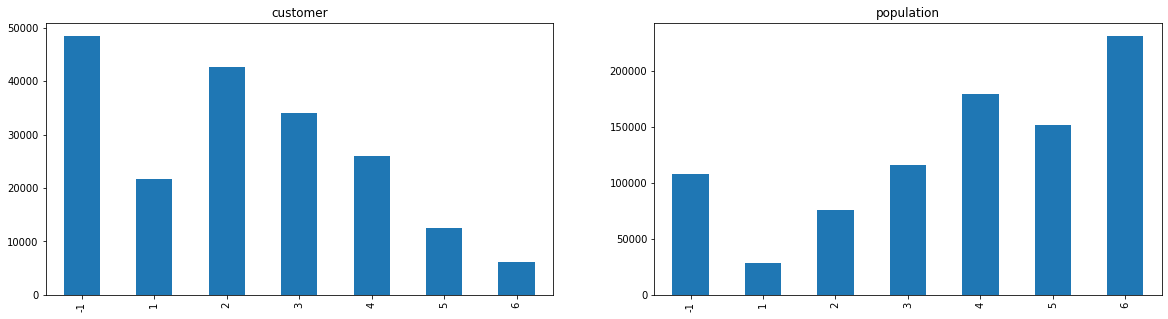

In [121]:
show_diff(azdias,'generation')

There seems to be many columns describing a persons age, need to check if they not conflicting

In [122]:
lookUpAttr(azdias,['generation','ALTERSKATEGORIE_GROB','age'])

****************************************************************************************************
generation

Description:
 generation group
Mapping:
 {-1: 'unknown', 1: '40ies', 2: '50ies', 3: '60ies', 4: '70ies', 5: '80ies', 6: '90ies'}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
-1    14.466239
 1     4.661858
 2    10.917531
 3    13.865984
 4    18.986622
 5    15.177218
 6    21.924547
Name: generation, dtype: float64

Unique Values:
7
****************************************************************************************************
ALTERSKATEGORIE_GROB

Description:
 age classification through prename analysis 
Mapping:
 {'-1, 0': 'unknown', 1: '< 30 years', 2: '30 - 45 years', 3: '46 - 60 years', 4: '> 60 years', 9: 'uniformly distributed'}
Additional Notes:
 ['modelled on millions of first name-age-reference data  ']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1    15.816629
2    16.367293
3    38.499159
4    29.028704

In [123]:
# will group generation and then using the age will check the distribution of ages within
# each generation classification
gb = azdias[['generation','ALTERSKATEGORIE_GROB','age']].groupby('generation')

for group,df in gb:
    print(dias_attr_mapping['generation']['mapping'][group])
    display(df.age.value_counts().sort_index())
    print('correct generation mapping:')
    max_age = df.age.value_counts().sort_index().index[-1]
    min_age = df.age.value_counts().sort_index().index[1]
    print(2020-min_age,'-',2020-max_age)
        


unknown


0     154027
46       198
47       197
48       227
49       249
50       268
51       256
52       278
53       338
54       291
55       322
Name: age, dtype: int64

correct generation mapping:
1974 - 1965
40ies


0      19473
86      4458
87      3371
88      3172
89      2887
90      2989
91      2437
92      2281
93      1951
94      1665
95      1370
96      1112
97       865
98       617
99       581
100      382
101      266
102      127
103       82
104       64
105       47
106       68
107       46
108       35
109       40
110       47
111        8
112        8
113        4
114        7
115        8
116        5
118        2
120        7
Name: age, dtype: int64

correct generation mapping:
1934 - 1900
50ies


0     45754
76     8118
77     8317
78     8024
79     9770
80     7646
81     7297
82     6637
83     5972
84     5517
85     5171
Name: age, dtype: int64

correct generation mapping:
1944 - 1935
60ies


0     66280
66     9665
67     9137
68     9197
69     8948
70     9301
71     9009
72     8099
73     7605
74     6973
75     5937
Name: age, dtype: int64

correct generation mapping:
1954 - 1945
70ies


0     94944
56    12484
57    12260
58    11974
59    11731
60    11340
61    11060
62    10119
63     9964
64     9943
65     9782
Name: age, dtype: int64

correct generation mapping:
1964 - 1955
80ies


0     54684
46     9067
47     8764
48     9572
49    10425
50    11921
51    11315
52    11805
53    12276
54    12142
55    12379
Name: age, dtype: int64

correct generation mapping:
1974 - 1965
90ies


0     50180
3       638
4       174
5       307
6       143
7       419
8       874
9       489
10      547
11      561
12      556
13      572
14      573
15      600
16      684
17      722
18      797
19      763
20      774
21      768
22      863
23     4078
24     4092
25     4076
26     4314
27     4717
28     5287
29     5852
30     6942
31     7359
32     7920
33     7890
34     8354
35     8400
36     8788
37     9102
38     9800
39     9697
40    10646
41     9838
42     9936
43     9776
44     9482
45     9065
Name: age, dtype: int64

correct generation mapping:
2017 - 1975


In [124]:
# will check the accuracy of age category fine , by trying to consolidate what the label
# tells us and the ages of the people
gb = azdias[['generation','ALTERSKATEGORIE_GROB','age']].groupby('ALTERSKATEGORIE_GROB')

for group,df in gb:
    print(dias_attr_mapping['ALTERSKATEGORIE_GROB']['mapping'][group])
    display(df.age.value_counts().sort_index())

#  ALTERSKATEGORIE_GROB seems very inaccurate 

< 30 years


0      84578
3        129
4         38
5         62
6         18
7         81
8        283
9        295
10       330
11       359
12       357
13       356
14       371
15       395
16       447
17       466
18       540
19       513
20       532
21       533
22       543
23      2689
24      2603
25      2554
26      2606
27      2800
28      2959
29      3250
30      3735
31      3797
32      3806
33      3578
34      3564
35      3249
36      3147
37      3050
38      2941
39      2766
40      2671
41      2126
42      1919
43      1645
44      1368
45      1110
46      1041
47       865
48       799
49       733
50       767
51       637
52       523
53       582
54       516
55       430
56       409
57       362
58       341
59       351
60       284
61       250
62       246
63       190
64       359
65       333
66       355
67       282
68       297
69       297
70       296
71       290
72       281
73       254
74       202
75       197
76       218
77       207
78       188

30 - 45 years


0      82014
3        142
4         28
5         37
6         17
7         63
8         97
9         53
10        49
11        52
12        53
13        62
14        54
15        56
16        79
17        84
18        97
19        98
20        78
21       103
22       119
23       557
24       597
25       676
26       769
27       863
28      1077
29      1217
30      1568
31      1788
32      2111
33      2232
34      2438
35      2613
36      2796
37      3089
38      3490
39      3506
40      3985
41      3897
42      3996
43      3985
44      3888
45      3705
46      3516
47      3316
48      3241
49      3438
50      3271
51      2798
52      2460
53      2159
54      1911
55      1675
56      1463
57      1228
58      1121
59       840
60       808
61       637
62       579
63       542
64       352
65       292
66       306
67       244
68       273
69       200
70       229
71       217
72       207
73       149
74       164
75       132
76       139
77       116
78       100

46 - 60 years


0      184409
3         266
4          74
5         120
6          58
7         175
8         283
9          63
10         82
11         88
12         87
13         94
14         90
15         77
16         82
17         90
18        103
19         83
20         92
21         82
22        115
23        540
24        614
25        572
26        664
27        770
28        925
29       1055
30       1241
31       1363
32       1587
33       1664
34       1877
35       2060
36       2324
37       2445
38       2768
39       2894
40       3348
41       3281
42       3499
43       3601
44       3668
45       3713
46       4109
47       4220
48       5085
49       5714
50       6903
51       7060
52       7867
53       8412
54       8421
55       8673
56       8540
57       8341
58       7893
59       7692
60       7165
61       6746
62       5766
63       5438
64       5150
65       4774
66       4190
67       3700
68       3462
69       3291
70       3071
71       2876
72       2606
73    

> 60 years


0      132920
3          97
4          33
5          87
6          50
7          99
8         203
9          65
10         73
11         57
12         55
13         53
14         52
15         67
16         69
17         72
18         51
19         61
20         65
21         48
22         78
23        267
24        259
25        256
26        253
27        263
28        299
29        307
30        367
31        377
32        390
33        394
34        448
35        440
36        488
37        473
38        550
39        486
40        601
41        502
42        482
43        512
44        522
45        509
46        572
47        548
48        644
49        760
50       1220
51       1053
52       1215
53       1435
54       1558
55       1898
56       2049
57       2305
58       2604
59       2832
60       3061
61       3408
62       3509
63       3772
64       4065
65       4359
66       4791
67       4883
68       5150
69       5140
70       5683
71       5600
72       4982
73    

uniformly distributed


0      1421
3         4
4         1
5         1
7         1
8         8
9        13
10       13
11        5
12        4
13        7
14        6
15        5
16        7
17       10
18        6
19        8
20        7
21        2
22        8
23       25
24       19
25       18
26       22
27       21
28       27
29       23
30       31
31       34
32       26
33       22
34       27
35       38
36       33
37       45
38       51
39       45
40       41
41       32
42       40
43       33
44       36
45       28
46       27
47       12
48       30
49       29
50       28
51       23
52       18
53       26
54       27
55       25
56       23
57       24
58       15
59       16
60       22
61       19
62       19
63       22
64       17
65       24
66       23
67       28
68       15
69       20
70       22
71       26
72       23
73       14
74       12
75       11
76       19
77       11
78       18
79       19
80       16
81        9
82       14
83       14
84       13
85       13
86  

interstingly we find that the unknown values in generation seem to be the ages 46-55 
which correspond to the ages in the generation 80ies we can reclassify all people 
with unknown generation with ages between 46-55 as being in generation 80ies

the generations seem to be abit off ,eg people classified as being in generation 50ies actually
have birth years between 1945-1935

In [125]:
azdias.loc[(azdias.generation == -1) & (azdias.age != 0  ),'generation'] = 5

In [126]:
gb = azdias[['generation','ALTERSKATEGORIE_GROB','age']].groupby('generation')
new_gen_mapping = dict()
for group,df in gb:
    if group != -1:
        max_age = df.age.value_counts().sort_index().index[-1]
        min_age = df.age.value_counts().sort_index().index[1]
        new_gen_mapping[group] = f'{max_age}-{min_age}'
    else:
        new_gen_mapping[group] = f'unknown'
update_feature('generation',mapping=new_gen_mapping)

# will drop ALTERSKATEGORIE_GROB as it seems miss classified in terms of ages , and rightfully so since it is described as being an age analysis on prename
azdias.drop(['ALTERSKATEGORIE_GROB'],axis=1,inplace=True)

In [127]:
# wanted to see if the stereotype is true that females dont generaly reveal their age
azdias.loc[azdias.generation == -1  ,'ANREDE_KZ' ].value_counts()
# well more females do have missing "age" classifiers however cannot make any solid conclusions from the data since the amount missing from each sex group is not significantly different

2    85338
1    68689
Name: ANREDE_KZ, dtype: int64

In [128]:
# LP_STATUS_GROB mapping needs correcting
update_feature('LP_STATUS_GROB',mapping = {0:'unknown',1: 'low-income earners', 2: 'average earners', 3: 'independants', 4: 'houseowners', 5: 'top earners '})
azdias.LP_STATUS_GROB =azdias.LP_STATUS_GROB.astype('category') 

# the mapping for LP_FAMILIE_GROB seems to be incorrect need to correct it 
update_feature('LP_FAMILIE_GROB',mapping = {0:'unknown',1:'single',2:'couple',3:'single parent',4:'family',5:'multiperson household'})
azdias.LP_FAMILIE_GROB =azdias.LP_FAMILIE_GROB.astype('category')


In [129]:
# learnt a new quicker way to filter column names 
finanz_cols = azdias.filter(like='FINANZ_').columns.tolist()
azdias.drop(finanz_cols,axis=1,inplace=True)
azdias.FINANZTYP =azdias.FINANZTYP.astype('category') 

FINANZTYP
0.0021645021645021645


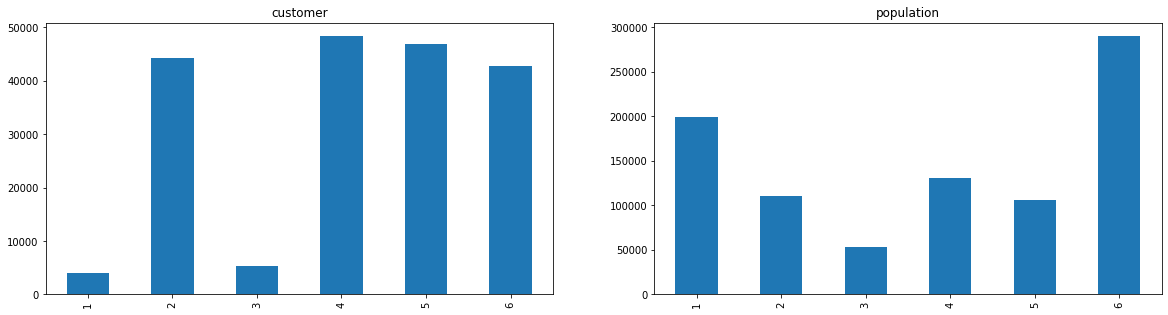

In [130]:
show_diff(azdias,'FINANZTYP')

CAMEO_DEUINTL_2015 represents the wealth and type of family unit within the household 

In [131]:
lookUpAttr(azdias,['CAMEO_DEUINTL_2015'])

****************************************************************************************************
CAMEO_DEUINTL_2015

Description:
 CAMEO classification 2015 - international typology (each German CAMEO code belongs to one international code)
Mapping:
 {-1: 'unknown', 11: 'Wealthy Households-Pre-Family Couples & Singles', 12: 'Wealthy Households-Young Couples With Children', 13: 'Wealthy Households-Families With School Age Children', 14: 'Wealthy Households-Older Families &  Mature Couples', 15: 'Wealthy Households-Elders In Retirement', 21: 'Prosperous Households-Pre-Family Couples & Singles', 22: 'Prosperous Households-Young Couples With Children', 23: 'Prosperous Households-Families With School Age Children', 24: 'Prosperous Households-Older Families & Mature Couples', 25: 'Prosperous Households-Elders In Retirement', 31: 'Comfortable Households-Pre-Family Couples & Singles', 32: 'Comfortable Households-Young Couples With Children', 33: 'Comfortable Households-Families With School

In [132]:
azdias['HH_wealth']= azdias.CAMEO_DEUINTL_2015.apply(lambda x: x//10) # extract the units
azdias['HH_family_type'] = azdias.CAMEO_DEUINTL_2015.apply(lambda x: x - (x//10)*10 if x != -1 else -1 ) # extract the tens


wealth_map = {-1:'unknown',1:'Wealthy',2:'Properous',3:'comfortable',
              4:'Less affluent',5:'Poorer'}
add_feature('HH_wealth','house hold wealth status',wealth_map,'categorical', 'Household')

family_map = {-1:'unknown' , 
              1:'Pre-Family Couples & Singles',
              2:'Young Couples With Children',
              3:'Families With School Age Children',
              4:'Older Families &  Mature Couples',
              5:'Elders In Retirement'}
add_feature('HH_family_type','house hold family type',family_map,'categorical','Household')

In [133]:
azdias.drop(['CAMEO_DEUINTL_2015'],axis = 1 , inplace = True)

HH_wealth
0.0021645021645021645


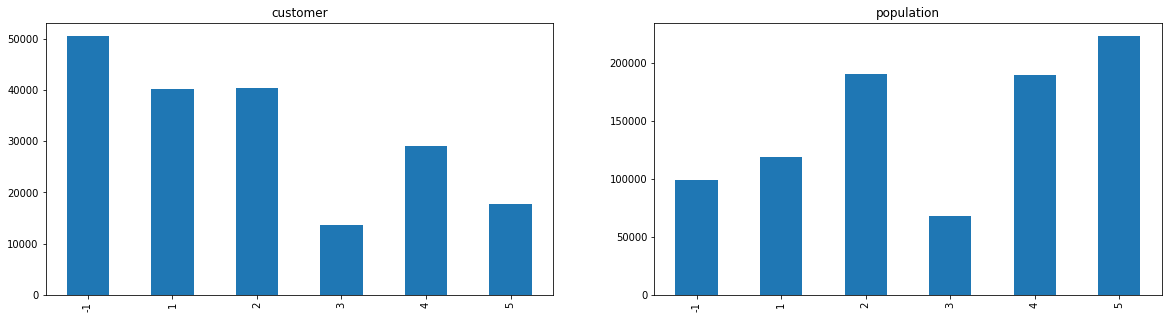

HH_family_type
0.0021645021645021645


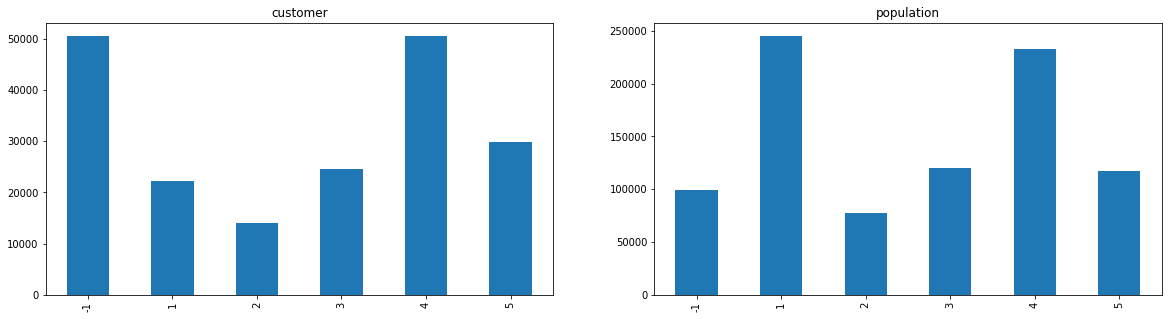

In [134]:
show_diff(azdias,'HH_wealth')
show_diff(azdias,'HH_family_type')

Noticed this feature in the pre analyis 

In [135]:
lookUpAttr(azdias,['CJT_GESAMTTYP']) # column we noticed in the pre-analysis

****************************************************************************************************
CJT_GESAMTTYP

Description:
 customer journey typology
Mapping:
 {0: 'unknown', 1: 'Advertising- and Consumptionminimalist', 2: 'Advertising- and Consumptiontraditionalist', 3: 'advertisinginterested Store-shopper', 4: 'advertisinginterested Online-shopper', 5: 'Advertising- and Cross-Channel-Enthusiast', 6: 'Advertising-Enthusiast with restricted Cross-Channel-Behaviour '}
Additional Notes:
 ['relating to the preferred information, marketing and buying channels of consumers as well as their cross-channel usage. The information basis is a survey on the consumer channel preferences combined via a statistical modell with AZ DIAS data']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0     0.744963
1    11.367723
2    17.696997
3    16.695587
4    21.967027
5    12.520674
6    19.007030
Name: CJT_GESAMTTYP, dtype: float64

Unique Values:
7


In [136]:
azdias.CJT_GESAMTTYP = azdias.CJT_GESAMTTYP.astype('category')

CJT_GESAMTTYP
0.008158508158508158


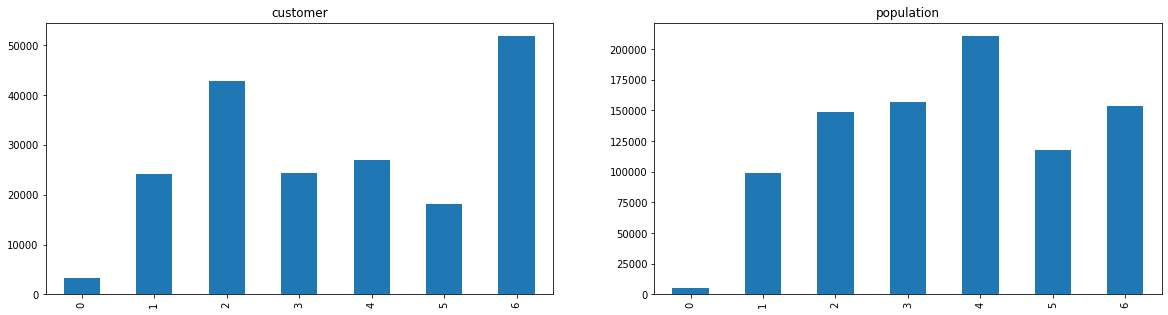

In [137]:
show_diff(azdias,'CJT_GESAMTTYP')

We can see that customers are more Advertising- and Consumptiontraditionalists so i was wondering what exactly is a traditonalist, so heres the wiki definition:

"A traditionalist is a person who supports the established customs and beliefs of his or her society or group, and does not want to change them"

The population tends to be more advertisinginterested Online-shoppers

In [139]:
lookUpAttr(azdias,['WOHNLAGE'])

****************************************************************************************************
WOHNLAGE

Description:
 residential-area 
Mapping:
 {-1: 'unknown', 0: 'no score calculated', 1: 'very good neighbourhood', 2: 'good neighbourhood', 3: 'average neighbourhood', 4: 'poor neighbourhood', 5: 'very poor neighbourhood', 7: 'rural neighbourhood', 8: 'new building in rural neighbourhood'}
Additional Notes:
 [nan]
Info level:
 ['Building']

Column Summary
Value Counts Percentage
-1    13.212537
 0     0.744039
 1     5.585604
 2    11.525174
 3    27.223229
 4    13.950759
 5     7.409548
 7    18.529043
 8     1.820066
Name: WOHNLAGE, dtype: float64

Unique Values:
9


In [141]:

azdias['area_type'] = azdias.WOHNLAGE.map( {-1:-1,0:0,1:0,2:0,3:0,4:0,5:0,7:1,8:1})
add_feature('area_type','type or area Urban/rural',{-1:'Unknown',0:'urban',1:'rural'},'categorical', 'Building')
azdias['neighbourhood_class'] = azdias.WOHNLAGE.map({-1:-1,0:0,1:1,2:2,3:3,4:4,5:5,7:0,8:0})
add_feature('neighbourhood_class','wealth status of neighbourhood',{-1:'unknown',0:'no score/rural',1:'very good',2:'good',3:'average',4:'poor',5:'very poor'},'categorical', 'Building')

In [142]:
azdias.drop(['WOHNLAGE'],axis = 1 , inplace = True)

In [116]:
update_feature('area_type','type or area Urban/rural',{-1:'Unknown',0:'urban',1:'rural'},'categorical')
update_feature('neighbourhood_class','wealth status of neighbourhood',{-1:'unknown',0:'no score/rural',1:'very good',2:'good',3:'average',4:'poor',5:'very poor'},'categorical')

area_type
0.3333333333333333


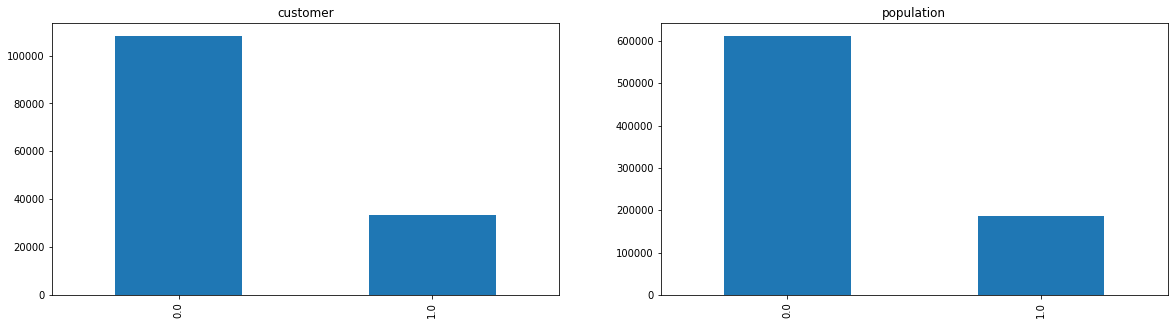

neighbourhood_class
0.025974025974025972


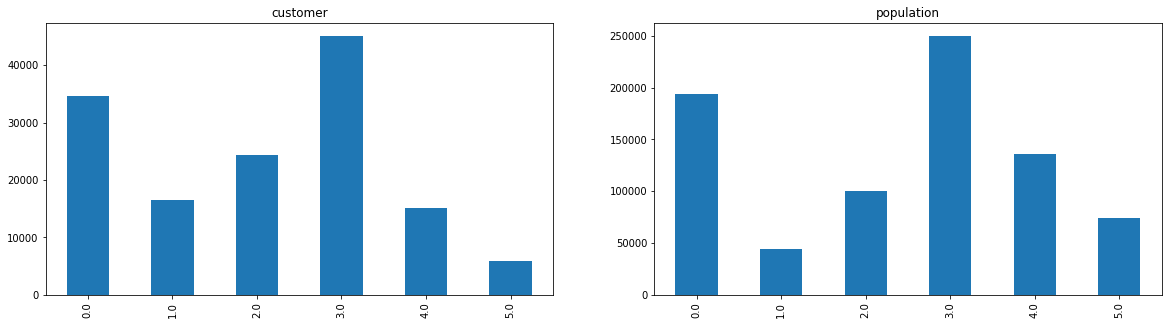

In [143]:
show_diff(azdias,'area_type')
show_diff(azdias,'neighbourhood_class')

In [144]:
lookUpAttr(azdias,['D19_KK_KUNDENTYP'])

****************************************************************************************************
D19_KK_KUNDENTYP

Description:
 consumption movement in the last 12 months
Mapping:
 {-1: 'unknown', 1: 'regular customer', 2: 'active customer', 3: 'new costumer', 4: 'stray customer', 5: 'inactive customer ', 6: 'passive customer'}
Additional Notes:
 ['AZ has access to approx. 650 Million transaction data - this is the basis for the criteria family DHT4A aka. D19. This data contains unique data regarding the mail-order activity of consumers, differentiated ']
Info level:
 ['Household']

Column Summary
Value Counts Percentage
-1    64.324164
 1     4.922369
 2     7.199182
 3     7.633582
 4     5.186665
 5     5.612754
 6     5.121284
Name: D19_KK_KUNDENTYP, dtype: float64

Unique Values:
7


In [145]:
azdias.D19_KK_KUNDENTYP = azdias.D19_KK_KUNDENTYP.astype('category')

In [146]:
azdias.dtypes[azdias.dtypes == 'category']

CJT_GESAMTTYP       category
FINANZTYP           category
D19_KK_KUNDENTYP    category
LP_FAMILIE_GROB     category
LP_STATUS_GROB      category
dtype: object

High cardinality and numerical columns

In [147]:
high_card_cols = list()
for col in azdias.columns:
    if getattr(azdias,col).nunique() > 20:
        high_card_cols.append(col)
        print(col ,  getattr(azdias,col).nunique())

ALTER_HH 22
D19_LETZTER_KAUF_BRANCHE 35
age 117


In [148]:
lookUpAttr(azdias,high_card_cols)

****************************************************************************************************
ALTER_HH

Description:
 main age within the household
Mapping:
 {0: 'unknown / no main age detectable', 1: '125 to 121', 2: '120 to 116', 3: '115 to 111', 4: '110 to 106', 5: '105 to 101', 6: '100 to 96', 7: '95 to 91', 8: '90 to 86', 9: '85 to 81', 10: '80 to 76', 11: '75 to 71', 12: '70 to 66', 13: '65 to 61', 14: '60 to 56', 15: '55 to 51', 16: '50 to 46', 17: '45 to 41', 18: '40 to 36', 19: '35 to 31', 20: '30 to 26', 21: '25 to 21'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
0.0     34.778409
1.0      0.000092
2.0      0.005541
3.0      0.019855
4.0      0.060487
5.0      0.116172
6.0      0.522407
7.0      1.268108
8.0      1.992293
9.0      3.350254
10.0     4.192643
11.0     3.411665
12.0     3.968609
13.0     4.042579
14.0     4.720775
15.0     5.549035
16.0     5.528626
17.0     5.817580
18.0     6.215133
19.0     5.450870
20.0 

In [149]:
# will drop age as we have another feature representitave of age
azdias.drop(['age'],axis=1,inplace=True)

In [150]:
cat_cols = azdias.dtypes[azdias.dtypes == 'category'].index.tolist()

In [151]:
pd.to_pickle(cat_cols,'cat_cols.pkl')

In [152]:
azdias.info()
print('optimizing...')
azdias = optimize(azdias,'')
print()
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082873 entries, 0 to 1082872
Columns: 103 entries, AGER_TYP to neighbourhood_class
dtypes: category(5), float32(17), float64(5), int64(3), int8(73)
memory usage: 216.9 MB
optimizing...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082873 entries, 0 to 1082872
Columns: 103 entries, AGER_TYP to neighbourhood_class
dtypes: category(5), float32(5), int8(93)
memory usage: 121.9 MB


In [155]:
get_missing_cols(azdias)

Series([], dtype: float64)

In [156]:
azdias.shape

(1082873, 103)

# 1.5 Correlation Analysis
## 1.5.1 Analysis

investigating correlations can reveal insights into certian features, can also help explain undocumented features and give us a better understanding of the dataset, will also use predictive power score as a way to investigate non linear interactions

In [164]:
# UDF's
import ppscore as pps
def get_corr(df,corr_percent = 0.8):
    
    pos_dict  =dict()
    neg_dict = dict()
    
    corr_matrix = df.corr()
    so = corr_matrix.unstack().sort_values(kind="quicksort")
    
    pos_corr_cols = so.loc[(so>corr_percent) & (so != 1)].drop_duplicates().index.tolist()
    pos_corr = so.loc[(so>corr_percent) & (so != 1)].drop_duplicates().values.tolist()
    pos_dict['columns'] = pos_corr_cols
    pos_dict['values'] = pos_corr
    
    neg_corr_cols = so.loc[(so <= -corr_percent) & (so != 1)].drop_duplicates().index.tolist()
    neg_corr = so.loc[(so <= corr_percent) & (so != 1)].drop_duplicates().values.tolist()
    neg_dict['columns'] = neg_corr_cols
    neg_dict['values'] = neg_corr
    
    return pos_dict,neg_dict

def show_corr(corr_columns,discription_only=False):
    search_df = cleaned_mapping_df.set_index(['Attribute'])
    for column,corr_cols in corr_columns:
        if not discription_only:
            print('='*100)
            print('Main Column:')
            lookUpAttr(azdias,[column])
            print()
            print('correlated Columns:')
            lookUpAttr(azdias,[corr_cols])
        else:
            print('='*100)
            print('Main Column:')
            try:
                print("\033[1m" + column + "\033[0m" , search_df.loc[column].description    )
            except:
                 print("\033[1m" + column + "\033[0m" ,'No description')
            print()
            print('correlated Columns:')
            for col in [corr_cols]:
                try:
                    print("\033[1m" + col + "\033[0m" , search_df.loc[col].description ) 
                except:
                     print("\033[1m" + col + "\033[0m" , 'No description' ) 
            

def plot_corr(df,feature_x,feature_y):
    fig,ax = plt.subplots(figsize = (15,5))
    ax = sns.boxplot(data=df[[feature_x,feature_y]], x = feature_x , y= feature_y,ax = ax)
    try:
        feature_x_desc = dias_attr_mapping[feature_x]['description']
    except KeyError:
        feature_x_desc = feature_x
    try:    
        feature_y_desc = dias_attr_mapping[feature_y]['description']
    except KeyError:
        feature_y_desc = feature_y
    
    ax.set_title(f'{feature_y_desc} vs {feature_x_desc}')


        
# upper.style.format("{:.2}").background_gradient(cmap = plt.get_cmap('coolwarm'),axis =1)

In [165]:
pos_corr,neg_corr = get_corr(azdias,0.8)

#### Positive correlations

In [159]:
dict(zip(pos_corr['columns'], pos_corr['values']))

{('ARBEIT', 'ORTSGR_KLS9'): 0.8046832405227479,
 ('WOHNDAUER_2008', 'SOHO_FLAG'): 0.8219418334227185,
 ('HEALTH_TYP', 'VERS_TYP'): 0.8226176106515829,
 ('RELAT_AB', 'ARBEIT'): 0.8657369499389266,
 ('ORTSGR_KLS9', 'EWDICHTE'): 0.9060568563975402,
 ('REGIOTYP', 'KKK'): 0.9102600433858823,
 ('CAMEO_DEUG_2015', 'HH_wealth'): 0.9844465987239369}

In [160]:
show_corr(pos_corr['columns'])

Main Column:
****************************************************************************************************
ARBEIT

Description:
 share of unemployed person in the community
Mapping:
 {}
Additional Notes:
 [nan]
Info level:
 ['Community']

Column Summary
Value Counts Percentage
-1    13.655710
 1     6.806708
 2    15.606262
 3    28.248280
 4    32.222985
 5     3.460055
Name: ARBEIT, dtype: float64

Unique Values:
6

correlated Columns:
****************************************************************************************************
ORTSGR_KLS9

Description:
 size of the community '- classified number of inhabitants
Mapping:
 {'-1': 'unknown', 1: '<= 2.000 inhabitants', 2: '2.001 to 5.000 inhabitants', 3: '5.001 to 10.000 inhabitants', 4: '10.001 to 20.000 inhabitants', 5: '20.001 to 50.000 inhabitants', 6: '50.001 to 100.000 inhabitants', 7: '100.001 to 300.000 inhabitants', 8: '300.001 to 700.000 inhabitants', 9: '> 700.000  inhabitants'}
Additional Notes:
 [nan]
Info leve

* density of inhabitants and size of community correlates this makes sense.
* purchasing power and more upper class community correlates this makes sense
* the bigger the community the more the share of unemployed will be especially in cities, generally.
* an interesting correlation, the longer one lives in the country the more chance the person has a small office or home office


In [161]:
azdias[['CAMEO_DEUG_2015', 'HH_wealth']].corr()

CAMEO_DEUG_2015  HH_wealth
CAMEO_DEUG_2015         1.000000   0.984447
HH_wealth               0.984447   1.000000

In [162]:
azdias.drop(['HH_wealth'],axis=1,inplace=True)

will drop HH_wealth in favor of CAMEO_DEUG_2015 since it contains more specific information 

In [166]:
dict(zip(neg_corr['columns'], neg_corr['values']))

{('GEMEINDETYP', 'ORTSGR_KLS9'): -0.954657444750802,
 ('GEMEINDETYP', 'EWDICHTE'): -0.8817395939509074,
 ('MOBI_REGIO', 'ANZ_STATISTISCHE_HAUSHALTE'): -0.8183350972622907}

In [167]:
show_corr(neg_corr['columns'])

Main Column:
****************************************************************************************************
GEMEINDETYP

Description:
 municipal type
Mapping:
 {}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
11    15.764268
12    13.172274
21     7.929277
22    16.725415
30    13.596793
40    13.875311
50    18.936662
Name: GEMEINDETYP, dtype: float64

Unique Values:
7

correlated Columns:
****************************************************************************************************
ORTSGR_KLS9

Description:
 size of the community '- classified number of inhabitants
Mapping:
 {'-1': 'unknown', 1: '<= 2.000 inhabitants', 2: '2.001 to 5.000 inhabitants', 3: '5.001 to 10.000 inhabitants', 4: '10.001 to 20.000 inhabitants', 5: '20.001 to 50.000 inhabitants', 6: '50.001 to 100.000 inhabitants', 7: '100.001 to 300.000 inhabitants', 8: '300.001 to 700.000 inhabitants', 9: '> 700.000  inhabitants'}
Additional Notes:
 [nan]
Info level:
 ['Community']

* size of the community negatively correlates with GEMEINDETYP(municipal type) this can give us abit of an idea as to what this feature means i.e. the lower value GEMEINDETYP the more away from the city (less urban)
* the more households in the building the more mobile a person is, this makes sense , lock up and leave kind of thing 
  

# 1.5 Pre Segmentation processing


In [169]:
cleaned_mapping_df = (pd.DataFrame(dias_attr_mapping).T).reset_index().rename(columns={'index':'Attribute'})
cleaned_mapping_df.to_pickle('cleaned_mapping_df.pkl')

In [66]:
pd.to_pickle(attr_by_info_lvl,'attr_by_info_lvl.pkl')
pd.to_pickle(dias_attr_info,'dias_attr_info.pkl')

In [171]:
azdias.head()

AGER_TYP  ALTER_HH  ANZ_HH_TITEL  ANZ_KINDER  ANZ_PERSONEN  \
0        -1        14           1.0           0           2.0   
1        -1         0           0.0           0           2.0   
2        -1        17           0.0           0           1.0   
3         2        13           0.0           0           1.0   
4        -1        20           0.0           0           3.0   

   ANZ_STATISTISCHE_HAUSHALTE  ANZ_TITEL  ARBEIT  BALLRAUM  CAMEO_DEUG_2015  \
0                         1.0          1      -1        -1               -1   
1                         4.0          0       3         6                8   
2                         3.0          0       3         2                4   
3                         2.0          0       2         4                2   
4                         2.0          0       4         2                6   

   ... VERS_TYP  W_KEIT_KIND_HH  WOHNDAUER_2008  ZABEOTYP  ANREDE_KZ  \
0  ...       -1              -1              -1         3          1   
1  ...        2               3               9         5          2   
2  ...        1               3               9         5          2   
3  ...        1              -1               9         3          2   
4  ...        2               2               9         4          1   

   customer_identifier  generation  HH_family_type  area_type  \
0                    0          -1              -1       -1.0   
1                    0           6               1        0.0   
2                    0           6               4        0.0   
3                    0           4               2        1.0   
4                    0           4               3        0.0   

   neighbourhood_class  
0                 -1.0  
1                  4.0  
2                  2.0  
3                  0.0  
4                  3.0  

[5 rows x 102 columns]

one would normally one hot encode categorical features now however after some research and based on the fact that I plan to use XGBoost/Catboost or other tree based models I have decided against it
https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769
1. By one-hot encoding a categorical variable, we are inducing sparsity into the dataset which is undesirable.
2. From the splitting algorithm’s point of view, all the dummy variables are independent. If the tree decides to make a split on one of the dummy variables, the gain in purity per split is very marginal. As a result, the tree is very unlikely to select one of the dummy variables closer to the root.


## 1.5.2  optimizations

In [10]:
display(azdias.info())
print('optimizing...')
# optimize and save the pre scaled files
azdias = optimize(azdias,'azdias')
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082873 entries, 0 to 1082872
Columns: 102 entries, AGER_TYP to neighbourhood_class
dtypes: int8(102)
memory usage: 105.3 MB


None

optimizing...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082873 entries, 0 to 1082872
Columns: 102 entries, AGER_TYP to neighbourhood_class
dtypes: int8(102)
memory usage: 105.3 MB


In [8]:
pd.to_pickle(azdias,'azdias_pre_scale.pkl')

In [9]:
# Load pre scale files
azdias = pd.read_pickle('azdias_pre_scale.pkl')
attr_by_info_lvl = pd.read_pickle('attr_by_info_lvl.pkl')
cleaned_mapping_df = pd.read_pickle('cleaned_mapping_df.pkl')
dias_attr_mapping = cleaned_mapping_df.set_index('Attribute').to_dict(orient='index')
dias_attr_info = pd.read_pickle('dias_attr_info.pkl')

# Customer Segmentation

After researching methods to do customer segmentation there seemed an obvious way in which to approach the task which is what most of the other similar projects have done, use kmeans and unsupervised learning techniques to segment clusters, however some things did not make sense to me:
* from my understanding of PCA which aims to captures the base vectors with the most variance using sum of squares, how are categorical variables affected ?

I had found the following "PCA assumes that the data is composed of continuous values and contains no categorical variables. It is not possible to apply PCA techniques for dimensionality reduction when the data is composed of categorical variables. Luckily there exists Multiple Correspondance Analysis (MCA), a PCA-like technique developed for categorical data."[MCA intro](http://vxy10.github.io/2016/06/10/intro-MCA/)

* Kmeans is also a method that clusters continous variables and attempts to minimize the euclidean distance within clusters, I did find another algorithm that uses Kmodes but proved to be extreamly slow and intractable. if it was only possible to use the sklearns implementation and just change the distance metric.

after some more research, I found this article ["When Clustering Doesn’t Make Sense"](https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6), The questions one needs to ask:
1. Does your data already have a potential class label?
2. Is your data categorical or continuous?
3. What does your data look like?
4. Do you have a way to validate your clustering algorithm?
5. Does clustering provide any new insight into the data?

to answer the first question , for the objective im attempting to achieve ie "customer segmentation" and subsequently due to how I structred the pre analysis study I can say that infact my data does potentially have a class lable which is "is_customer". Also my data is not continous so algorithms like PCA and Kmeans will not provid efficient or useful. However it is possible to get answers using the incorrect method , answers that might even make sense. I am reminded of a tweet ive seen once and i always think about , (insert tweet)

These 2 questions were enough for me to decide to go with the following method,
1. add the class label "is_customer"
2. attempt to get a highly accurate model that is able to predict if an individual is a customer or not 
3. Interpret the model using shapley values to understand what the model understands


The correct way will be to use MCA and then Kmeans to see how the data clusters, I could also try one hot encoding the entire dataframe and then doing PCA and kmeans however that is not the preffered method. I will use the clusters to augment my supervised learning task.

[DBSCAN](https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea) may be a better way for seek out clusters for this task but will stick to the convention.


# Analysis Method 1: Unsupervised Learning 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from light_famd import MCA
from sklearn.externals import joblib
import pickle
from tqdm import tqdm



def component_makeup(mca_columns,mca_object,n_principle_component,n_weights,axes=None):  
    """
    Show makeup of PCA component 
    """
    mca_weights = pd.DataFrame(np.round(mca_object.components_,4),columns = mca_columns)
    
    data = {'weights':mca_weights.iloc[n_principle_component] , 'abs':mca_weights.iloc[n_principle_component]  }
    weights_df = pd.DataFrame( data )
    
    sorted_weight_data = weights_df.sort_values('abs', ascending=False).head(n_weights)

    
    sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y=sorted_weight_data.index, 
                   palette="Blues_d",
                   ax=axes)
    axes.set_title("MCA Component Makeup, Component #" + str(n_principle_component))
    

    return sorted_weight_data.index.tolist()

def fit_mca(data,exp_var_percent = 0.8,n_components = None):
    
    if not n_components:
        mca = MCA(n_components = int(data.apply(pd.value_counts).notna().sum().sum()) ,random_state= 1)
        mca.fit(data)
        n_components = mca_info(mca,exp_var_percent=exp_var_percent,show_comp = int(len(data.columns)))
    
    mca = MCA(n_components=n_components,random_state= 1)
    mca.fit(data)
    data = mca.transform(data)
    
    return data,mca

def mca_info(mca,show_comp =100,exp_var_percent = 0.8):

    pd.DataFrame(np.round(mca.explained_variance_ratio_,4) * 100).iloc[:show_comp].plot(kind= 'bar',figsize=(20,5),xticks = range(0,show_comp))
    ev = pd.DataFrame(np.array(mca.explained_variance_ratio_).cumsum(),columns=['ev'])
    ev.plot()
    for exp_var in ( np.array(range(6,10))/10 ):
        print('explained var:',ev[ev.ev <exp_var].iloc[-1].values,'\tn_components:',ev[ev.ev <exp_var].iloc[-1].name  )

    n_components = int(ev[ev.ev <exp_var_percent].iloc[-1].name)

    return n_components


### Dejoin

In [12]:

customers = azdias.loc[azdias.customer_identifier == 1]
population = azdias.loc[azdias.customer_identifier == 0]

customers.drop(['customer_identifier'],axis=1,inplace=True)
population.drop(['customer_identifier'],axis=1,inplace=True)



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Visualize

Will project the data into 2 dimensions just to get a feel and see if there seems to be any clusting or seperation

In [58]:
from cuml import UMAP as UMAP_GPU
import cudf
from cuml.neighbors import NearestNeighbors

X_cudf = cudf.DataFrame.from_pandas(population)
umap_gpu = UMAP_GPU(n_neighbors=10, n_cFomponents=2)
components_gpu = umap_gpu.fit_transform(X_cudf).to_pandas().values

Expected row ('C') major order, but got the opposite. Converting data, this will result in additional memory utilization.


found 215 clusters


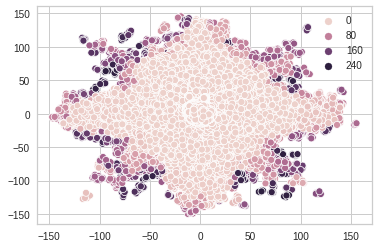

In [59]:
from cuml import DBSCAN as cumlDBSCAN

db_gpu = cumlDBSCAN(eps=3,max_mbytes_per_batch=4000)
pop_clusters_dbs = db_gpu.fit_predict(components_gpu)

print(f'found {len(np.unique(pop_clusters_dbs))} clusters')
# leave out points classified as noise
to_plot = components_gpu[np.where(pop_clusters_dbs != -1)]
clusts = pop_clusters_dbs[np.where(pop_clusters_dbs != -1)]
sns.scatterplot(x=to_plot[:,0],y=to_plot[:,1],hue = clusts)

One could imagine that in higher dimensions there would be a clearer seperation of clusters

## MCA

In [16]:
import joblib

In [ ]:
mca = joblib.load('mca.pkl')

In [14]:
azdias_mca,mca = fit_mca(population,exp_var_percent =  0.9,n_components = 100)
customers_mca = mca.transform(customers)

MCA PROCESS ELIMINATED 190  COLUMNS SINCE THEIR MISS_RATES >= 99%


The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
The SparseDataFrame class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version


In [17]:
joblib.dump(mca,'mca.pkl')

['mca.pkl']

## Kmeans clustering

https://towardsdatascience.com/how-to-cluster-in-high-dimensions-4ef693bacc6

In [36]:
from sklearn.cluster import MiniBatchKMeans as mbKMeans
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def get_kmeans_elbow(data,k = (2,30)):

    km = mbKMeans(random_state=1,batch_size=300)
    visualizer = KElbowVisualizer(km, k=k)
    visualizer.fit(data)        # Fit the data to the visualizer
    visualizer.show()   


def show_cluster_details(cluster_number,mca_weights = 10 , mca =None ,km=None ):
    '''
    given cluster number, pca object and kmeans object , retrieve the most influential PCA components
    '''
    cluster_makeup = pd.Series(km.cluster_centers_[cluster_number])
    cluster_makeup.index = cluster_makeup.index + 1
    cluster_makeup.sort_values(ascending=False, inplace=True)
    fig,ax=plt.subplots(ncols = 1 , figsize=(15,10) )
#     plt.tight_layout(w_pad = 1.5)
    
    top_n_cols = component_makeup(mca._usecols.tolist(),mca,cluster_makeup.index.tolist()[0],mca_weights,ax)
#     top_n_cols += component_makeup(pre_pca_columns,pca,cluster_makeup.index.tolist()[-1],pca_weights,ax[1])
    
    plt.show()
    
    return top_n_cols


def feat_explainer(feat_val):
    comp_explainer = list(zip(list(map(lambda x:"_".join( x.split('_')[:-1]),feat_val)),list(map(lambda x: x.split('_')[-1],feat_val))))
    for feature,value in comp_explainer:
   
    #     print(feature,'\t\t\t',dias_attr_mapping[feature]['mapping'][int(float(value))])abs
        print(f'{feature:25}\n{dias_attr_mapping[feature]["description"]}')
        try:
            print(f'{dias_attr_mapping[feature]["mapping"][int(float(value))]}')
        except KeyError:
            print(f'{int(float(value))}')
        print()

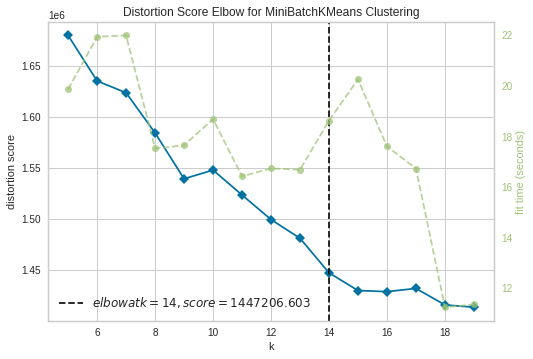

In [37]:
# Kmeans with PCA
get_kmeans_elbow(np.array(azdias_mca),k=(5,20))

In [80]:
km = mbKMeans(n_clusters=14,random_state=1,batch_size=300)
km.fit(azdias_mca)
pop_clusters = km.predict(azdias_mca)
cust_clusters = km.predict(customers_mca)

In [81]:
joblib.dump(km,'km.pkl')

['km.pkl']

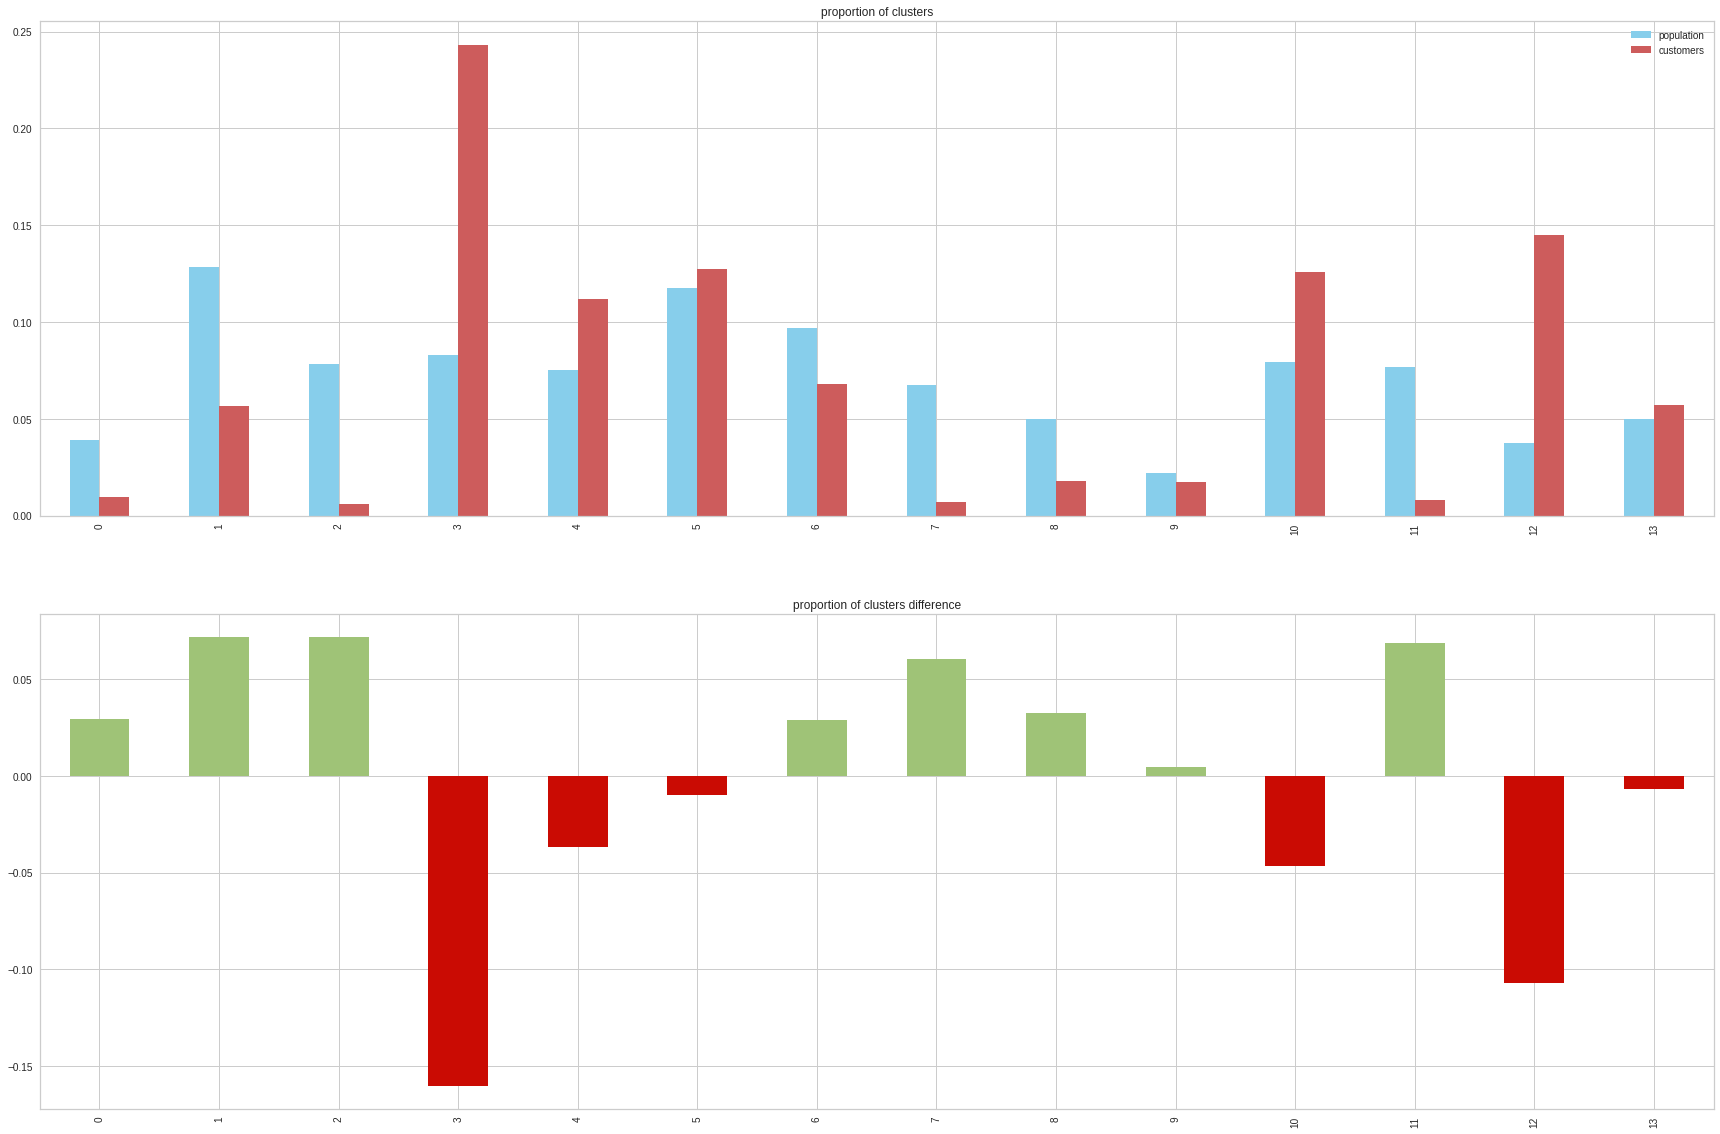

In [82]:
pop_series = pd.Series(pop_clusters).value_counts(normalize=True).sort_index()
cust_series = pd.Series(cust_clusters).value_counts(normalize=True).sort_index()
cluster_df = pd.DataFrame({'population':pop_series, 'customers':cust_series } )

fig,ax = plt.subplots(nrows=2,figsize = (30,20))

cluster_df.plot.bar(color=["SkyBlue","IndianRed"],ax=ax[0],title='proportion of clusters')
sign = (pop_series>cust_series)
(pop_series-cust_series).plot.bar(ax=ax[1],color = sign.map({True: 'g', False: 'r'}),title ='proportion of clusters difference')

# Who are customers

### Largest Customer Group

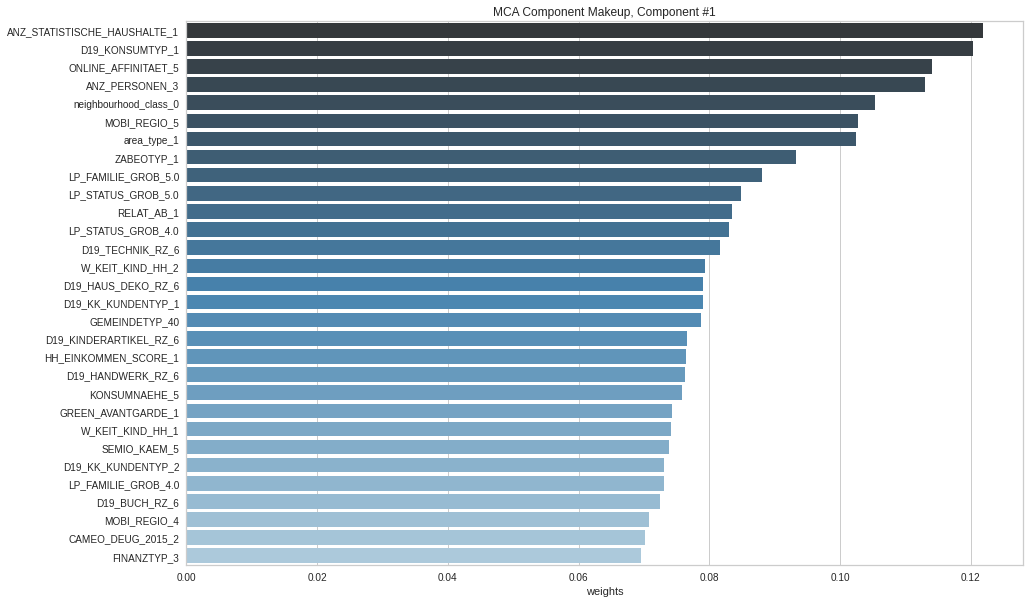

In [97]:
feat_val = show_cluster_details(3,mca_weights =30,mca= mca,km=km)
# features

In [84]:
features = list(map(lambda x:"_".join( x.split('_')[:-1]),feat_val))
lookUpAttr(azdias,features)

****************************************************************************************************
ANZ_STATISTISCHE_HAUSHALTE

Description:
 statistical calculation of known households in building
Mapping:
 {1: '1 household', 2: '2 to 3 households', 3: '4 to 8 households', 4: 'more than 8'}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
1    40.419237
2    19.808140
3    19.448726
4    20.323898
Name: ANZ_STATISTISCHE_HAUSHALTE, dtype: float64

Unique Values:
4
****************************************************************************************************
D19_KONSUMTYP

Description:
 consumption type 
Mapping:
 {1: 'Universal', 2: 'Versatile', 3: 'Gourmet', 4: 'Family', 5: 'Informed ', 6: 'Modern', 9: 'Inactive'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1    14.194278
2     7.288389
3     9.756730
4     7.670059
5     2.394094
6     5.908911
9    52.787538
Name: D19_KONSUMTYP, dtype: float64

Uniqu

In [98]:
feat_explainer(feat_val)   

ANZ_STATISTISCHE_HAUSHALTE
statistical calculation of known households in building
1 household

D19_KONSUMTYP            
consumption type 
Universal

ONLINE_AFFINITAET        
online affinity
highest  

ANZ_PERSONEN             
number of adult persons in the household
greater than 2 people

neighbourhood_class      
wealth status of neighbourhood
0

MOBI_REGIO               
moving patterns
very low mobility 

area_type                
type or area Urban/rural
Wealthy

ZABEOTYP                 
typification of energy consumers
green

LP_FAMILIE_GROB          
familytyp rough
multiperson household

LP_STATUS_GROB           
social status rough
top earners 

RELAT_AB                 
share of unemployed in relation to the county the community belongs to
very low

LP_STATUS_GROB           
social status rough
houseowners

D19_TECHNIK_RZ           
transactional activity based on the product group TECHNOLOGY  - on grid level -
Buyer > 24 months

W_KEIT_KIND_HH           
likelihood of a 

The largest customer group consists of buidlings with a single household ie. people to probably have their own homes, primarily universal consumtion type with very high online affinity. They tend to come from multi-person households or families. They have a very low mobility score this makes sense and ties up with the fact that they use the mail-order company. They live in wealthy neighborhoods, and are generally conservationists. Interesting to note the municiple type is type 40, since we have no exact defenition for this we would need to dig deeper, I did note that the lower values for municiple type seemed to be more urban areas, so based on that i will deduce that these people dont exactly stay in the city but rather a little bit away from the cities. They are in generally upperclass wealthy and family orientated individuals.

### Second Largest Customer Group

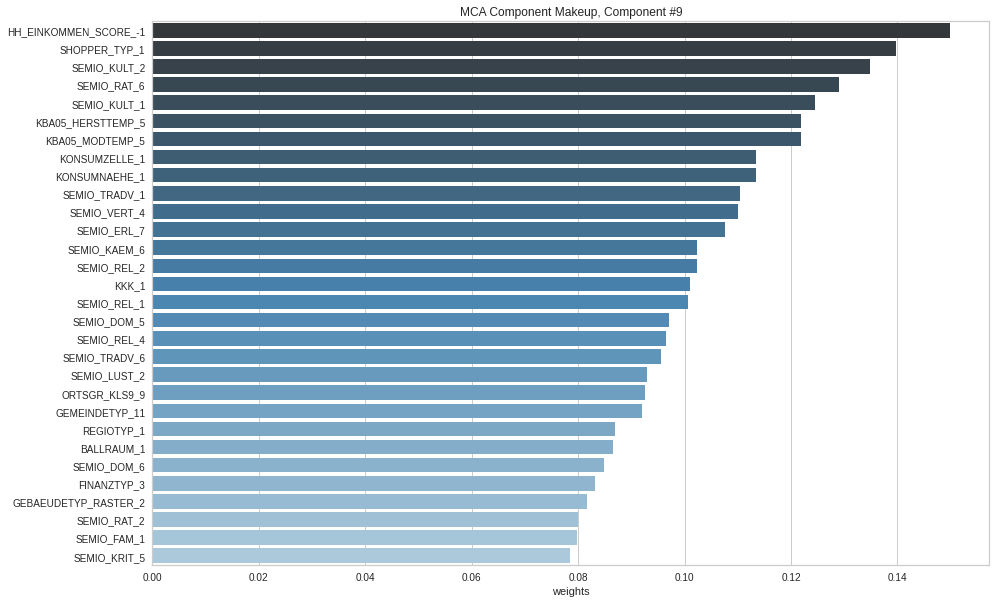

In [89]:
feat_val = show_cluster_details(12,mca_weights =30,mca= mca,km=km)


In [87]:
features = list(map(lambda x:"_".join( x.split('_')[:-1]),feat_val))
lookUpAttr(azdias,features)

****************************************************************************************************
HH_EINKOMMEN_SCORE

Description:
 estimated household net income 
Mapping:
 {'-1, 0': 'unknown', 1: 'highest income', 2: 'very high income', 3: 'high income', 4: 'average income', 5: 'lower income', 6: 'very low income'}
Additional Notes:
 ['modelled on different AZ DIAS data']
Info level:
 ['Household']

Column Summary
Value Counts Percentage
-1     1.968467
 1     7.680310
 2    19.483079
 3     9.903562
 4    15.462201
 5    20.815460
 6    24.686921
Name: HH_EINKOMMEN_SCORE, dtype: float64

Unique Values:
7
****************************************************************************************************
SHOPPER_TYP

Description:
 shopping typology
Mapping:
 {-1: 'unknown', 0: 'external supplied hedonists ', 1: 'Shopping-stressed', 2: 'family-shopper', 3: 'demanding shopper'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
-1    14.792686
 

Value Counts Percentage
1     4.950719
2    10.448409
3    13.597162
4    12.427496
5    20.301365
6    22.276204
7    15.998644
Name: SEMIO_DOM, dtype: float64

Unique Values:
7
****************************************************************************************************
SEMIO_REL

Description:
 affinity indicating in what way the person is religious
Mapping:
 {'-1, 9': 'unknown', 1: 'highest affinity', 2: 'very high affinity', 3: 'high affinity', 4: 'average affinity', 5: 'low affinity', 6: 'very low affinity', 7: 'lowest affinity'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1    11.896594
2     9.485877
3    16.933472
4    22.656119
5     8.893010
6     5.904109
7    24.230819
Name: SEMIO_REL, dtype: float64

Unique Values:
7
****************************************************************************************************
SEMIO_TRADV

Description:
 affinity indicating in what way the person is traditional minded
Mapping:
 {'-1,

In [90]:
feat_explainer(feat_val)

HH_EINKOMMEN_SCORE       
estimated household net income 
-1

SHOPPER_TYP              
shopping typology
Shopping-stressed

SEMIO_KULT               
affinity indicating in what way the person is cultural minded
very high affinity

SEMIO_RAT                
affinity indicating in what way the person is of a rational mind
very low affinity

SEMIO_KULT               
affinity indicating in what way the person is cultural minded
highest affinity

KBA05_HERSTTEMP          
development of the most common car manufacturers in the neighbourhood
new building

KBA05_MODTEMP            
development of the most common car segment in the neighbourhood
new building

KONSUMZELLE              
consumption celll
1

KONSUMNAEHE              
distance from a building to PoS (Point of Sale)
building is located in a 125 x 125m-grid cell (RA1), which is a consumption cell

SEMIO_TRADV              
affinity indicating in what way the person is traditional minded
highest affinity

SEMIO_VERT               

This group of people seem to be more reserved as they do not wish to divulge their houshold income information, they are culturaly minded and traditional yet have a low affinity to rationale. They are located within consumtion cells. They are religious and have a high purchasing power.There seems to be people who also have a low affinity to being traditional and a high affinity to being sensual , one could assume that these are younger people.These people are generally from municiple type 11 which according to the correlation woth community size says that these people are from urban areas , closer to cities. Their Finanz type is "main focus own house" and are in mixed cells with high bussines share, this also affirms that these people are close to cities but not city dwellers as such. They come from upper class neighbourhoods. They are also classfied as wealthy people but seemingly one wealth classification lower.   

### Third Largest Customer Group 

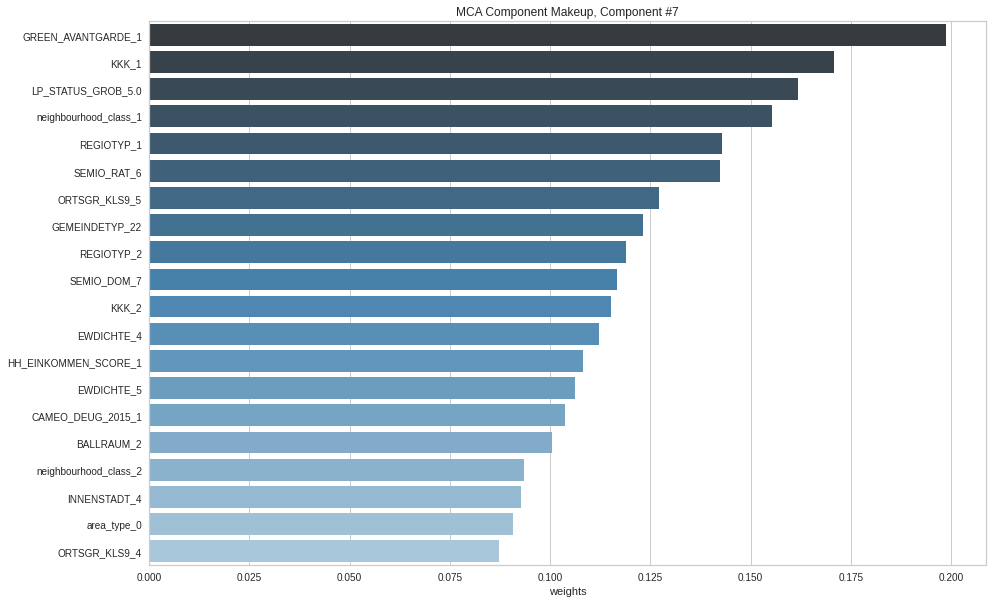

In [91]:
feat_val = show_cluster_details(10,mca_weights =20,mca= mca,km=km)


In [92]:
features = list(map(lambda x:"_".join( x.split('_')[:-1]),feat_val))
lookUpAttr(azdias,features)

****************************************************************************************************
GREEN_AVANTGARDE

Description:
 Green avantgarde,the environmental sustainability is the dominating movement in the youth of these consumers
Mapping:
 {0: "doesn't belong to the green avantgarde", 1: 'belongs to the green avantgarde'}
Additional Notes:
 ['own typology based on modelled on different AZ DIAS data ']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0    77.320147
1    22.679853
Name: GREEN_AVANTGARDE, dtype: float64

Unique Values:
2
****************************************************************************************************
KKK

Description:
 purchasing power
Mapping:
 {'-1, 0': 'unknown', 1: 'very high', 2: 'high', 3: 'average', 4: 'low'}
Additional Notes:
 ['modelled on different AZ DIAS data']
Info level:
 ['RR1_ID']

Column Summary
Value Counts Percentage
-1    20.143452
 1    11.895762
 2    20.461125
 3    28.975051
 4    18.524610
Name: KKK, 

Value Counts Percentage
-1    13.212537
 0    66.438354
 1    20.349108
Name: area_type, dtype: float64

Unique Values:
3
****************************************************************************************************
ORTSGR_KLS9

Description:
 size of the community '- classified number of inhabitants
Mapping:
 {'-1': 'unknown', 1: '<= 2.000 inhabitants', 2: '2.001 to 5.000 inhabitants', 3: '5.001 to 10.000 inhabitants', 4: '10.001 to 20.000 inhabitants', 5: '20.001 to 50.000 inhabitants', 6: '50.001 to 100.000 inhabitants', 7: '100.001 to 300.000 inhabitants', 8: '300.001 to 700.000 inhabitants', 9: '> 700.000  inhabitants'}
Additional Notes:
 [nan]
Info level:
 ['Community']

Column Summary
Value Counts Percentage
-1    13.638903
 0     0.005356
 1     4.249806
 2     7.002668
 3     9.196646
 4    12.747755
 5    16.330355
 6     8.260525
 7    11.287473
 8     7.740243
 9     9.540269
Name: ORTSGR_KLS9, dtype: float64

Unique Values:
11


In [93]:
feat_explainer(feat_val)

GREEN_AVANTGARDE         
Green avantgarde,the environmental sustainability is the dominating movement in the youth of these consumers
belongs to the green avantgarde

KKK                      
purchasing power
very high

LP_STATUS_GROB           
social status rough
top earners 

neighbourhood_class      
wealth status of neighbourhood
Wealthy

REGIOTYP                 
neighbourhood 
upper class

SEMIO_RAT                
affinity indicating in what way the person is of a rational mind
very low affinity

ORTSGR_KLS9              
size of the community '- classified number of inhabitants
20.001 to 50.000 inhabitants

GEMEINDETYP              
municipal type
22

REGIOTYP                 
neighbourhood 
conservatives

SEMIO_DOM                
affinity indicating in what way the person is dominant minded
lowest affinity

KKK                      
purchasing power
high

EWDICHTE                 
density of inhabitants per square kilometer
150 - 319 HH/km²

HH_EINKOMMEN_SCORE       
estim

This group seems to be rural/outskirt dwellers who are indifferent to conservation, with high religious affinity. They also seem to be foreign to assimilated names and not german nationals,they have hedonistic tendencies and tend to be more demand shopping orientated. Possible these people are vegabons living in industrial areas who can fend for themselves and live month to month or day to day.

# Who are customers not

### Smallest Customer Group 

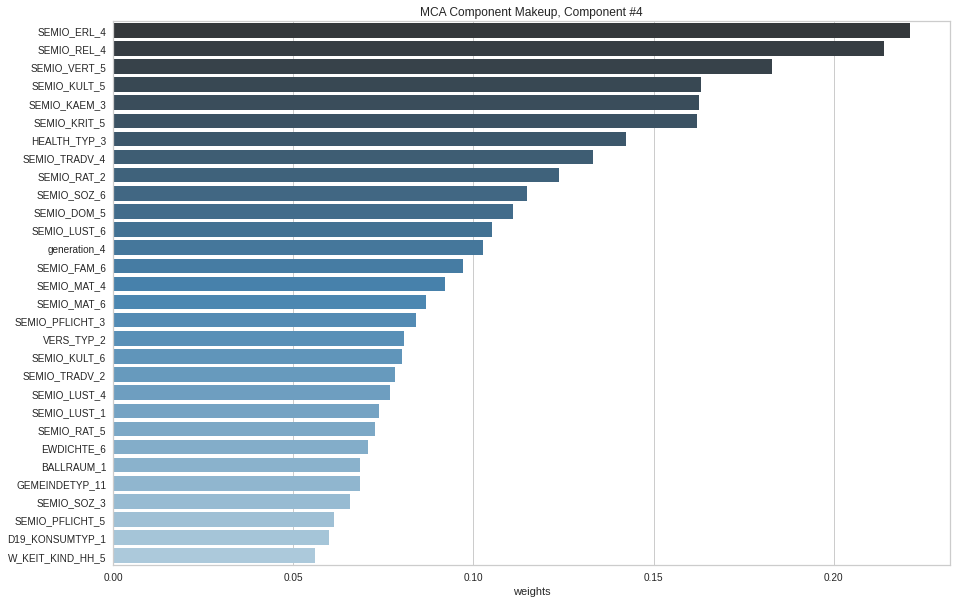

In [99]:
feat_val = show_cluster_details(1,mca_weights =30,mca= mca,km=km)


In [95]:
features = list(map(lambda x:"_".join( x.split('_')[:-1]),feat_val))
lookUpAttr(azdias,features)

****************************************************************************************************
SEMIO_ERL

Description:
 affinity indicating in what way the person is eventful orientated
Mapping:
 {'-1, 9': 'unknown', 1: 'highest affinity', 2: 'very high affinity', 3: 'high affinity', 4: 'average affinity', 5: 'low affinity', 6: 'very low affinity', 7: 'lowest affinity'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1     4.079703
2     7.360974
3    24.678702
4    21.487838
5     7.221253
6    14.254395
7    20.917134
Name: SEMIO_ERL, dtype: float64

Unique Values:
7
****************************************************************************************************
SEMIO_REL

Description:
 affinity indicating in what way the person is religious
Mapping:
 {'-1, 9': 'unknown', 1: 'highest affinity', 2: 'very high affinity', 3: 'high affinity', 4: 'average affinity', 5: 'low affinity', 6: 'very low affinity', 7: 'lowest affinity'}
Addition

In [100]:
feat_explainer(feat_val)

SEMIO_ERL                
affinity indicating in what way the person is eventful orientated
average affinity

SEMIO_REL                
affinity indicating in what way the person is religious
average affinity

SEMIO_VERT               
affinity indicating in what way the person is dreamily
low affinity

SEMIO_KULT               
affinity indicating in what way the person is cultural minded
low affinity

SEMIO_KAEM               
affinity indicating in what way the person is of a fightfull attitude
high affinity

SEMIO_KRIT               
affinity indicating in what way the person is critical minded
low affinity

HEALTH_TYP               
health typology
jaunty hedonists 

SEMIO_TRADV              
affinity indicating in what way the person is traditional minded
average affinity

SEMIO_RAT                
affinity indicating in what way the person is of a rational mind
very high affinity

SEMIO_SOZ                
affinity indicating in what way the person is social minded
very low affi

These people are in the age group of 65-55 , are described as being fightful , jaunty hedonists and rationally minded people. They tend have a low affinity to social mindedness. They are unlikely to have a child present in their household. 

### Second Smallest Customer Group

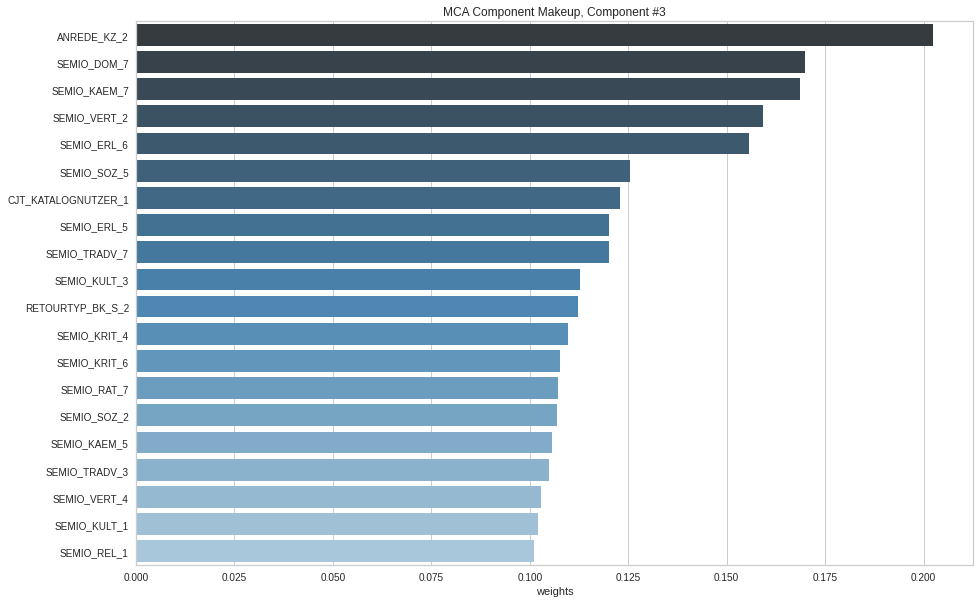

In [101]:
feat_val = show_cluster_details(2,mca_weights =20,mca= mca,km=km)


In [102]:
features = list(map(lambda x:"_".join( x.split('_')[:-1]),feat_val))
lookUpAttr(azdias,features)

****************************************************************************************************
ANREDE_KZ

Description:
 gender
Mapping:
 {'-1, 0': 'unknown', 1: 'male', 2: 'female'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1    50.368233
2    49.631767
Name: ANREDE_KZ, dtype: float64

Unique Values:
2
****************************************************************************************************
SEMIO_DOM

Description:
 affinity indicating in what way the person is dominant minded
Mapping:
 {'-1, 9': 'unknown', 1: 'highest affinity', 2: 'very high affinity', 3: 'high affinity', 4: 'average affinity', 5: 'low affinity', 6: 'very low affinity', 7: 'lowest affinity'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1     4.950719
2    10.448409
3    13.597162
4    12.427496
5    20.301365
6    22.276204
7    15.998644
Name: SEMIO_DOM, dtype: float64

Unique Values:
7
************************

In [103]:
feat_explainer(feat_val)

ANREDE_KZ                
gender
female

SEMIO_DOM                
affinity indicating in what way the person is dominant minded
lowest affinity

SEMIO_KAEM               
affinity indicating in what way the person is of a fightfull attitude
lowest affinity

SEMIO_VERT               
affinity indicating in what way the person is dreamily
very high affinity

SEMIO_ERL                
affinity indicating in what way the person is eventful orientated
very low affinity

SEMIO_SOZ                
affinity indicating in what way the person is social minded
low affinity

CJT_KATALOGNUTZER        
catalogue users
1

SEMIO_ERL                
affinity indicating in what way the person is eventful orientated
low affinity

SEMIO_TRADV              
affinity indicating in what way the person is traditional minded
lowest affinity

SEMIO_KULT               
affinity indicating in what way the person is cultural minded
high affinity

RETOURTYP_BK_S           
return type
demanding Heavy-Returner

SEM

This group is described as being females,they rarely use catalogues and have low affinity to tradition. They are demanding heavy returners, probably why they dont use the mail order company or is this trait just a consequence of femininess,a generalisation. they have low affinity to being critical and rational minded.

In [56]:
cat_cols=pd.read_pickle('cat_cols.pkl')
azdias[cat_cols] = azdias[cat_cols].astype(int).astype('category')
params = {'iterations':2000}
_ = run_cb_classifier(azdias.drop(['customer_identifier'],axis=1),azdias.customer_identifier,shap=False,params=params)

Learning rate set to 0.117996
0:	learn: 0.8916852	test: 0.8908885	best: 0.8908885 (0)	total: 72.2ms	remaining: 2m 24s
1:	learn: 0.8957222	test: 0.8955785	best: 0.8955785 (1)	total: 146ms	remaining: 2m 25s
2:	learn: 0.8986658	test: 0.8984334	best: 0.8984334 (2)	total: 213ms	remaining: 2m 21s
3:	learn: 0.8998348	test: 0.8996562	best: 0.8996562 (3)	total: 285ms	remaining: 2m 22s
4:	learn: 0.9024027	test: 0.9021785	best: 0.9021785 (4)	total: 345ms	remaining: 2m 17s
5:	learn: 0.9074047	test: 0.9074697	best: 0.9074697 (5)	total: 403ms	remaining: 2m 13s
6:	learn: 0.9093244	test: 0.9092926	best: 0.9092926 (6)	total: 462ms	remaining: 2m 11s
7:	learn: 0.9115883	test: 0.9118868	best: 0.9118868 (7)	total: 541ms	remaining: 2m 14s
8:	learn: 0.9122694	test: 0.9127137	best: 0.9127137 (8)	total: 614ms	remaining: 2m 15s
9:	learn: 0.9132955	test: 0.9137627	best: 0.9137627 (9)	total: 682ms	remaining: 2m 15s
10:	learn: 0.9145371	test: 0.9149427	best: 0.9149427 (10)	total: 741ms	remaining: 2m 13s
11:	learn:

95:	learn: 0.9319021	test: 0.9316294	best: 0.9316294 (95)	total: 5.99s	remaining: 1m 58s
96:	learn: 0.9319707	test: 0.9316922	best: 0.9316922 (96)	total: 6.05s	remaining: 1m 58s
97:	learn: 0.9320080	test: 0.9317238	best: 0.9317238 (97)	total: 6.12s	remaining: 1m 58s
98:	learn: 0.9320484	test: 0.9317603	best: 0.9317603 (98)	total: 6.18s	remaining: 1m 58s
99:	learn: 0.9321045	test: 0.9318184	best: 0.9318184 (99)	total: 6.25s	remaining: 1m 58s
100:	learn: 0.9321982	test: 0.9319101	best: 0.9319101 (100)	total: 6.32s	remaining: 1m 58s
101:	learn: 0.9322927	test: 0.9320121	best: 0.9320121 (101)	total: 6.37s	remaining: 1m 58s
102:	learn: 0.9323258	test: 0.9320449	best: 0.9320449 (102)	total: 6.42s	remaining: 1m 58s
103:	learn: 0.9323549	test: 0.9320628	best: 0.9320628 (103)	total: 6.49s	remaining: 1m 58s
104:	learn: 0.9323803	test: 0.9320788	best: 0.9320788 (104)	total: 6.59s	remaining: 1m 58s
105:	learn: 0.9324168	test: 0.9321058	best: 0.9321058 (105)	total: 6.64s	remaining: 1m 58s
106:	lear

186:	learn: 0.9353670	test: 0.9347330	best: 0.9347330 (186)	total: 11.2s	remaining: 1m 48s
187:	learn: 0.9353869	test: 0.9347448	best: 0.9347448 (187)	total: 11.3s	remaining: 1m 48s
188:	learn: 0.9353994	test: 0.9347568	best: 0.9347568 (188)	total: 11.3s	remaining: 1m 48s
189:	learn: 0.9354324	test: 0.9347822	best: 0.9347822 (189)	total: 11.4s	remaining: 1m 48s
190:	learn: 0.9354685	test: 0.9348142	best: 0.9348142 (190)	total: 11.4s	remaining: 1m 48s
191:	learn: 0.9354851	test: 0.9348195	best: 0.9348195 (191)	total: 11.5s	remaining: 1m 48s
192:	learn: 0.9355008	test: 0.9348319	best: 0.9348319 (192)	total: 11.6s	remaining: 1m 48s
193:	learn: 0.9355181	test: 0.9348494	best: 0.9348494 (193)	total: 11.6s	remaining: 1m 48s
194:	learn: 0.9355469	test: 0.9348778	best: 0.9348778 (194)	total: 11.7s	remaining: 1m 47s
195:	learn: 0.9355853	test: 0.9349113	best: 0.9349113 (195)	total: 11.7s	remaining: 1m 47s
196:	learn: 0.9356137	test: 0.9349359	best: 0.9349359 (196)	total: 11.8s	remaining: 1m 47s

278:	learn: 0.9370691	test: 0.9359952	best: 0.9359952 (278)	total: 16.4s	remaining: 1m 41s
279:	learn: 0.9371395	test: 0.9360574	best: 0.9360574 (279)	total: 16.4s	remaining: 1m 41s
280:	learn: 0.9371881	test: 0.9361170	best: 0.9361170 (280)	total: 16.5s	remaining: 1m 40s
281:	learn: 0.9371964	test: 0.9361204	best: 0.9361204 (281)	total: 16.6s	remaining: 1m 40s
282:	learn: 0.9372040	test: 0.9361227	best: 0.9361227 (282)	total: 16.6s	remaining: 1m 40s
283:	learn: 0.9372155	test: 0.9361303	best: 0.9361303 (283)	total: 16.7s	remaining: 1m 40s
284:	learn: 0.9372312	test: 0.9361402	best: 0.9361402 (284)	total: 16.7s	remaining: 1m 40s
285:	learn: 0.9372450	test: 0.9361449	best: 0.9361449 (285)	total: 16.8s	remaining: 1m 40s
286:	learn: 0.9372531	test: 0.9361460	best: 0.9361460 (286)	total: 16.8s	remaining: 1m 40s
287:	learn: 0.9372604	test: 0.9361472	best: 0.9361472 (287)	total: 16.9s	remaining: 1m 40s
288:	learn: 0.9372854	test: 0.9361664	best: 0.9361664 (288)	total: 16.9s	remaining: 1m 40s

370:	learn: 0.9383876	test: 0.9368728	best: 0.9368728 (370)	total: 21.6s	remaining: 1m 34s
371:	learn: 0.9383987	test: 0.9368762	best: 0.9368762 (371)	total: 21.7s	remaining: 1m 34s
372:	learn: 0.9384134	test: 0.9368929	best: 0.9368929 (372)	total: 21.7s	remaining: 1m 34s
373:	learn: 0.9384237	test: 0.9368957	best: 0.9368957 (373)	total: 21.8s	remaining: 1m 34s
374:	learn: 0.9384462	test: 0.9369174	best: 0.9369174 (374)	total: 21.9s	remaining: 1m 34s
375:	learn: 0.9384598	test: 0.9369217	best: 0.9369217 (375)	total: 21.9s	remaining: 1m 34s
376:	learn: 0.9384762	test: 0.9369334	best: 0.9369334 (376)	total: 22s	remaining: 1m 34s
377:	learn: 0.9384879	test: 0.9369359	best: 0.9369359 (377)	total: 22s	remaining: 1m 34s
378:	learn: 0.9385111	test: 0.9369506	best: 0.9369506 (378)	total: 22.1s	remaining: 1m 34s
379:	learn: 0.9385243	test: 0.9369579	best: 0.9369579 (379)	total: 22.1s	remaining: 1m 34s
380:	learn: 0.9385367	test: 0.9369622	best: 0.9369622 (380)	total: 22.2s	remaining: 1m 34s
381

462:	learn: 0.9393727	test: 0.9374018	best: 0.9374018 (462)	total: 26.8s	remaining: 1m 29s
463:	learn: 0.9393765	test: 0.9374024	best: 0.9374024 (463)	total: 26.9s	remaining: 1m 29s
464:	learn: 0.9393877	test: 0.9374069	best: 0.9374069 (464)	total: 27s	remaining: 1m 29s
465:	learn: 0.9393951	test: 0.9374088	best: 0.9374088 (465)	total: 27s	remaining: 1m 28s
466:	learn: 0.9394036	test: 0.9374093	best: 0.9374093 (466)	total: 27.1s	remaining: 1m 28s
467:	learn: 0.9394084	test: 0.9374117	best: 0.9374117 (467)	total: 27.1s	remaining: 1m 28s
468:	learn: 0.9394239	test: 0.9374200	best: 0.9374200 (468)	total: 27.2s	remaining: 1m 28s
469:	learn: 0.9394418	test: 0.9374253	best: 0.9374253 (469)	total: 27.2s	remaining: 1m 28s
470:	learn: 0.9394520	test: 0.9374315	best: 0.9374315 (470)	total: 27.3s	remaining: 1m 28s
471:	learn: 0.9394572	test: 0.9374333	best: 0.9374333 (471)	total: 27.4s	remaining: 1m 28s
472:	learn: 0.9394677	test: 0.9374375	best: 0.9374375 (472)	total: 27.4s	remaining: 1m 28s
473

554:	learn: 0.9402853	test: 0.9378387	best: 0.9378387 (554)	total: 32.2s	remaining: 1m 23s
555:	learn: 0.9402927	test: 0.9378383	best: 0.9378387 (554)	total: 32.2s	remaining: 1m 23s
556:	learn: 0.9403064	test: 0.9378513	best: 0.9378513 (556)	total: 32.3s	remaining: 1m 23s
557:	learn: 0.9403156	test: 0.9378588	best: 0.9378588 (557)	total: 32.3s	remaining: 1m 23s
558:	learn: 0.9403232	test: 0.9378617	best: 0.9378617 (558)	total: 32.4s	remaining: 1m 23s
559:	learn: 0.9403290	test: 0.9378613	best: 0.9378617 (558)	total: 32.5s	remaining: 1m 23s
560:	learn: 0.9403373	test: 0.9378657	best: 0.9378657 (560)	total: 32.5s	remaining: 1m 23s
561:	learn: 0.9403438	test: 0.9378709	best: 0.9378709 (561)	total: 32.6s	remaining: 1m 23s
562:	learn: 0.9403517	test: 0.9378748	best: 0.9378748 (562)	total: 32.6s	remaining: 1m 23s
563:	learn: 0.9403586	test: 0.9378806	best: 0.9378806 (563)	total: 32.7s	remaining: 1m 23s
564:	learn: 0.9403672	test: 0.9378821	best: 0.9378821 (564)	total: 32.8s	remaining: 1m 23s

646:	learn: 0.9409652	test: 0.9380917	best: 0.9380934 (645)	total: 37.5s	remaining: 1m 18s
647:	learn: 0.9409702	test: 0.9380902	best: 0.9380934 (645)	total: 37.6s	remaining: 1m 18s
648:	learn: 0.9409781	test: 0.9380919	best: 0.9380934 (645)	total: 37.6s	remaining: 1m 18s
649:	learn: 0.9409837	test: 0.9380923	best: 0.9380934 (645)	total: 37.7s	remaining: 1m 18s
650:	learn: 0.9409907	test: 0.9380920	best: 0.9380934 (645)	total: 37.7s	remaining: 1m 18s
651:	learn: 0.9409952	test: 0.9380925	best: 0.9380934 (645)	total: 37.8s	remaining: 1m 18s
652:	learn: 0.9410031	test: 0.9380952	best: 0.9380952 (652)	total: 37.8s	remaining: 1m 18s
653:	learn: 0.9410106	test: 0.9380942	best: 0.9380952 (652)	total: 37.9s	remaining: 1m 17s
654:	learn: 0.9410263	test: 0.9381039	best: 0.9381039 (654)	total: 38s	remaining: 1m 17s
655:	learn: 0.9410312	test: 0.9381058	best: 0.9381058 (655)	total: 38s	remaining: 1m 17s
656:	learn: 0.9410406	test: 0.9381128	best: 0.9381128 (656)	total: 38.1s	remaining: 1m 17s
657

738:	learn: 0.9416494	test: 0.9383446	best: 0.9383446 (738)	total: 42.8s	remaining: 1m 13s
739:	learn: 0.9416584	test: 0.9383483	best: 0.9383483 (739)	total: 42.9s	remaining: 1m 13s
740:	learn: 0.9416643	test: 0.9383497	best: 0.9383497 (740)	total: 42.9s	remaining: 1m 12s
741:	learn: 0.9416726	test: 0.9383518	best: 0.9383518 (741)	total: 43s	remaining: 1m 12s
742:	learn: 0.9416783	test: 0.9383510	best: 0.9383518 (741)	total: 43.1s	remaining: 1m 12s
743:	learn: 0.9416879	test: 0.9383571	best: 0.9383571 (743)	total: 43.1s	remaining: 1m 12s
744:	learn: 0.9416934	test: 0.9383566	best: 0.9383571 (743)	total: 43.2s	remaining: 1m 12s
745:	learn: 0.9416990	test: 0.9383575	best: 0.9383575 (745)	total: 43.2s	remaining: 1m 12s
746:	learn: 0.9417056	test: 0.9383603	best: 0.9383603 (746)	total: 43.3s	remaining: 1m 12s
747:	learn: 0.9417093	test: 0.9383606	best: 0.9383606 (747)	total: 43.3s	remaining: 1m 12s
748:	learn: 0.9417156	test: 0.9383613	best: 0.9383613 (748)	total: 43.4s	remaining: 1m 12s
7

830:	learn: 0.9422424	test: 0.9384925	best: 0.9384925 (830)	total: 48.1s	remaining: 1m 7s
831:	learn: 0.9422435	test: 0.9384930	best: 0.9384930 (831)	total: 48.2s	remaining: 1m 7s
832:	learn: 0.9422494	test: 0.9384933	best: 0.9384933 (832)	total: 48.3s	remaining: 1m 7s
833:	learn: 0.9422576	test: 0.9384953	best: 0.9384953 (833)	total: 48.3s	remaining: 1m 7s
834:	learn: 0.9422658	test: 0.9384976	best: 0.9384976 (834)	total: 48.4s	remaining: 1m 7s
835:	learn: 0.9422725	test: 0.9384998	best: 0.9384998 (835)	total: 48.4s	remaining: 1m 7s
836:	learn: 0.9422784	test: 0.9384978	best: 0.9384998 (835)	total: 48.5s	remaining: 1m 7s
837:	learn: 0.9422852	test: 0.9384965	best: 0.9384998 (835)	total: 48.5s	remaining: 1m 7s
838:	learn: 0.9422908	test: 0.9384962	best: 0.9384998 (835)	total: 48.6s	remaining: 1m 7s
839:	learn: 0.9422960	test: 0.9384965	best: 0.9384998 (835)	total: 48.6s	remaining: 1m 7s
840:	learn: 0.9423016	test: 0.9384954	best: 0.9384998 (835)	total: 48.7s	remaining: 1m 7s
841:	learn

922:	learn: 0.9428127	test: 0.9386285	best: 0.9386305 (917)	total: 53.5s	remaining: 1m 2s
923:	learn: 0.9428204	test: 0.9386271	best: 0.9386305 (917)	total: 53.5s	remaining: 1m 2s
924:	learn: 0.9428222	test: 0.9386271	best: 0.9386305 (917)	total: 53.6s	remaining: 1m 2s
925:	learn: 0.9428291	test: 0.9386277	best: 0.9386305 (917)	total: 53.6s	remaining: 1m 2s
926:	learn: 0.9428332	test: 0.9386282	best: 0.9386305 (917)	total: 53.7s	remaining: 1m 2s
927:	learn: 0.9428402	test: 0.9386307	best: 0.9386307 (927)	total: 53.7s	remaining: 1m 2s
928:	learn: 0.9428469	test: 0.9386322	best: 0.9386322 (928)	total: 53.8s	remaining: 1m 2s
929:	learn: 0.9428533	test: 0.9386336	best: 0.9386336 (929)	total: 53.8s	remaining: 1m 1s
930:	learn: 0.9428576	test: 0.9386320	best: 0.9386336 (929)	total: 53.9s	remaining: 1m 1s
931:	learn: 0.9428645	test: 0.9386322	best: 0.9386336 (929)	total: 54s	remaining: 1m 1s
932:	learn: 0.9428719	test: 0.9386351	best: 0.9386351 (932)	total: 54s	remaining: 1m 1s
933:	learn: 0.

1014:	learn: 0.9433691	test: 0.9387428	best: 0.9387434 (1013)	total: 58.8s	remaining: 57s
1015:	learn: 0.9433792	test: 0.9387518	best: 0.9387518 (1015)	total: 58.8s	remaining: 57s
1016:	learn: 0.9433861	test: 0.9387547	best: 0.9387547 (1016)	total: 58.9s	remaining: 56.9s
1017:	learn: 0.9433890	test: 0.9387548	best: 0.9387548 (1017)	total: 58.9s	remaining: 56.9s
1018:	learn: 0.9433945	test: 0.9387560	best: 0.9387560 (1018)	total: 59s	remaining: 56.8s
1019:	learn: 0.9433985	test: 0.9387574	best: 0.9387574 (1019)	total: 59.1s	remaining: 56.7s
1020:	learn: 0.9434076	test: 0.9387626	best: 0.9387626 (1020)	total: 59.1s	remaining: 56.7s
1021:	learn: 0.9434102	test: 0.9387646	best: 0.9387646 (1021)	total: 59.2s	remaining: 56.6s
1022:	learn: 0.9434160	test: 0.9387670	best: 0.9387670 (1022)	total: 59.2s	remaining: 56.6s
1023:	learn: 0.9434235	test: 0.9387673	best: 0.9387673 (1023)	total: 59.3s	remaining: 56.5s
1024:	learn: 0.9434281	test: 0.9387711	best: 0.9387711 (1024)	total: 59.3s	remaining: 

1106:	learn: 0.9439238	test: 0.9388735	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.7s
1107:	learn: 0.9439307	test: 0.9388736	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.6s
1108:	learn: 0.9439343	test: 0.9388729	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.6s
1109:	learn: 0.9439415	test: 0.9388705	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.5s
1110:	learn: 0.9439527	test: 0.9388737	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.4s
1111:	learn: 0.9439575	test: 0.9388753	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.4s
1112:	learn: 0.9439611	test: 0.9388745	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.3s
1113:	learn: 0.9439664	test: 0.9388742	best: 0.9388753 (1104)	total: 1m 4s	remaining: 51.3s
1114:	learn: 0.9439763	test: 0.9388771	best: 0.9388771 (1114)	total: 1m 4s	remaining: 51.2s
1115:	learn: 0.9439849	test: 0.9388752	best: 0.9388771 (1114)	total: 1m 4s	remaining: 51.1s
1116:	learn: 0.9439923	test: 0.9388758	best: 0.9388771 (1114)	total: 1m 4s	remai

1197:	learn: 0.9444088	test: 0.9389425	best: 0.9389448 (1196)	total: 1m 9s	remaining: 46.4s
1198:	learn: 0.9444140	test: 0.9389427	best: 0.9389448 (1196)	total: 1m 9s	remaining: 46.4s
1199:	learn: 0.9444248	test: 0.9389498	best: 0.9389498 (1199)	total: 1m 9s	remaining: 46.3s
1200:	learn: 0.9444290	test: 0.9389507	best: 0.9389507 (1200)	total: 1m 9s	remaining: 46.3s
1201:	learn: 0.9444335	test: 0.9389520	best: 0.9389520 (1201)	total: 1m 9s	remaining: 46.2s
1202:	learn: 0.9444365	test: 0.9389521	best: 0.9389521 (1202)	total: 1m 9s	remaining: 46.2s
1203:	learn: 0.9444416	test: 0.9389521	best: 0.9389521 (1202)	total: 1m 9s	remaining: 46.1s
1204:	learn: 0.9444489	test: 0.9389530	best: 0.9389530 (1204)	total: 1m 9s	remaining: 46.1s
1205:	learn: 0.9444527	test: 0.9389537	best: 0.9389537 (1205)	total: 1m 9s	remaining: 46s
1206:	learn: 0.9444582	test: 0.9389575	best: 0.9389575 (1206)	total: 1m 9s	remaining: 46s
1207:	learn: 0.9444653	test: 0.9389587	best: 0.9389587 (1207)	total: 1m 10s	remainin

1286:	learn: 0.9448653	test: 0.9390075	best: 0.9390075 (1286)	total: 1m 14s	remaining: 41.5s
1287:	learn: 0.9448693	test: 0.9390075	best: 0.9390075 (1286)	total: 1m 14s	remaining: 41.4s
1288:	learn: 0.9448721	test: 0.9390066	best: 0.9390075 (1286)	total: 1m 15s	remaining: 41.4s
1289:	learn: 0.9448777	test: 0.9390033	best: 0.9390075 (1286)	total: 1m 15s	remaining: 41.3s
1290:	learn: 0.9448853	test: 0.9390072	best: 0.9390075 (1286)	total: 1m 15s	remaining: 41.3s
1291:	learn: 0.9448888	test: 0.9390076	best: 0.9390076 (1291)	total: 1m 15s	remaining: 41.2s
1292:	learn: 0.9448936	test: 0.9390082	best: 0.9390082 (1292)	total: 1m 15s	remaining: 41.2s
1293:	learn: 0.9448986	test: 0.9390085	best: 0.9390085 (1293)	total: 1m 15s	remaining: 41.1s
1294:	learn: 0.9449041	test: 0.9390093	best: 0.9390093 (1294)	total: 1m 15s	remaining: 41s
1295:	learn: 0.9449089	test: 0.9390116	best: 0.9390116 (1295)	total: 1m 15s	remaining: 41s
1296:	learn: 0.9449149	test: 0.9390140	best: 0.9390140 (1296)	total: 1m 15

1376:	learn: 0.9453211	test: 0.9390406	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36.3s
1377:	learn: 0.9453236	test: 0.9390407	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36.3s
1378:	learn: 0.9453261	test: 0.9390412	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36.2s
1379:	learn: 0.9453327	test: 0.9390440	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36.1s
1380:	learn: 0.9453359	test: 0.9390426	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36.1s
1381:	learn: 0.9453403	test: 0.9390447	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36s
1382:	learn: 0.9453448	test: 0.9390451	best: 0.9390512 (1348)	total: 1m 20s	remaining: 36s
1383:	learn: 0.9453489	test: 0.9390454	best: 0.9390512 (1348)	total: 1m 20s	remaining: 35.9s
1384:	learn: 0.9453526	test: 0.9390466	best: 0.9390512 (1348)	total: 1m 20s	remaining: 35.9s
1385:	learn: 0.9453575	test: 0.9390458	best: 0.9390512 (1348)	total: 1m 20s	remaining: 35.8s
1386:	learn: 0.9453619	test: 0.9390455	best: 0.9390512 (1348)	total: 1m 20

1468:	learn: 0.9457673	test: 0.9391065	best: 0.9391065 (1468)	total: 1m 25s	remaining: 30.9s
1469:	learn: 0.9457710	test: 0.9391087	best: 0.9391087 (1469)	total: 1m 25s	remaining: 30.9s
1470:	learn: 0.9457748	test: 0.9391065	best: 0.9391087 (1469)	total: 1m 25s	remaining: 30.8s
1471:	learn: 0.9457770	test: 0.9391057	best: 0.9391087 (1469)	total: 1m 25s	remaining: 30.8s
1472:	learn: 0.9457814	test: 0.9391074	best: 0.9391087 (1469)	total: 1m 25s	remaining: 30.7s
1473:	learn: 0.9457994	test: 0.9391258	best: 0.9391258 (1473)	total: 1m 25s	remaining: 30.6s
1474:	learn: 0.9458030	test: 0.9391270	best: 0.9391270 (1474)	total: 1m 25s	remaining: 30.6s
1475:	learn: 0.9458075	test: 0.9391292	best: 0.9391292 (1475)	total: 1m 26s	remaining: 30.5s
1476:	learn: 0.9458119	test: 0.9391296	best: 0.9391296 (1476)	total: 1m 26s	remaining: 30.5s
1477:	learn: 0.9458181	test: 0.9391271	best: 0.9391296 (1476)	total: 1m 26s	remaining: 30.4s
1478:	learn: 0.9458223	test: 0.9391299	best: 0.9391299 (1478)	total: 1

1560:	learn: 0.9462177	test: 0.9391547	best: 0.9391547 (1560)	total: 1m 30s	remaining: 25.6s
1561:	learn: 0.9462196	test: 0.9391569	best: 0.9391569 (1561)	total: 1m 31s	remaining: 25.5s
1562:	learn: 0.9462225	test: 0.9391574	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.5s
1563:	learn: 0.9462270	test: 0.9391555	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.4s
1564:	learn: 0.9462322	test: 0.9391536	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.4s
1565:	learn: 0.9462375	test: 0.9391514	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.3s
1566:	learn: 0.9462447	test: 0.9391558	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.2s
1567:	learn: 0.9462482	test: 0.9391569	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.2s
1568:	learn: 0.9462548	test: 0.9391563	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.1s
1569:	learn: 0.9462560	test: 0.9391574	best: 0.9391574 (1562)	total: 1m 31s	remaining: 25.1s
1570:	learn: 0.9462598	test: 0.9391568	best: 0.9391574 (1562)	total: 1

1652:	learn: 0.9466577	test: 0.9392467	best: 0.9392467 (1652)	total: 1m 36s	remaining: 20.2s
1653:	learn: 0.9466634	test: 0.9392473	best: 0.9392473 (1653)	total: 1m 36s	remaining: 20.2s
1654:	learn: 0.9466687	test: 0.9392489	best: 0.9392489 (1654)	total: 1m 36s	remaining: 20.1s
1655:	learn: 0.9466719	test: 0.9392490	best: 0.9392490 (1655)	total: 1m 36s	remaining: 20.1s
1656:	learn: 0.9466744	test: 0.9392506	best: 0.9392506 (1656)	total: 1m 36s	remaining: 20s
1657:	learn: 0.9466763	test: 0.9392511	best: 0.9392511 (1657)	total: 1m 36s	remaining: 19.9s
1658:	learn: 0.9466816	test: 0.9392534	best: 0.9392534 (1658)	total: 1m 36s	remaining: 19.9s
1659:	learn: 0.9466872	test: 0.9392548	best: 0.9392548 (1659)	total: 1m 36s	remaining: 19.8s
1660:	learn: 0.9466923	test: 0.9392562	best: 0.9392562 (1660)	total: 1m 36s	remaining: 19.8s
1661:	learn: 0.9467010	test: 0.9392598	best: 0.9392598 (1661)	total: 1m 36s	remaining: 19.7s
1662:	learn: 0.9467063	test: 0.9392599	best: 0.9392599 (1662)	total: 1m 

1744:	learn: 0.9470726	test: 0.9393040	best: 0.9393043 (1743)	total: 1m 41s	remaining: 14.9s
1745:	learn: 0.9470786	test: 0.9393048	best: 0.9393048 (1745)	total: 1m 41s	remaining: 14.8s
1746:	learn: 0.9470840	test: 0.9393095	best: 0.9393095 (1746)	total: 1m 41s	remaining: 14.7s
1747:	learn: 0.9470892	test: 0.9393115	best: 0.9393115 (1747)	total: 1m 41s	remaining: 14.7s
1748:	learn: 0.9470946	test: 0.9393125	best: 0.9393125 (1748)	total: 1m 41s	remaining: 14.6s
1749:	learn: 0.9470975	test: 0.9393112	best: 0.9393125 (1748)	total: 1m 41s	remaining: 14.6s
1750:	learn: 0.9471034	test: 0.9393137	best: 0.9393137 (1750)	total: 1m 42s	remaining: 14.5s
1751:	learn: 0.9471114	test: 0.9393159	best: 0.9393159 (1751)	total: 1m 42s	remaining: 14.4s
1752:	learn: 0.9471164	test: 0.9393175	best: 0.9393175 (1752)	total: 1m 42s	remaining: 14.4s
1753:	learn: 0.9471203	test: 0.9393168	best: 0.9393175 (1752)	total: 1m 42s	remaining: 14.3s
1754:	learn: 0.9471261	test: 0.9393157	best: 0.9393175 (1752)	total: 1

1836:	learn: 0.9474766	test: 0.9393419	best: 0.9393444 (1818)	total: 1m 47s	remaining: 9.5s
1837:	learn: 0.9474780	test: 0.9393421	best: 0.9393444 (1818)	total: 1m 47s	remaining: 9.44s
1838:	learn: 0.9474813	test: 0.9393423	best: 0.9393444 (1818)	total: 1m 47s	remaining: 9.38s
1839:	learn: 0.9474841	test: 0.9393433	best: 0.9393444 (1818)	total: 1m 47s	remaining: 9.33s
1840:	learn: 0.9474890	test: 0.9393442	best: 0.9393444 (1818)	total: 1m 47s	remaining: 9.27s
1841:	learn: 0.9474952	test: 0.9393486	best: 0.9393486 (1841)	total: 1m 47s	remaining: 9.21s
1842:	learn: 0.9474984	test: 0.9393494	best: 0.9393494 (1842)	total: 1m 47s	remaining: 9.15s
1843:	learn: 0.9475047	test: 0.9393477	best: 0.9393494 (1842)	total: 1m 47s	remaining: 9.1s
1844:	learn: 0.9475092	test: 0.9393476	best: 0.9393494 (1842)	total: 1m 47s	remaining: 9.04s
1845:	learn: 0.9475134	test: 0.9393461	best: 0.9393494 (1842)	total: 1m 47s	remaining: 8.98s
1846:	learn: 0.9475212	test: 0.9393450	best: 0.9393494 (1842)	total: 1m 

1927:	learn: 0.9478742	test: 0.9393545	best: 0.9393573 (1879)	total: 1m 52s	remaining: 4.2s
1928:	learn: 0.9478796	test: 0.9393564	best: 0.9393573 (1879)	total: 1m 52s	remaining: 4.14s
1929:	learn: 0.9478825	test: 0.9393532	best: 0.9393573 (1879)	total: 1m 52s	remaining: 4.08s
1930:	learn: 0.9478874	test: 0.9393521	best: 0.9393573 (1879)	total: 1m 52s	remaining: 4.02s
1931:	learn: 0.9478915	test: 0.9393504	best: 0.9393573 (1879)	total: 1m 52s	remaining: 3.97s
1932:	learn: 0.9478971	test: 0.9393510	best: 0.9393573 (1879)	total: 1m 52s	remaining: 3.91s
1933:	learn: 0.9479005	test: 0.9393494	best: 0.9393573 (1879)	total: 1m 52s	remaining: 3.85s
1934:	learn: 0.9479059	test: 0.9393520	best: 0.9393573 (1879)	total: 1m 52s	remaining: 3.79s
1935:	learn: 0.9479088	test: 0.9393533	best: 0.9393573 (1879)	total: 1m 52s	remaining: 3.73s
1936:	learn: 0.9479148	test: 0.9393521	best: 0.9393573 (1879)	total: 1m 52s	remaining: 3.67s
1937:	learn: 0.9479172	test: 0.9393521	best: 0.9393573 (1879)	total: 1m

# Analysis method 2 : Supervised Learning and Shap

Learning rate set to 0.117996


0:	learn: 0.8889261	test: 0.8879499	best: 0.8879499 (0)	total: 20.6ms	remaining: 41.1s
1:	learn: 0.8940484	test: 0.8934564	best: 0.8934564 (1)	total: 39.5ms	remaining: 39.4s
2:	learn: 0.8972915	test: 0.8968659	best: 0.8968659 (2)	total: 55.4ms	remaining: 36.9s
3:	learn: 0.9015567	test: 0.9012113	best: 0.9012113 (3)	total: 71.9ms	remaining: 35.9s
4:	learn: 0.9034235	test: 0.9031264	best: 0.9031264 (4)	total: 88ms	remaining: 35.1s
5:	learn: 0.9046216	test: 0.9043712	best: 0.9043712 (5)	total: 105ms	remaining: 34.8s
6:	learn: 0.9058730	test: 0.9056274	best: 0.9056274 (6)	total: 122ms	remaining: 34.6s
7:	learn: 0.9078789	test: 0.9076283	best: 0.9076283 (7)	total: 140ms	remaining: 34.9s
8:	learn: 0.9095030	test: 0.9092349	best: 0.9092349 (8)	total: 154ms	remaining: 34.1s
9:	learn: 0.9117764	test: 0.9116168	best: 0.9116168 (9)	total: 168ms	remaining: 33.5s
10:	learn: 0.9126120	test: 0.9124590	best: 0.9124590 (10)	total: 183ms	remaining: 33s
11:	learn: 0.9135890	test: 0.9134158	best: 0.913415

96:	learn: 0.9322943	test: 0.9319035	best: 0.9319035 (96)	total: 1.47s	remaining: 28.9s
97:	learn: 0.9324095	test: 0.9320031	best: 0.9320031 (97)	total: 1.49s	remaining: 28.8s
98:	learn: 0.9324341	test: 0.9320146	best: 0.9320146 (98)	total: 1.51s	remaining: 29s
99:	learn: 0.9324820	test: 0.9320537	best: 0.9320537 (99)	total: 1.53s	remaining: 29.1s
100:	learn: 0.9325281	test: 0.9320967	best: 0.9320967 (100)	total: 1.54s	remaining: 29s
101:	learn: 0.9325734	test: 0.9321309	best: 0.9321309 (101)	total: 1.56s	remaining: 29s
102:	learn: 0.9326147	test: 0.9321704	best: 0.9321704 (102)	total: 1.57s	remaining: 28.9s
103:	learn: 0.9326841	test: 0.9322299	best: 0.9322299 (103)	total: 1.58s	remaining: 28.9s
104:	learn: 0.9327171	test: 0.9322526	best: 0.9322526 (104)	total: 1.6s	remaining: 28.8s
105:	learn: 0.9327406	test: 0.9322700	best: 0.9322700 (105)	total: 1.61s	remaining: 28.8s
106:	learn: 0.9327726	test: 0.9322990	best: 0.9322990 (106)	total: 1.62s	remaining: 28.7s
107:	learn: 0.9328245	tes

188:	learn: 0.9356987	test: 0.9347951	best: 0.9347951 (188)	total: 2.94s	remaining: 28.1s
189:	learn: 0.9357195	test: 0.9348030	best: 0.9348030 (189)	total: 2.96s	remaining: 28.2s
190:	learn: 0.9357490	test: 0.9348296	best: 0.9348296 (190)	total: 2.98s	remaining: 28.2s
191:	learn: 0.9357617	test: 0.9348328	best: 0.9348328 (191)	total: 3s	remaining: 28.2s
192:	learn: 0.9358021	test: 0.9348705	best: 0.9348705 (192)	total: 3.02s	remaining: 28.2s
193:	learn: 0.9358203	test: 0.9348813	best: 0.9348813 (193)	total: 3.03s	remaining: 28.2s
194:	learn: 0.9358399	test: 0.9348984	best: 0.9348984 (194)	total: 3.04s	remaining: 28.2s
195:	learn: 0.9358500	test: 0.9349020	best: 0.9349020 (195)	total: 3.06s	remaining: 28.2s
196:	learn: 0.9358810	test: 0.9349314	best: 0.9349314 (196)	total: 3.08s	remaining: 28.2s
197:	learn: 0.9358926	test: 0.9349371	best: 0.9349371 (197)	total: 3.1s	remaining: 28.2s
198:	learn: 0.9359136	test: 0.9349533	best: 0.9349533 (198)	total: 3.12s	remaining: 28.2s
199:	learn: 0.

286:	learn: 0.9374958	test: 0.9360843	best: 0.9360843 (286)	total: 4.38s	remaining: 26.2s
287:	learn: 0.9375158	test: 0.9360977	best: 0.9360977 (287)	total: 4.4s	remaining: 26.1s
288:	learn: 0.9375223	test: 0.9360989	best: 0.9360989 (288)	total: 4.41s	remaining: 26.1s
289:	learn: 0.9375373	test: 0.9361151	best: 0.9361151 (289)	total: 4.43s	remaining: 26.1s
290:	learn: 0.9375640	test: 0.9361419	best: 0.9361419 (290)	total: 4.44s	remaining: 26.1s
291:	learn: 0.9375764	test: 0.9361489	best: 0.9361489 (291)	total: 4.45s	remaining: 26.1s
292:	learn: 0.9375965	test: 0.9361580	best: 0.9361580 (292)	total: 4.47s	remaining: 26s
293:	learn: 0.9376066	test: 0.9361629	best: 0.9361629 (293)	total: 4.48s	remaining: 26s
294:	learn: 0.9376396	test: 0.9361970	best: 0.9361970 (294)	total: 4.49s	remaining: 26s
295:	learn: 0.9376604	test: 0.9362195	best: 0.9362195 (295)	total: 4.5s	remaining: 25.9s
296:	learn: 0.9376706	test: 0.9362224	best: 0.9362224 (296)	total: 4.52s	remaining: 25.9s
297:	learn: 0.9376

381:	learn: 0.9388678	test: 0.9369343	best: 0.9369343 (381)	total: 5.84s	remaining: 24.7s
382:	learn: 0.9388831	test: 0.9369473	best: 0.9369473 (382)	total: 5.85s	remaining: 24.7s
383:	learn: 0.9388937	test: 0.9369546	best: 0.9369546 (383)	total: 5.87s	remaining: 24.7s
384:	learn: 0.9389113	test: 0.9369677	best: 0.9369677 (384)	total: 5.88s	remaining: 24.7s
385:	learn: 0.9389232	test: 0.9369758	best: 0.9369758 (385)	total: 5.89s	remaining: 24.7s
386:	learn: 0.9389362	test: 0.9369812	best: 0.9369812 (386)	total: 5.91s	remaining: 24.6s
387:	learn: 0.9389422	test: 0.9369829	best: 0.9369829 (387)	total: 5.92s	remaining: 24.6s
388:	learn: 0.9389529	test: 0.9369842	best: 0.9369842 (388)	total: 5.94s	remaining: 24.6s
389:	learn: 0.9389864	test: 0.9370136	best: 0.9370136 (389)	total: 5.95s	remaining: 24.6s
390:	learn: 0.9389936	test: 0.9370125	best: 0.9370136 (389)	total: 5.96s	remaining: 24.5s
391:	learn: 0.9390023	test: 0.9370145	best: 0.9370145 (391)	total: 5.98s	remaining: 24.5s
392:	learn

484:	learn: 0.9399669	test: 0.9374343	best: 0.9374343 (484)	total: 7.27s	remaining: 22.7s
485:	learn: 0.9399749	test: 0.9374356	best: 0.9374356 (485)	total: 7.29s	remaining: 22.7s
486:	learn: 0.9399833	test: 0.9374390	best: 0.9374390 (486)	total: 7.3s	remaining: 22.7s
487:	learn: 0.9399928	test: 0.9374390	best: 0.9374390 (486)	total: 7.32s	remaining: 22.7s
488:	learn: 0.9399995	test: 0.9374389	best: 0.9374390 (486)	total: 7.33s	remaining: 22.7s
489:	learn: 0.9400064	test: 0.9374445	best: 0.9374445 (489)	total: 7.35s	remaining: 22.6s
490:	learn: 0.9400185	test: 0.9374585	best: 0.9374585 (490)	total: 7.36s	remaining: 22.6s
491:	learn: 0.9400266	test: 0.9374644	best: 0.9374644 (491)	total: 7.37s	remaining: 22.6s
492:	learn: 0.9400357	test: 0.9374714	best: 0.9374714 (492)	total: 7.39s	remaining: 22.6s
493:	learn: 0.9400506	test: 0.9374791	best: 0.9374791 (493)	total: 7.4s	remaining: 22.6s
494:	learn: 0.9400612	test: 0.9374842	best: 0.9374842 (494)	total: 7.42s	remaining: 22.5s
495:	learn: 

583:	learn: 0.9408802	test: 0.9378651	best: 0.9378651 (583)	total: 8.73s	remaining: 21.2s
584:	learn: 0.9408863	test: 0.9378691	best: 0.9378691 (584)	total: 8.74s	remaining: 21.1s
585:	learn: 0.9408928	test: 0.9378727	best: 0.9378727 (585)	total: 8.75s	remaining: 21.1s
586:	learn: 0.9409009	test: 0.9378738	best: 0.9378738 (586)	total: 8.77s	remaining: 21.1s
587:	learn: 0.9409093	test: 0.9378770	best: 0.9378770 (587)	total: 8.78s	remaining: 21.1s
588:	learn: 0.9409166	test: 0.9378782	best: 0.9378782 (588)	total: 8.8s	remaining: 21.1s
589:	learn: 0.9409315	test: 0.9378892	best: 0.9378892 (589)	total: 8.81s	remaining: 21.1s
590:	learn: 0.9409363	test: 0.9378908	best: 0.9378908 (590)	total: 8.83s	remaining: 21s
591:	learn: 0.9409428	test: 0.9378952	best: 0.9378952 (591)	total: 8.84s	remaining: 21s
592:	learn: 0.9409494	test: 0.9379008	best: 0.9379008 (592)	total: 8.85s	remaining: 21s
593:	learn: 0.9409558	test: 0.9379004	best: 0.9379008 (592)	total: 8.87s	remaining: 21s
594:	learn: 0.94096

689:	learn: 0.9417602	test: 0.9381882	best: 0.9381882 (689)	total: 10.4s	remaining: 19.7s
690:	learn: 0.9417669	test: 0.9381887	best: 0.9381887 (690)	total: 10.4s	remaining: 19.7s
691:	learn: 0.9417726	test: 0.9381902	best: 0.9381902 (691)	total: 10.4s	remaining: 19.7s
692:	learn: 0.9418009	test: 0.9382069	best: 0.9382069 (692)	total: 10.4s	remaining: 19.6s
693:	learn: 0.9418065	test: 0.9382083	best: 0.9382083 (693)	total: 10.4s	remaining: 19.6s
694:	learn: 0.9418184	test: 0.9382125	best: 0.9382125 (694)	total: 10.4s	remaining: 19.6s
695:	learn: 0.9418271	test: 0.9382170	best: 0.9382170 (695)	total: 10.5s	remaining: 19.6s
696:	learn: 0.9418350	test: 0.9382192	best: 0.9382192 (696)	total: 10.5s	remaining: 19.6s
697:	learn: 0.9418508	test: 0.9382219	best: 0.9382219 (697)	total: 10.5s	remaining: 19.5s
698:	learn: 0.9418658	test: 0.9382409	best: 0.9382409 (698)	total: 10.5s	remaining: 19.5s
699:	learn: 0.9418719	test: 0.9382436	best: 0.9382436 (699)	total: 10.5s	remaining: 19.5s
700:	learn

794:	learn: 0.9425518	test: 0.9384465	best: 0.9384465 (794)	total: 11.8s	remaining: 17.9s
795:	learn: 0.9425574	test: 0.9384473	best: 0.9384473 (795)	total: 11.8s	remaining: 17.9s
796:	learn: 0.9425678	test: 0.9384509	best: 0.9384509 (796)	total: 11.9s	remaining: 17.9s
797:	learn: 0.9425723	test: 0.9384536	best: 0.9384536 (797)	total: 11.9s	remaining: 17.9s
798:	learn: 0.9425825	test: 0.9384645	best: 0.9384645 (798)	total: 11.9s	remaining: 17.9s
799:	learn: 0.9425900	test: 0.9384660	best: 0.9384660 (799)	total: 11.9s	remaining: 17.9s
800:	learn: 0.9425985	test: 0.9384690	best: 0.9384690 (800)	total: 11.9s	remaining: 17.8s
801:	learn: 0.9426041	test: 0.9384695	best: 0.9384695 (801)	total: 11.9s	remaining: 17.8s
802:	learn: 0.9426118	test: 0.9384737	best: 0.9384737 (802)	total: 11.9s	remaining: 17.8s
803:	learn: 0.9426173	test: 0.9384748	best: 0.9384748 (803)	total: 12s	remaining: 17.8s
804:	learn: 0.9426239	test: 0.9384757	best: 0.9384757 (804)	total: 12s	remaining: 17.8s
805:	learn: 0.

899:	learn: 0.9432750	test: 0.9386167	best: 0.9386173 (897)	total: 13.3s	remaining: 16.2s
900:	learn: 0.9432796	test: 0.9386163	best: 0.9386173 (897)	total: 13.3s	remaining: 16.2s
901:	learn: 0.9432870	test: 0.9386182	best: 0.9386182 (901)	total: 13.3s	remaining: 16.2s
902:	learn: 0.9432940	test: 0.9386196	best: 0.9386196 (902)	total: 13.3s	remaining: 16.2s
903:	learn: 0.9432985	test: 0.9386187	best: 0.9386196 (902)	total: 13.3s	remaining: 16.2s
904:	learn: 0.9433121	test: 0.9386268	best: 0.9386268 (904)	total: 13.4s	remaining: 16.2s
905:	learn: 0.9433150	test: 0.9386272	best: 0.9386272 (905)	total: 13.4s	remaining: 16.1s
906:	learn: 0.9433206	test: 0.9386278	best: 0.9386278 (906)	total: 13.4s	remaining: 16.1s
907:	learn: 0.9433281	test: 0.9386269	best: 0.9386278 (906)	total: 13.4s	remaining: 16.1s
908:	learn: 0.9433339	test: 0.9386257	best: 0.9386278 (906)	total: 13.4s	remaining: 16.1s
909:	learn: 0.9433392	test: 0.9386239	best: 0.9386278 (906)	total: 13.4s	remaining: 16.1s
910:	learn

1003:	learn: 0.9439462	test: 0.9387825	best: 0.9387825 (1003)	total: 14.7s	remaining: 14.6s
1004:	learn: 0.9439518	test: 0.9387835	best: 0.9387835 (1004)	total: 14.7s	remaining: 14.6s
1005:	learn: 0.9439592	test: 0.9387847	best: 0.9387847 (1005)	total: 14.7s	remaining: 14.6s
1006:	learn: 0.9439642	test: 0.9387876	best: 0.9387876 (1006)	total: 14.8s	remaining: 14.6s
1007:	learn: 0.9439712	test: 0.9387908	best: 0.9387908 (1007)	total: 14.8s	remaining: 14.5s
1008:	learn: 0.9439818	test: 0.9388001	best: 0.9388001 (1008)	total: 14.8s	remaining: 14.5s
1009:	learn: 0.9439898	test: 0.9387986	best: 0.9388001 (1008)	total: 14.8s	remaining: 14.5s
1010:	learn: 0.9439958	test: 0.9387983	best: 0.9388001 (1008)	total: 14.8s	remaining: 14.5s
1011:	learn: 0.9440010	test: 0.9388024	best: 0.9388024 (1011)	total: 14.8s	remaining: 14.5s
1012:	learn: 0.9440053	test: 0.9388018	best: 0.9388024 (1011)	total: 14.8s	remaining: 14.5s
1013:	learn: 0.9440112	test: 0.9388002	best: 0.9388024 (1011)	total: 14.9s	remai

1093:	learn: 0.9445212	test: 0.9388656	best: 0.9388680 (1089)	total: 16s	remaining: 13.2s
1094:	learn: 0.9445260	test: 0.9388650	best: 0.9388680 (1089)	total: 16s	remaining: 13.2s
1095:	learn: 0.9445317	test: 0.9388645	best: 0.9388680 (1089)	total: 16s	remaining: 13.2s
1096:	learn: 0.9445381	test: 0.9388645	best: 0.9388680 (1089)	total: 16s	remaining: 13.2s
1097:	learn: 0.9445434	test: 0.9388624	best: 0.9388680 (1089)	total: 16s	remaining: 13.2s
1098:	learn: 0.9445509	test: 0.9388598	best: 0.9388680 (1089)	total: 16s	remaining: 13.1s
1099:	learn: 0.9445580	test: 0.9388621	best: 0.9388680 (1089)	total: 16s	remaining: 13.1s
1100:	learn: 0.9445624	test: 0.9388602	best: 0.9388680 (1089)	total: 16.1s	remaining: 13.1s
1101:	learn: 0.9445698	test: 0.9388620	best: 0.9388680 (1089)	total: 16.1s	remaining: 13.1s
1102:	learn: 0.9445747	test: 0.9388621	best: 0.9388680 (1089)	total: 16.1s	remaining: 13.1s
1103:	learn: 0.9445804	test: 0.9388655	best: 0.9388680 (1089)	total: 16.1s	remaining: 13.1s
11

1196:	learn: 0.9451426	test: 0.9389358	best: 0.9389386 (1188)	total: 17.4s	remaining: 11.7s
1197:	learn: 0.9451472	test: 0.9389328	best: 0.9389386 (1188)	total: 17.4s	remaining: 11.7s
1198:	learn: 0.9451528	test: 0.9389320	best: 0.9389386 (1188)	total: 17.4s	remaining: 11.6s
1199:	learn: 0.9451590	test: 0.9389306	best: 0.9389386 (1188)	total: 17.4s	remaining: 11.6s
1200:	learn: 0.9451649	test: 0.9389299	best: 0.9389386 (1188)	total: 17.5s	remaining: 11.6s
1201:	learn: 0.9451702	test: 0.9389281	best: 0.9389386 (1188)	total: 17.5s	remaining: 11.6s
1202:	learn: 0.9451734	test: 0.9389282	best: 0.9389386 (1188)	total: 17.5s	remaining: 11.6s
1203:	learn: 0.9451783	test: 0.9389291	best: 0.9389386 (1188)	total: 17.5s	remaining: 11.6s
1204:	learn: 0.9451851	test: 0.9389285	best: 0.9389386 (1188)	total: 17.5s	remaining: 11.6s
1205:	learn: 0.9451908	test: 0.9389265	best: 0.9389386 (1188)	total: 17.5s	remaining: 11.5s
1206:	learn: 0.9451956	test: 0.9389288	best: 0.9389386 (1188)	total: 17.5s	remai

1300:	learn: 0.9457331	test: 0.9390415	best: 0.9390415 (1300)	total: 18.8s	remaining: 10.1s
1301:	learn: 0.9457394	test: 0.9390433	best: 0.9390433 (1301)	total: 18.9s	remaining: 10.1s
1302:	learn: 0.9457472	test: 0.9390444	best: 0.9390444 (1302)	total: 18.9s	remaining: 10.1s
1303:	learn: 0.9457532	test: 0.9390447	best: 0.9390447 (1303)	total: 18.9s	remaining: 10.1s
1304:	learn: 0.9457589	test: 0.9390461	best: 0.9390461 (1304)	total: 18.9s	remaining: 10.1s
1305:	learn: 0.9457657	test: 0.9390506	best: 0.9390506 (1305)	total: 18.9s	remaining: 10.1s
1306:	learn: 0.9457702	test: 0.9390484	best: 0.9390506 (1305)	total: 18.9s	remaining: 10s
1307:	learn: 0.9457752	test: 0.9390501	best: 0.9390506 (1305)	total: 18.9s	remaining: 10s
1308:	learn: 0.9457787	test: 0.9390525	best: 0.9390525 (1308)	total: 19s	remaining: 10s
1309:	learn: 0.9457816	test: 0.9390520	best: 0.9390525 (1308)	total: 19s	remaining: 9.99s
1310:	learn: 0.9457895	test: 0.9390529	best: 0.9390529 (1310)	total: 19s	remaining: 9.98s


1403:	learn: 0.9462757	test: 0.9391020	best: 0.9391028 (1402)	total: 20.3s	remaining: 8.61s
1404:	learn: 0.9462809	test: 0.9391023	best: 0.9391028 (1402)	total: 20.3s	remaining: 8.6s
1405:	learn: 0.9462857	test: 0.9391019	best: 0.9391028 (1402)	total: 20.3s	remaining: 8.58s
1406:	learn: 0.9462907	test: 0.9391029	best: 0.9391029 (1406)	total: 20.3s	remaining: 8.57s
1407:	learn: 0.9462953	test: 0.9391060	best: 0.9391060 (1407)	total: 20.3s	remaining: 8.55s
1408:	learn: 0.9463041	test: 0.9391095	best: 0.9391095 (1408)	total: 20.4s	remaining: 8.54s
1409:	learn: 0.9463087	test: 0.9391102	best: 0.9391102 (1409)	total: 20.4s	remaining: 8.52s
1410:	learn: 0.9463131	test: 0.9391112	best: 0.9391112 (1410)	total: 20.4s	remaining: 8.51s
1411:	learn: 0.9463176	test: 0.9391091	best: 0.9391112 (1410)	total: 20.4s	remaining: 8.49s
1412:	learn: 0.9463213	test: 0.9391118	best: 0.9391118 (1412)	total: 20.4s	remaining: 8.48s
1413:	learn: 0.9463286	test: 0.9391108	best: 0.9391118 (1412)	total: 20.4s	remain

1496:	learn: 0.9467623	test: 0.9391770	best: 0.9391770 (1496)	total: 21.7s	remaining: 7.3s
1497:	learn: 0.9467685	test: 0.9391805	best: 0.9391805 (1497)	total: 21.7s	remaining: 7.28s
1498:	learn: 0.9467728	test: 0.9391791	best: 0.9391805 (1497)	total: 21.8s	remaining: 7.27s
1499:	learn: 0.9467798	test: 0.9391793	best: 0.9391805 (1497)	total: 21.8s	remaining: 7.25s
1500:	learn: 0.9467860	test: 0.9391788	best: 0.9391805 (1497)	total: 21.8s	remaining: 7.24s
1501:	learn: 0.9467896	test: 0.9391782	best: 0.9391805 (1497)	total: 21.8s	remaining: 7.23s
1502:	learn: 0.9467962	test: 0.9391819	best: 0.9391819 (1502)	total: 21.8s	remaining: 7.21s
1503:	learn: 0.9468015	test: 0.9391819	best: 0.9391819 (1502)	total: 21.8s	remaining: 7.2s
1504:	learn: 0.9468068	test: 0.9391815	best: 0.9391819 (1502)	total: 21.8s	remaining: 7.18s
1505:	learn: 0.9468115	test: 0.9391837	best: 0.9391837 (1505)	total: 21.8s	remaining: 7.17s
1506:	learn: 0.9468167	test: 0.9391814	best: 0.9391837 (1505)	total: 21.9s	remaini

1597:	learn: 0.9472781	test: 0.9392204	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.83s
1598:	learn: 0.9472829	test: 0.9392207	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.81s
1599:	learn: 0.9472877	test: 0.9392213	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.8s
1600:	learn: 0.9472919	test: 0.9392207	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.78s
1601:	learn: 0.9472956	test: 0.9392216	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.77s
1602:	learn: 0.9472997	test: 0.9392213	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.75s
1603:	learn: 0.9473053	test: 0.9392198	best: 0.9392221 (1595)	total: 23.2s	remaining: 5.74s
1604:	learn: 0.9473104	test: 0.9392192	best: 0.9392221 (1595)	total: 23.3s	remaining: 5.72s
1605:	learn: 0.9473163	test: 0.9392202	best: 0.9392221 (1595)	total: 23.3s	remaining: 5.71s
1606:	learn: 0.9473209	test: 0.9392212	best: 0.9392221 (1595)	total: 23.3s	remaining: 5.7s
1607:	learn: 0.9473240	test: 0.9392204	best: 0.9392221 (1595)	total: 23.3s	remaini

1695:	learn: 0.9477792	test: 0.9392845	best: 0.9392931 (1682)	total: 24.8s	remaining: 4.45s
1696:	learn: 0.9477853	test: 0.9392862	best: 0.9392931 (1682)	total: 24.8s	remaining: 4.43s
1697:	learn: 0.9477911	test: 0.9392869	best: 0.9392931 (1682)	total: 24.8s	remaining: 4.42s
1698:	learn: 0.9477951	test: 0.9392869	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.4s
1699:	learn: 0.9478006	test: 0.9392861	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.39s
1700:	learn: 0.9478045	test: 0.9392886	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.37s
1701:	learn: 0.9478104	test: 0.9392894	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.36s
1702:	learn: 0.9478173	test: 0.9392908	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.34s
1703:	learn: 0.9478226	test: 0.9392908	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.33s
1704:	learn: 0.9478251	test: 0.9392892	best: 0.9392931 (1682)	total: 24.9s	remaining: 4.32s
1705:	learn: 0.9478313	test: 0.9392931	best: 0.9392931 (1682)	total: 25s	remainin

1785:	learn: 0.9482192	test: 0.9393166	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.12s
1786:	learn: 0.9482259	test: 0.9393162	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.11s
1787:	learn: 0.9482317	test: 0.9393186	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.09s
1788:	learn: 0.9482390	test: 0.9393165	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.08s
1789:	learn: 0.9482421	test: 0.9393161	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.06s
1790:	learn: 0.9482481	test: 0.9393163	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.05s
1791:	learn: 0.9482533	test: 0.9393165	best: 0.9393201 (1781)	total: 26.1s	remaining: 3.03s
1792:	learn: 0.9482586	test: 0.9393199	best: 0.9393201 (1781)	total: 26.2s	remaining: 3.02s
1793:	learn: 0.9482642	test: 0.9393203	best: 0.9393203 (1793)	total: 26.2s	remaining: 3s
1794:	learn: 0.9482681	test: 0.9393192	best: 0.9393203 (1793)	total: 26.2s	remaining: 2.99s
1795:	learn: 0.9482718	test: 0.9393193	best: 0.9393203 (1793)	total: 26.2s	remainin

1886:	learn: 0.9487040	test: 0.9393366	best: 0.9393431 (1869)	total: 27.5s	remaining: 1.65s
1887:	learn: 0.9487095	test: 0.9393397	best: 0.9393431 (1869)	total: 27.5s	remaining: 1.63s
1888:	learn: 0.9487145	test: 0.9393422	best: 0.9393431 (1869)	total: 27.5s	remaining: 1.62s
1889:	learn: 0.9487187	test: 0.9393418	best: 0.9393431 (1869)	total: 27.6s	remaining: 1.6s
1890:	learn: 0.9487232	test: 0.9393420	best: 0.9393431 (1869)	total: 27.6s	remaining: 1.59s
1891:	learn: 0.9487275	test: 0.9393438	best: 0.9393438 (1891)	total: 27.6s	remaining: 1.57s
1892:	learn: 0.9487302	test: 0.9393442	best: 0.9393442 (1892)	total: 27.6s	remaining: 1.56s
1893:	learn: 0.9487336	test: 0.9393434	best: 0.9393442 (1892)	total: 27.6s	remaining: 1.54s
1894:	learn: 0.9487386	test: 0.9393439	best: 0.9393442 (1892)	total: 27.6s	remaining: 1.53s
1895:	learn: 0.9487430	test: 0.9393421	best: 0.9393442 (1892)	total: 27.6s	remaining: 1.52s
1896:	learn: 0.9487497	test: 0.9393430	best: 0.9393442 (1892)	total: 27.7s	remain

1988:	learn: 0.9491783	test: 0.9393722	best: 0.9393821 (1969)	total: 29s	remaining: 160ms
1989:	learn: 0.9491854	test: 0.9393752	best: 0.9393821 (1969)	total: 29s	remaining: 146ms
1990:	learn: 0.9491901	test: 0.9393771	best: 0.9393821 (1969)	total: 29s	remaining: 131ms
1991:	learn: 0.9491935	test: 0.9393762	best: 0.9393821 (1969)	total: 29s	remaining: 116ms
1992:	learn: 0.9492001	test: 0.9393790	best: 0.9393821 (1969)	total: 29s	remaining: 102ms
1993:	learn: 0.9492028	test: 0.9393783	best: 0.9393821 (1969)	total: 29s	remaining: 87.4ms
1994:	learn: 0.9492070	test: 0.9393772	best: 0.9393821 (1969)	total: 29s	remaining: 72.8ms
1995:	learn: 0.9492111	test: 0.9393792	best: 0.9393821 (1969)	total: 29.1s	remaining: 58.2ms
1996:	learn: 0.9492139	test: 0.9393804	best: 0.9393821 (1969)	total: 29.1s	remaining: 43.7ms
1997:	learn: 0.9492220	test: 0.9393833	best: 0.9393833 (1997)	total: 29.1s	remaining: 29.1ms
1998:	learn: 0.9492245	test: 0.9393841	best: 0.9393841 (1998)	total: 29.1s	remaining: 14.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


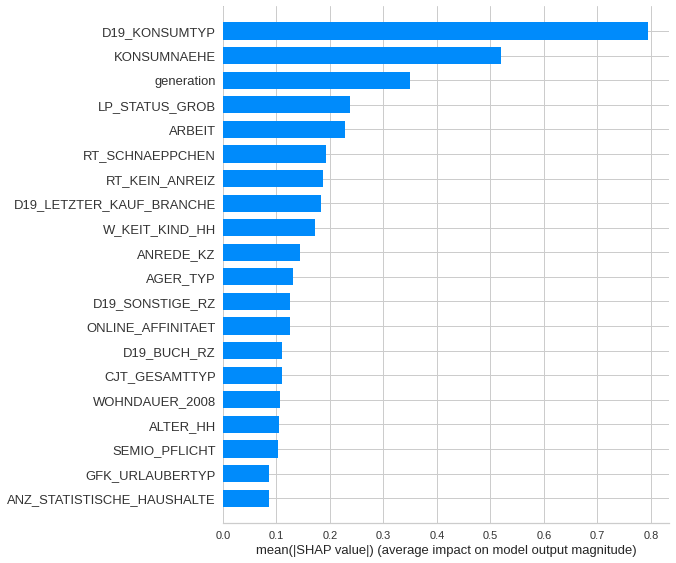

In [104]:
temp = azdias.copy()
temp['clust'] = pd.concat([pd.Series(pop_clusters),pd.Series(cust_clusters)],ignore_index=True)
cat_cols = temp.dtypes[temp.dtypes == "category"].index.tolist()
temp[cat_cols] = temp[cat_cols].astype(int)
params = {'iterations':2000}
shap_values,feat_imp,_ = run_cb_classifier(temp.drop(['customer_identifier'],axis=1),temp.customer_identifier,params =params)


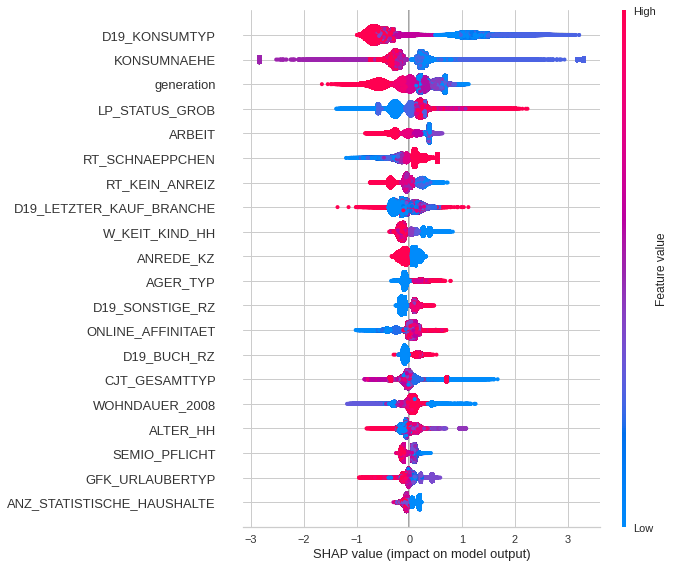

In [106]:
shap.summary_plot(shap_values,temp.drop(['customer_identifier'],axis=1))

These RT columns seem to be important in predicitng customers ,RT_KEIN_ANREIZ seems to be among some of the  important column in predicting the probability of being a customer , it would be worth while to dig a little in order to infer with more detail what this feature means, we know it translates to no incentive, will check the correlation with other features as a start

In [269]:
kein_anriez_cor = azdias.corrwith(azdias.RT_KEIN_ANREIZ)
kein_anriez_cor[abs(kein_anriez_cor)>0.3 ].sort_values()

AGER_TYP         -0.424058
SEMIO_ERL        -0.345683
LP_STATUS_GROB   -0.335610
RETOURTYP_BK_S   -0.324683
CJT_GESAMTTYP     0.310798
SEMIO_RAT         0.313510
SEMIO_FAM         0.336148
SEMIO_TRADV       0.346417
SEMIO_PFLICHT     0.435244
SEMIO_REL         0.466002
RT_KEIN_ANREIZ    1.000000
dtype: float64

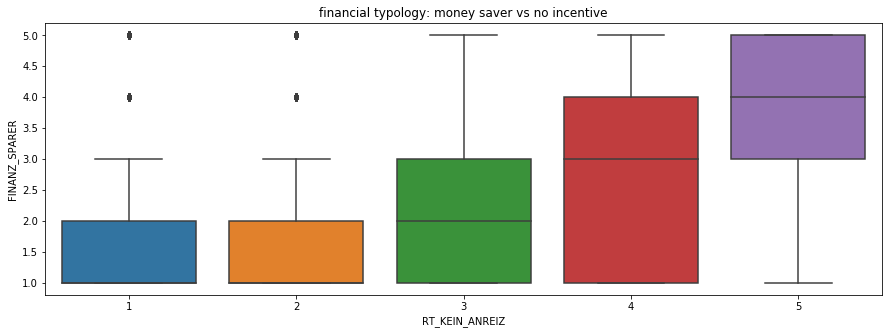

In [161]:
plot_corr(azdias,'RT_KEIN_ANREIZ','FINANZ_SPARER')

It is evident that RT_KEIN_ANREIZ correlates to features that signify some kind of financial attitude where a higher value me corresponds to being less money savvy . Also a higher value correlates with a low affinity to being religious and traditional minded. A higher value corresponds to being younger,crazy shoppers and having lower to average incomes.

I could infer from this that RT_KEIN_ANREIZ could actually mean spendthrift and that a higher value indicates a more spendthift attitude, one reason I infer is is one of the other RT features translates to Bargain if my inference is correct I should see somewhat of an opposite correlation with the RT_SCHNAEPPCHEN feature

In [270]:
schnaeppcehn_cor = azdias.corrwith(azdias.RT_SCHNAEPPCHEN)
schnaeppcehn_cor[abs(schnaeppcehn_cor)>0.2 ].sort_values()

ANREDE_KZ                    -0.264780
generation                   -0.233027
CAMEO_DEUG_2015              -0.225915
HH_EINKOMMEN_SCORE           -0.218621
ANZ_STATISTISCHE_HAUSHALTE   -0.216172
customer_identifier           0.202685
CJT_KATALOGNUTZER             0.377310
RT_SCHNAEPPCHEN               1.000000
dtype: float64

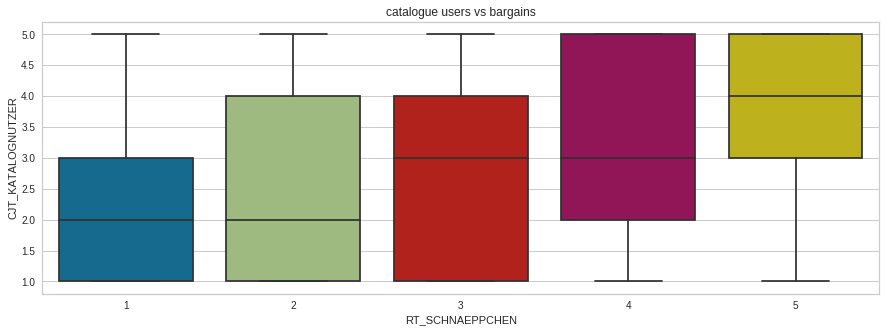

In [278]:
plot_corr(azdias,'RT_SCHNAEPPCHEN','CJT_KATALOGNUTZER')

I have noticed that ,correctly so ,the correlataions with RT_SCHNAEPPCHEN are opposite as compared to RT_KEIN_ANREIZ , but some other interesting correlations that i have found that further confirm my inference are as follows:
* we see a negative correlation to gender , a higher feature value indicates maleness and a lower femaleness, my intuition tells me that in general males tend to bargain more than females
* a positive correlation to CJT_KATALOGNUTZER says that a person who has a higher affinity to using catalogues will be more of a bargianer this also fits with my intuition of reality, people who use catalogues will tend to look for the best bargians they can find.
* we see negative correlations with wealth indicators saying generall people who tend to bargain are not as wealthy



ARBEIT also turned out to be an important variable however we need to figure out what the mapping order is.

In [271]:
arbeit_cor = azdias.corrwith(azdias.ARBEIT)
arbeit_cor_cols = arbeit_cor[abs(arbeit_cor)>0.7 ].sort_values()
arbeit_cor_cols

SOHO_FLAG      0.713055
EWDICHTE       0.759089
ORTSGR_KLS9    0.804683
RELAT_AB       0.865737
ARBEIT         1.000000
dtype: float64

In [272]:
lookUpAttr(azdias,arbeit_cor_cols.index.tolist())

****************************************************************************************************
SOHO_FLAG

Description:
 small office/home office flag
Mapping:
 {-1: 'unknown', 0: 'no small office/home office', 1: 'small office/home office'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
-1    11.090405
 0    88.141361
 1     0.768234
Name: SOHO_FLAG, dtype: float64

Unique Values:
3
****************************************************************************************************
EWDICHTE

Description:
 density of inhabitants per square kilometer
Mapping:
 {-1: 'unknown', 1: 'less than 34 HH/km²', 2: '34 - 89 HH/km²', 3: '90 - 149 HH/km²', 4: '150 - 319 HH/km²', 5: '320 - 999 HH/km²', 6: 'more than 999 HH/²'}
Additional Notes:
 [nan]
Info level:
 ['Postcode ']

Column Summary
Value Counts Percentage
-1    13.270162
 1     8.857641
 2    15.203353
 3     9.112980
 4    14.580288
 5    17.886123
 6    21.089454
Name: EWDICHTE, dtype: floa

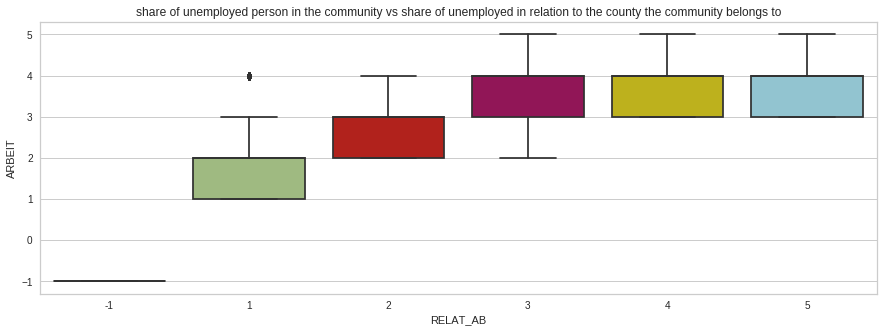

In [273]:
plot_corr(azdias,'RELAT_AB','ARBEIT')

Some takeaways from the correlation analysis:
* we see that the values for arbeit increase as we get closer to more populated areas
* Relat_AB is the best identifier that ARBEIT is in oder of increasing unemployment
* the above statement makes the correlation between having an office at home and unemployment interesting, is it possible that people who work from home self employed are classified as being unemployed ?


In [107]:
top_imp_cols = feat_imp.loc[feat_imp.feature_importance_vals > 0.01].col_name.tolist()
top_imp_cols

['D19_KONSUMTYP',
 'KONSUMNAEHE',
 'generation',
 'LP_STATUS_GROB',
 'ARBEIT',
 'RT_SCHNAEPPCHEN',
 'RT_KEIN_ANREIZ',
 'D19_LETZTER_KAUF_BRANCHE',
 'W_KEIT_KIND_HH',
 'ANREDE_KZ',
 'AGER_TYP',
 'D19_SONSTIGE_RZ',
 'ONLINE_AFFINITAET',
 'D19_BUCH_RZ',
 'CJT_GESAMTTYP',
 'WOHNDAUER_2008',
 'ALTER_HH',
 'SEMIO_PFLICHT',
 'GFK_URLAUBERTYP',
 'ANZ_STATISTISCHE_HAUSHALTE',
 'ORTSGR_KLS9',
 'CJT_KATALOGNUTZER',
 'D19_BANKEN_DIREKT_RZ',
 'OST_WEST_KZ',
 'LP_FAMILIE_GROB',
 'D19_VOLLSORTIMENT_RZ',
 'SOHO_FLAG',
 'RETOURTYP_BK_S',
 'RELAT_AB',
 'SEMIO_LUST',
 'HH_EINKOMMEN_SCORE',
 'BALLRAUM',
 'ANZ_HH_TITEL',
 'NATIONALITAET_KZ',
 'EWDICHTE',
 'D19_SAMMELARTIKEL_RZ',
 'SEMIO_KULT',
 'SEMIO_TRADV',
 'GEMEINDETYP',
 'D19_BEKLEIDUNG_GEH_RZ',
 'SEMIO_KRIT',
 'INNENSTADT',
 'D19_HAUS_DEKO_RZ',
 'D19_VERSICHERUNGEN_RZ',
 'D19_LOTTO_RZ',
 'ZABEOTYP',
 'D19_VERSAND_REST_RZ',
 'neighbourhood_class',
 'D19_BILDUNG_RZ',
 'KONSUMZELLE',
 'SEMIO_VERT',
 'D19_TECHNIK_RZ',
 'D19_TELKO_REST_RZ',
 'SEMIO_RAT',
 'clust',
 'SEMIO_REL',
 'GEBAEUDETYP_RASTER',
 'CAMEO_DEUG_2015',
 'D19_KOSMETIK_RZ',
 'REGIOTYP',
 'D19_BIO_OEKO_RZ',
 'D19_REISEN_RZ',
 'SEMIO_KAEM',
 'D19_BANKEN_GROSS_RZ',
 'D19_KK_KUNDENTYP',
 'GEBAEUDETYP',
 'ANZ_PERSONEN',
 'SEMIO_FAM',
 'D19_SCHUHE_RZ',
 'FINANZTYP',
 'D19_TIERARTIKEL_RZ',
 'D19_RATGEBER_RZ',
 'D19_BEKLEIDUNG_REST_RZ',
 'D19_HANDWERK_RZ',
 'MOBI_REGIO',
 'SEMIO_SOZ',
 'KBA05_HERSTTEMP',
 'KBA05_MODTEMP',
 'KKK',
 'SEMIO_ERL',
 'D19_TELKO_MOBILE_RZ',
 'SEMIO_MAT',
 'D19_NAHRUNGSERGAENZUNG_RZ',
 'D19_LEBENSMITTEL_RZ',
 'SEMIO_DOM',
 'D19_KINDERARTIKEL_RZ',
 'HH_family_type',
 'area_type',
 'GREEN_AVANTGARDE',
 'SHOPPER_TYP',
 'D19_FREIZEIT_RZ',
 'ANZ_KINDER']

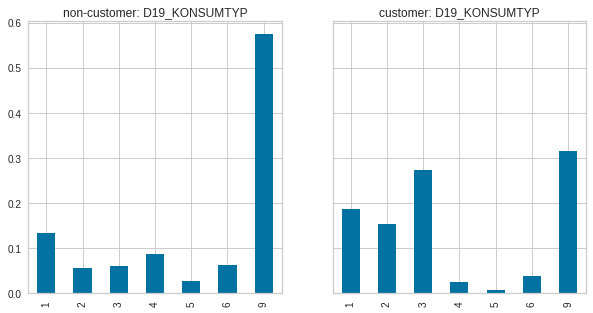

****************************************************************************************************
D19_KONSUMTYP

Description:
 consumption type 
Mapping:
 {1: 'Universal', 2: 'Versatile', 3: 'Gourmet', 4: 'Family', 5: 'Informed ', 6: 'Modern', 9: 'Inactive'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
1    14.194278
2     7.288389
3     9.756730
4     7.670059
5     2.394094
6     5.908911
9    52.787538
Name: D19_KONSUMTYP, dtype: float64

Unique Values:
7


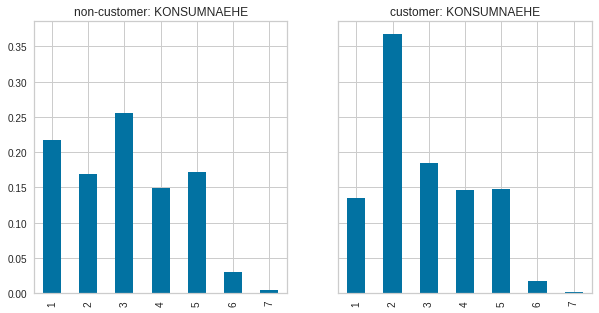

****************************************************************************************************
KONSUMNAEHE

Description:
 distance from a building to PoS (Point of Sale)
Mapping:
 {1: 'building is located in a 125 x 125m-grid cell (RA1), which is a consumption cell', 2: 'building is located in a 250 x 250m-grid cell, which includes at least one RA1-consumption cell', 3: 'building is located in a 500 x 500m-grid cell, which includes at least one RA1-consumption cell', 4: 'building is located in a 1 x 1km-grid cell, which includes at least one RA1-consumption cell', 5: 'building is located in a 2 x 2km-grid cell, which includes at least one RA1-consumption cell', 6: 'building is located in a 10 x 10km-grid cell, which includes at least one RA1-consumption cell', 7: 'building is not located in a 10 x 10km-range to a a consumption cell'}
Additional Notes:
 ['additional costs']
Info level:
 ['Building']

Column Summary
Value Counts Percentage
1    20.281787
2    20.462141
3    24.3703

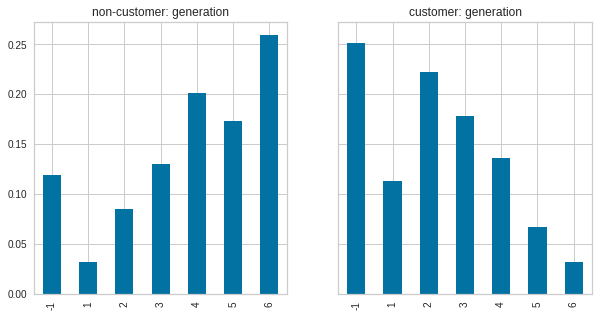

****************************************************************************************************
generation

Description:
 generation group
Mapping:
 {-1: 'unknown', 1: '120-86', 2: '85-76', 3: '75-66', 4: '65-56', 5: '55-46', 6: '45-3'}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
-1    14.223921
 1     4.661858
 2    10.917531
 3    13.865984
 4    18.986622
 5    15.419537
 6    21.924547
Name: generation, dtype: float64

Unique Values:
7


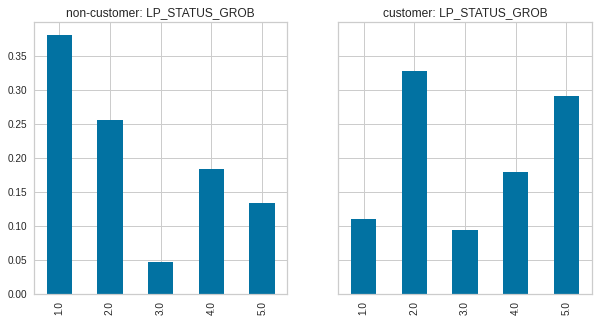

****************************************************************************************************
LP_STATUS_GROB

Description:
 social status rough
Mapping:
 {0: 'unknown', 1: 'low-income earners', 2: 'average earners', 3: 'independants', 4: 'houseowners', 5: 'top earners '}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1.0    33.254869
2.0    26.822721
3.0     5.512927
4.0    18.314982
5.0    16.094500
Name: LP_STATUS_GROB, dtype: float64

Unique Values:
5


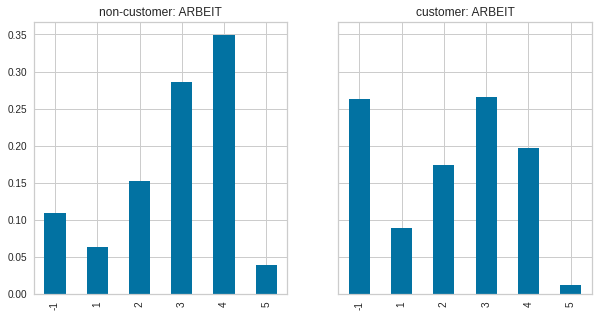

****************************************************************************************************
ARBEIT

Description:
 share of unemployed person in the community
Mapping:
 {}
Additional Notes:
 [nan]
Info level:
 ['Community']

Column Summary
Value Counts Percentage
-1    13.655710
 1     6.806708
 2    15.606262
 3    28.248280
 4    32.222985
 5     3.460055
Name: ARBEIT, dtype: float64

Unique Values:
6


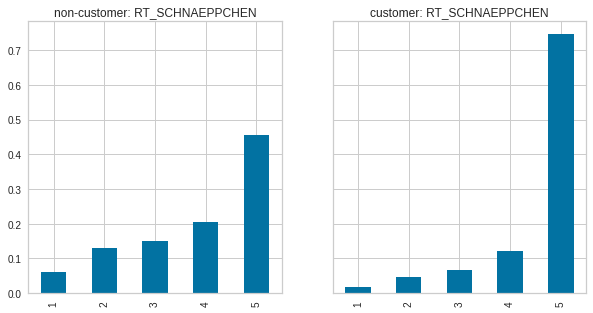

****************************************************************************************************
RT_SCHNAEPPCHEN

Description:
 bargains
Mapping:
 {}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
1     5.217509
2    11.493592
3    13.610460
4    19.089589
5    50.588850
Name: RT_SCHNAEPPCHEN, dtype: float64

Unique Values:
5


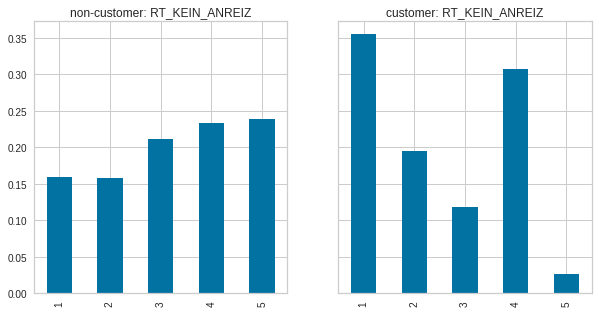

****************************************************************************************************
RT_KEIN_ANREIZ

Description:
 no incentive
Mapping:
 {}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
1    19.396550
2    16.481896
3    19.477630
4    24.602423
5    20.041501
Name: RT_KEIN_ANREIZ, dtype: float64

Unique Values:
5


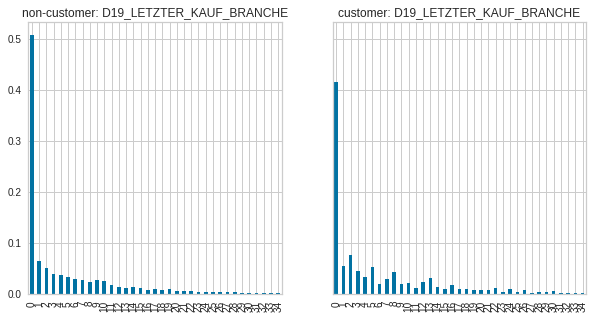

****************************************************************************************************
D19_LETZTER_KAUF_BRANCHE

Description:
 last purchase branch/industry
Mapping:
 {0: 'D19_UNBEKANNT', 1: 'D19_VERSICHERUNGEN', 2: 'D19_SONSTIGE', 3: 'D19_VOLLSORTIMENT', 4: 'D19_SCHUHE', 5: 'D19_BUCH_CD', 6: 'D19_VERSAND_REST', 7: 'D19_DROGERIEARTIKEL', 8: 'D19_HAUS_DEKO', 9: 'D19_BANKEN_DIREKT', 10: 'D19_BEKLEIDUNG_REST', 11: 'D19_TELKO_MOBILE', 12: 'D19_ENERGIE', 13: 'D19_BEKLEIDUNG_GEH', 14: 'D19_TELKO_REST', 15: 'D19_BANKEN_GROSS', 16: 'D19_LEBENSMITTEL', 17: 'D19_FREIZEIT', 18: 'D19_TECHNIK', 19: 'D19_KINDERARTIKEL', 20: 'D19_BANKEN_REST', 21: 'D19_RATGEBER', 22: 'D19_NAHRUNGSERGAENZUNG', 23: 'D19_DIGIT_SERV', 24: 'D19_SAMMELARTIKEL', 25: 'D19_REISEN', 26: 'D19_WEIN_FEINKOST', 27: 'D19_TIERARTIKEL', 28: 'D19_HANDWERK', 29: 'D19_GARTEN', 30: 'D19_BIO_OEKO', 31: 'D19_BANKEN_LOKAL', 32: 'D19_BILDUNG', 33: 'D19_LOTTO', 34: 'D19_KOSMETIK'}
Additional Notes:
 []
Info level:
 []

Column Su

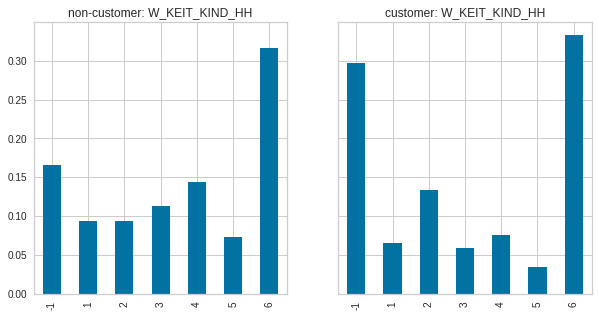

****************************************************************************************************
W_KEIT_KIND_HH

Description:
 likelihood of a child present in this household
Mapping:
 {'-1, 0': 'unknown', 1: 'most likely', 2: 'very likely', 3: 'likely', 4: 'average', 5: 'unlikely', 6: 'very unlikely'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
-1    18.924195
 1     8.897904
 2    10.120854
 3    10.304255
 4    13.223157
 5     6.595418
 6    31.934216
Name: W_KEIT_KIND_HH, dtype: float64

Unique Values:
7


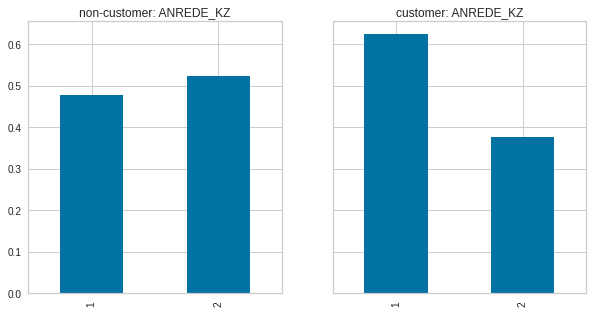

****************************************************************************************************
ANREDE_KZ

Description:
 gender
Mapping:
 {'-1, 0': 'unknown', 1: 'male', 2: 'female'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1    50.368233
2    49.631767
Name: ANREDE_KZ, dtype: float64

Unique Values:
2


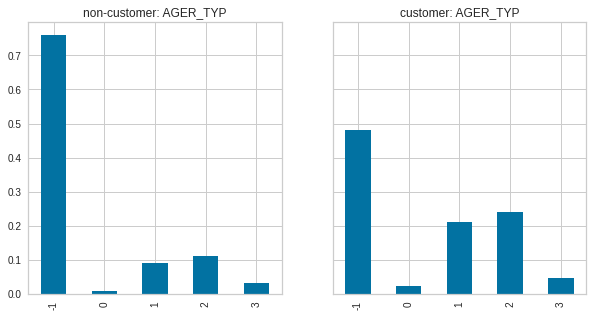

****************************************************************************************************
AGER_TYP

Description:
 best-ager typology
Mapping:
 {-1: 'unknown', 0: 'no classification possible', 1: 'passive elderly', 2: 'cultural elderly', 3: 'experience-driven elderly'}
Additional Notes:
 ['in cooperation with Kantar TNS; the information basis is a consumer survey']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
-1    71.071123
 0     1.197832
 1    11.098624
 2    13.329910
 3     3.302511
Name: AGER_TYP, dtype: float64

Unique Values:
5


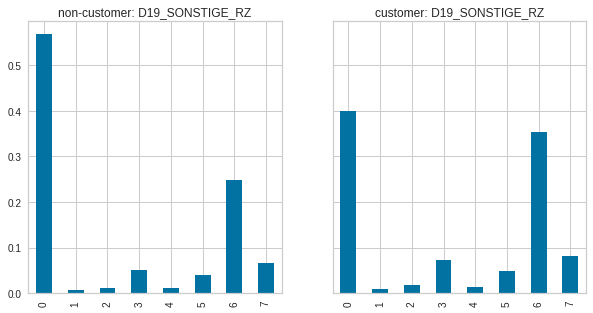

****************************************************************************************************
D19_SONSTIGE_RZ

Description:
 transactional activity based on the product group ALL OTHER CATEGORIES  - on grid level -
Mapping:
 {0: 'no transaction known', 1: 'Multibuyer 0-12 months', 2: 'Doublebuyer 0-12 months', 3: 'Singlebuyer 0-12 months', 4: 'Multi-/Doublebuyer 13-24 months', 5: 'Singlebuyer 13-24 months', 6: 'Buyer > 24 months', 7: 'Prospects > 24 months'}
Additional Notes:
 [nan]
Info level:
 ['125m x 125m Grid']

Column Summary
Value Counts Percentage
0    53.794489
1     0.696296
2     1.325178
3     5.414947
4     1.179455
5     4.113964
6    26.622790
7     6.852881
Name: D19_SONSTIGE_RZ, dtype: float64

Unique Values:
8


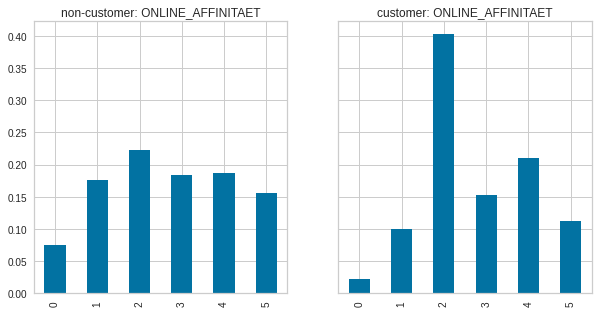

****************************************************************************************************
ONLINE_AFFINITAET

Description:
 online affinity
Mapping:
 {0: 'none', 1: 'low', 2: 'middle', 3: 'high', 4: 'very high', 5: 'highest  '}
Additional Notes:
 [nan]
Info level:
 ['RR1_ID']

Column Summary
Value Counts Percentage
0     6.514707
1    16.307914
2    25.456448
3    17.867654
4    19.041660
5    14.811617
Name: ONLINE_AFFINITAET, dtype: float64

Unique Values:
6


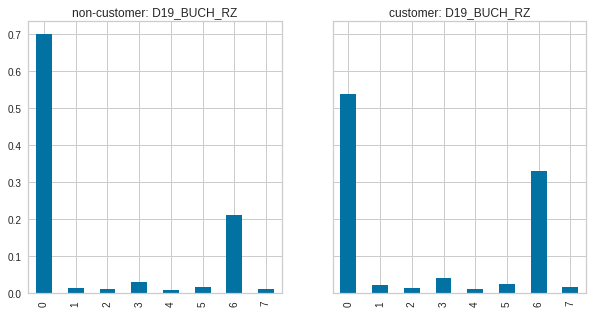

****************************************************************************************************
D19_BUCH_RZ

Description:
 transactional activity based on the product group BOOKS and CDS
Mapping:
 {0: 'no transaction known', 1: 'Multibuyer 0-12 months', 2: 'Doublebuyer 0-12 months', 3: 'Singlebuyer 0-12 months', 4: 'Multi-/Doublebuyer 13-24 months', 5: 'Singlebuyer 13-24 months', 6: 'Buyer > 24 months', 7: 'Prospects > 24 months'}
Additional Notes:
 [nan]
Info level:
 ['125m x 125m Grid']

Column Summary
Value Counts Percentage
0    67.018478
1     1.483184
2     1.118044
3     3.163437
4     0.983957
5     1.908165
6    23.223314
7     1.101422
Name: D19_BUCH_RZ, dtype: float64

Unique Values:
8


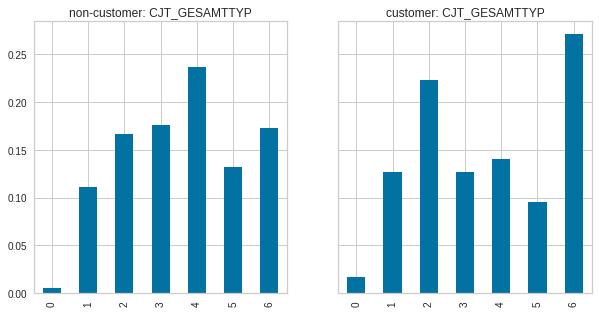

****************************************************************************************************
CJT_GESAMTTYP

Description:
 customer journey typology
Mapping:
 {0: 'unknown', 1: 'Advertising- and Consumptionminimalist', 2: 'Advertising- and Consumptiontraditionalist', 3: 'advertisinginterested Store-shopper', 4: 'advertisinginterested Online-shopper', 5: 'Advertising- and Cross-Channel-Enthusiast', 6: 'Advertising-Enthusiast with restricted Cross-Channel-Behaviour '}
Additional Notes:
 ['relating to the preferred information, marketing and buying channels of consumers as well as their cross-channel usage. The information basis is a survey on the consumer channel preferences combined via a statistical modell with AZ DIAS data']
Info level:
 ['Person']

Column Summary
Value Counts Percentage
0     0.744963
1    11.367723
2    17.696997
3    16.695587
4    21.967027
5    12.520674
6    19.007030
Name: CJT_GESAMTTYP, dtype: float64

Unique Values:
7


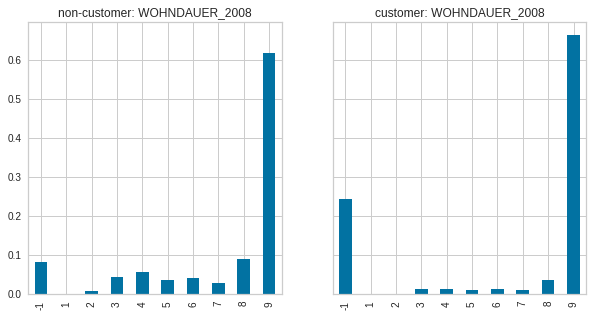

****************************************************************************************************
WOHNDAUER_2008

Description:
 length of residence
Mapping:
 {'-1, 0': 'unknown', 1: 'length of residence below 1 year', 2: 'length of residence 1-2 years', 3: 'length of residence 2-3 years', 4: 'length of residence 3-4 years', 5: 'length of residence 4-5 years', 6: 'length of residence 5-6 years', 7: 'length of residence 6-7 years', 8: 'length of residence 7-10 years', 9: 'length of residence more than 10 years'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
-1    11.090405
 1     0.072123
 2     0.574675
 3     3.775327
 4     4.913965
 5     3.023716
 6     3.464949
 7     2.394741
 8     8.038062
 9    62.652038
Name: WOHNDAUER_2008, dtype: float64

Unique Values:
10


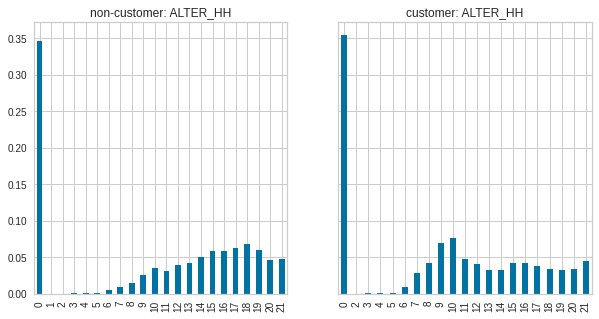

****************************************************************************************************
ALTER_HH

Description:
 main age within the household
Mapping:
 {0: 'unknown / no main age detectable', 1: '125 to 121', 2: '120 to 116', 3: '115 to 111', 4: '110 to 106', 5: '105 to 101', 6: '100 to 96', 7: '95 to 91', 8: '90 to 86', 9: '85 to 81', 10: '80 to 76', 11: '75 to 71', 12: '70 to 66', 13: '65 to 61', 14: '60 to 56', 15: '55 to 51', 16: '50 to 46', 17: '45 to 41', 18: '40 to 36', 19: '35 to 31', 20: '30 to 26', 21: '25 to 21'}
Additional Notes:
 [nan]
Info level:
 ['Household']

Column Summary
Value Counts Percentage
0     34.778409
1      0.000092
2      0.005541
3      0.019855
4      0.060487
5      0.116172
6      0.522407
7      1.268108
8      1.992293
9      3.350254
10     4.192643
11     3.411665
12     3.968609
13     4.042579
14     4.720775
15     5.549035
16     5.528626
17     5.817580
18     6.215133
19     5.450870
20     4.361084
21     4.627782
Name: ALTER_H

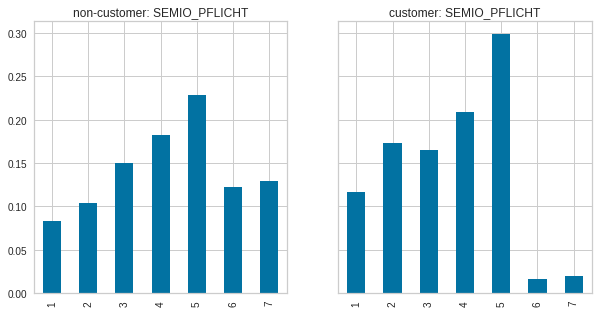

****************************************************************************************************
SEMIO_PFLICHT

Description:
 affinity indicating in what way the person is dutyfull traditional minded
Mapping:
 {'-1, 9': 'unknown', 1: 'highest affinity', 2: 'very high affinity', 3: 'high affinity', 4: 'average affinity', 5: 'low affinity', 6: 'very low affinity', 7: 'lowest affinity'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1     8.916004
2    11.585754
3    15.302810
4    18.673566
5    24.107536
6    10.401958
7    11.012372
Name: SEMIO_PFLICHT, dtype: float64

Unique Values:
7


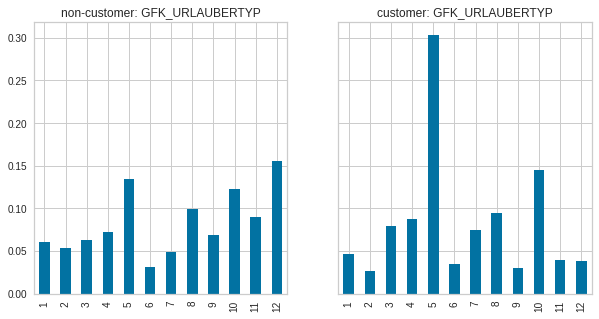

****************************************************************************************************
GFK_URLAUBERTYP

Description:
 vacation habits
Mapping:
 {1: 'Event travelers', 2: 'Family-oriented vacationists', 3: 'Winter sportspeople', 4: 'Culture lovers', 5: 'Nature fans', 6: 'Hiker', 7: 'Golden ager', 8: 'Homeland-connected vacationists ', 9: 'Package tour travelers', 10: 'Connoisseurs', 11: 'Active families', 12: 'without vacation'}
Additional Notes:
 [nan]
Info level:
 ['Person']

Column Summary
Value Counts Percentage
1      5.810192
2      4.833531
3      6.600589
4      7.494415
5     16.479125
6      3.162144
7      5.315674
8      9.836056
9      6.176994
10    12.678772
11     8.100858
12    13.511649
Name: GFK_URLAUBERTYP, dtype: float64

Unique Values:
12


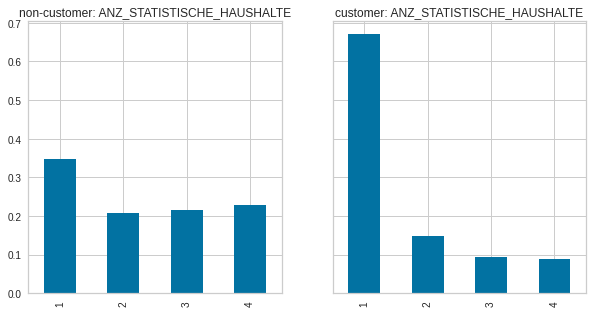

****************************************************************************************************
ANZ_STATISTISCHE_HAUSHALTE

Description:
 statistical calculation of known households in building
Mapping:
 {1: '1 household', 2: '2 to 3 households', 3: '4 to 8 households', 4: 'more than 8'}
Additional Notes:
 []
Info level:
 []

Column Summary
Value Counts Percentage
1    40.419237
2    19.808140
3    19.448726
4    20.323898
Name: ANZ_STATISTISCHE_HAUSHALTE, dtype: float64

Unique Values:
4


In [111]:
grouped_df = azdias.groupby('customer_identifier')
non_customer =grouped_df.get_group(0.0)
customer = grouped_df.get_group(1.0)

for col in feat_imp.col_name[:20]:
    fig,axes = plt.subplots(ncols=2,figsize = (10,5),sharey =True)
    non_customer[col].value_counts(normalize =True).sort_index().plot(kind = 'bar',title = f'non-customer: {col}',ax=axes[0])
    customer[col].value_counts(normalize =True).sort_index().plot(kind = 'bar',title = f'customer: {col}',ax=axes[1])
    display(fig)
    lookUpAttr(azdias,[col])
    plt.close()

From looking at the most important features that affect the probability of being a customer we can immediately see that, customers tend to be less thrifty, older, more is known about their transactions and also they tend to be more male